<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Research Topic: Study of International Crude Oil Spot Price Prediction</h1>
<h3 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Author: JeffLin99, Email: jeffhengyu1999@hotmail.com</h3>

## Problem Description
#### In this project, the goal is to address the following problem and propose a corresponding solution.

1. Problem Background； 
     <div>&ensp;&ensp;&ensp;&ensp;Crude oil is vital for energy and has economic and political impact due to its fluctuations. In 2019, it dominated global fossil energy consumption at 33.1%. China's rapid growth has led to increasing oil demand, making it heavily reliant on imports (73.5% in 2020). Volatile international oil prices affect China's economy and industries.<div>
<div>&ensp;<div>
  2. Problem Statement；  
     <div>&ensp;&ensp;&ensp;&ensp;Predicting international crude oil prices is crucial for China's energy and economic security. Accurate pricing helps with policy-making, investments, and risk management. Current methods include econometric models and machine learning. Combining these methods for interval or probability-based predictions is promising for the field's progress.<div>
<div>&ensp;<div>
  3. Expected Outcomes； 
     <div>&ensp;&ensp;&ensp;&ensp;The project aims to use descriptive stats and regression modeling to understand crude oil price changes. It will then employ LSTM neural network models to predict prices accurately. The results will be used to visualize historical data and predicted trends.<div>

## Solution for the Problem

  1. Required Dataset；  
     <div>&ensp;&ensp;&ensp;&ensp;The selected datasets include: (1)Historical data of crude oil futures prices from the New York Mercantile Exchange (obtained through web scraping). (2)Historical data of crude oil spot prices (Cushing, OK WTI Spot Price FOB in Dollars per Barrel) from the U.S. Energy Information Administration (EIA). (3) Historical data of world crude oil production (Crude oil including lease condensate in Mb/d) from the EIA. (4) Historical data of the U.S. Dollar Index (USDX) from a financial data source. (5) Historical data of the VIX panic index from a financial data source.<div>
  2. Data Collection Method；
     <div>&ensp;&ensp;&ensp;&ensp;Data collection involves using web scraping for (1) and downloading from databases like EIA and the financial data source for the rest.<div>
  3. Final Presentation of the Solution:
     <div>&ensp;&ensp;&ensp;&ensp;The solution will present the future trends of international crude oil spot prices beyond the sample data. This will be achieved through showcasing results of regression fitting, training, and prediction.<div>

### Packages from third-party tool libraries used:

In [1]:
# Scraping
import scrapy
import time
import json
import os
from scrapy.crawler import CrawlerProcess
from multiprocessing import Process
from scrapy.utils.project import get_project_settings

# Read Json File
from json import loads

# Data Transformation
from sklearn.preprocessing import MinMaxScaler

# Plotting
import matplotlib.pyplot as plt
import conda
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
import folium

# Statistical Data Analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

# Machine Learning — LSTM Modeling
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.optimizers import RMSprop, Adam

# Error Estimation, Measuring Prediction Accuracy
import math
from sklearn.metrics import mean_squared_error

# Other Commonly Used Packages
import pandas as pd
import datetime
import numpy as np

## 1-- Data Collection and Preprocessing

### （1）Historical Data of New York Mercantile Exchange Crude Oil Futures Prices
<p> Data Source: Acquired through Web Scraping Program

#### Defining Web Scraping Program - Objective: Historical Data of Crude Oil Futures Prices

In [2]:
# ## New York Mercantile Exchange Crude Oil Futures Prices

# class MySpider(scrapy.Spider):
    
#     name = "spider"
#     allowed_domains = ['www.livecharts.co.uk/']
    
    
#     def __init__(self):
        
#         self.file = open('Data/crude_oil_future(test).json', 'w');
        
#         #Setting up a List of Websites to be Scraped
#         self.urls = []
#         for i in range(1,2900):
#             self.urls.append('https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=' + str(i) )
            
# #       Initial State or Initialization Effect - Equivalent Effect
# #         self.urls = [
# #             'https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1',
# #             'https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2',
# #         ]

        
#     def start_requests(self):
#         for url in self.urls:
#             yield scrapy.http.Request(url=url, callback=self.parse, dont_filter=True)
            
#     #The "parse" Method is Called After Receiving a Response for Each Request
#     def parse(self, response):
#         trs = response.xpath("/html/body/div[2]/div[1]/div[2]/div[1]/div[1]/table[1]/tbody")
#         #Through xpath
#         for tr in trs:
#             item = {}
#             item['DATE']=tr.xpath('./tr[3]/td[1]/text()').get();
#             item['OPEN']=tr.xpath('./tr[3]/td[2]/text()').get();
#             item['HIGH']=tr.xpath('./tr[3]/td[3]/text()').get();
#             item['LOW']=tr.xpath('./tr[3]/td[4]/text()').get();
#             item['CLOSE']=tr.xpath('./tr[3]/td[5]/text()').get();
            
#             #Converting a Dictionary to a JSON String
#             line = json.dumps(dict(item))
            
#             #Writing Each Entry to a File
#             self.file.write(line + "\n")
            
#         #Write the Content to the File promptly, as a slight delay might occur otherwise.
#         self.file.flush()
#         os.fsync(self.file)
        
#         #Output the URL of the currently parsed webpage as a representation of the crawling progress, unrelated to the program logic.
#         print("over: " + response.url)
        
#     def close(spider, reason):
#         self.file.close();

#### Execute the Spider Task
Upon initiation, the Myspider will be executed. 
This code segment can be customized if you possess a deep understanding of Scrapy's operational mechanics; otherwise, it is advisable not to modify it independently.

In [3]:
# def run_spider():
#     process = CrawlerProcess(get_project_settings())
#     process.crawl(MySpider)
#     process.start() # This line of code initiates the entire process of web crawling. 
    
# run_spider()

2022-12-12 09:14:33 [scrapy.utils.log] INFO: Scrapy 2.6.3 started (bot: scrapybot)
2022-12-12 09:14:33 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 2.0.1, Twisted 22.8.0, Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 22.1.0 (OpenSSL 3.0.5 5 Jul 2022), cryptography 38.0.1, Platform Windows-10-10.0.19041-SP0
2022-12-12 09:14:33 [scrapy.crawler] INFO: Overridden settings:
{}
2022-12-12 09:14:33 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-12-12 09:14:33 [scrapy.extensions.telnet] INFO: Telnet Password: a4d5f1e435b57ee7
2022-12-12 09:14:33 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2022-12-12 09:14:34 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scra

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=8


2022-12-12 09:14:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2> (referer: None)
2022-12-12 09:14:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=5> (referer: None)
2022-12-12 09:14:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=4> (referer: None)
2022-12-12 09:14:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=7> (referer: None)
2022-12-12 09:14:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=3> (referer: None)
2022-12-12 09:14:39 [scrapy.core.engine] DEBUG: Cr

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=5
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=4
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=7
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=3
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=6


2022-12-12 09:14:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=10> (referer: None)
2022-12-12 09:14:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=9> (referer: None)
2022-12-12 09:14:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=11> (referer: None)
2022-12-12 09:14:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=12> (referer: None)
2022-12-12 09:14:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=13> (referer: None)
2022-12-12 09:14:40 [scrapy.core.engine] DEBUG

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=10
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=9
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=11
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=12
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=13


2022-12-12 09:14:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=15> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=14
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=16
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=15


2022-12-12 09:14:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=17> (referer: None)
2022-12-12 09:14:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=18> (referer: None)
2022-12-12 09:14:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=19> (referer: None)
2022-12-12 09:14:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=20> (referer: None)
2022-12-12 09:14:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=21> (referer: None)
2022-12-12 09:14:42 [scrapy.core.engine] DEBU

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=17
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=18
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=19
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=20
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=21


2022-12-12 09:14:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=22> (referer: None)
2022-12-12 09:14:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=24> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=23
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=22
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=24


2022-12-12 09:14:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=25> (referer: None)
2022-12-12 09:14:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=26> (referer: None)
2022-12-12 09:14:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=27> (referer: None)
2022-12-12 09:14:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=29> (referer: None)
2022-12-12 09:14:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=28> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=25
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=26


2022-12-12 09:14:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=30> (referer: None)
2022-12-12 09:14:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=31> (referer: None)
2022-12-12 09:14:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=32> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=27
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=29
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=28
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=30
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=31
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=32


2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=33> (referer: None)
2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=34> (referer: None)
2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=35> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=33
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=34


2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=37> (referer: None)
2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=36> (referer: None)
2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=38> (referer: None)
2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=39> (referer: None)
2022-12-12 09:14:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=40> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=35
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=37
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=36
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=38
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=39
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=40


2022-12-12 09:14:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=41> (referer: None)
2022-12-12 09:14:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=42> (referer: None)
2022-12-12 09:14:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=43> (referer: None)
2022-12-12 09:14:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=45> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=41
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=42


2022-12-12 09:14:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=44> (referer: None)
2022-12-12 09:14:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=46> (referer: None)
2022-12-12 09:14:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=48> (referer: None)
2022-12-12 09:14:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=47> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=43
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=45
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=44
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=46
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=48
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=47


2022-12-12 09:14:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=49> (referer: None)
2022-12-12 09:14:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=50> (referer: None)
2022-12-12 09:14:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=51> (referer: None)
2022-12-12 09:14:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=53> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=49
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=50
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=51


2022-12-12 09:14:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=52> (referer: None)
2022-12-12 09:14:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=54> (referer: None)
2022-12-12 09:14:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=55> (referer: None)
2022-12-12 09:14:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=56> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=53
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=52
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=54
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=55
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=56


2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=57> (referer: None)
2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=58> (referer: None)
2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=59> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=57
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=58


2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=61> (referer: None)
2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=60> (referer: None)
2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=63> (referer: None)
2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=62> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=59
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=61
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=60


2022-12-12 09:14:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=64> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=63
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=62
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=64


2022-12-12 09:14:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=65> (referer: None)
2022-12-12 09:14:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=66> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=65
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=66


2022-12-12 09:14:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=67> (referer: None)
2022-12-12 09:14:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=69> (referer: None)
2022-12-12 09:14:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=70> (referer: None)
2022-12-12 09:14:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=68> (referer: None)
2022-12-12 09:14:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=71> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=67
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=69
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=70
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=68
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=71


2022-12-12 09:14:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=72> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=72


2022-12-12 09:14:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=73> (referer: None)
2022-12-12 09:14:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=74> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=73
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=74


2022-12-12 09:14:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=79> (referer: None)
2022-12-12 09:14:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=76> (referer: None)
2022-12-12 09:14:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=77> (referer: None)
2022-12-12 09:14:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=75> (referer: None)
2022-12-12 09:14:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=78> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=79
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=76
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=77
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=75
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=78


2022-12-12 09:14:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=80> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=80


2022-12-12 09:14:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=81> (referer: None)
2022-12-12 09:14:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=82> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=81
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=82


2022-12-12 09:14:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=85> (referer: None)
2022-12-12 09:14:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=83> (referer: None)
2022-12-12 09:14:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=86> (referer: None)
2022-12-12 09:14:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=87> (referer: None)
2022-12-12 09:14:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=84> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=85
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=83
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=86
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=87
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=84


2022-12-12 09:14:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=88> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=88


2022-12-12 09:14:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=89> (referer: None)
2022-12-12 09:14:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=90> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=89
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=90


2022-12-12 09:14:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=91> (referer: None)
2022-12-12 09:14:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=93> (referer: None)
2022-12-12 09:14:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=94> (referer: None)
2022-12-12 09:14:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=92> (referer: None)
2022-12-12 09:14:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=95> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=91
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=93
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=94
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=92
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=95


2022-12-12 09:14:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=96> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=96


2022-12-12 09:14:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=97> (referer: None)
2022-12-12 09:14:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=98> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=97
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=98


2022-12-12 09:14:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=99> (referer: None)
2022-12-12 09:14:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=101> (referer: None)
2022-12-12 09:14:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=100> (referer: None)
2022-12-12 09:14:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=102> (referer: None)
2022-12-12 09:14:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=103> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=99
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=101
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=100
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=102
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=103


2022-12-12 09:14:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=104> (referer: None)
2022-12-12 09:14:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=105> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=104


2022-12-12 09:14:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=106> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=105
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=106


2022-12-12 09:14:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=107> (referer: None)
2022-12-12 09:14:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=109> (referer: None)
2022-12-12 09:14:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=108> (referer: None)
2022-12-12 09:14:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=110> (referer: None)
2022-12-12 09:14:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=111> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=107
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=109
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=108
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=110
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=111


2022-12-12 09:14:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=112> (referer: None)
2022-12-12 09:14:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=113> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=112


2022-12-12 09:14:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=114> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=113
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=114


2022-12-12 09:14:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=116> (referer: None)
2022-12-12 09:14:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=115> (referer: None)
2022-12-12 09:14:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=118> (referer: None)
2022-12-12 09:14:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=117> (referer: None)
2022-12-12 09:14:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=119> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=116
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=115
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=118
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=117
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=119


2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=120> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=120


2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=122> (referer: None)
2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=121> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=122
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=121


2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=123> (referer: None)
2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=124> (referer: None)
2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=125> (referer: None)
2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=126> (referer: None)
2022-12-12 09:14:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=127> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=123
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=124
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=125
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=126
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=127


2022-12-12 09:14:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=128> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=128


2022-12-12 09:14:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=129> (referer: None)
2022-12-12 09:14:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=130> (referer: None)
2022-12-12 09:14:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=131> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=129
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=130


2022-12-12 09:15:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=132> (referer: None)
2022-12-12 09:15:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=134> (referer: None)
2022-12-12 09:15:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=133> (referer: None)
2022-12-12 09:15:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=135> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=131
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=132
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=134
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=133
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=135


2022-12-12 09:15:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=136> (referer: None)
2022-12-12 09:15:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=137> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=136


2022-12-12 09:15:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=138> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=137
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=138


2022-12-12 09:15:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=139> (referer: None)
2022-12-12 09:15:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=140> (referer: None)
2022-12-12 09:15:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=141> (referer: None)
2022-12-12 09:15:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=142> (referer: None)
2022-12-12 09:15:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=143> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=139
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=140
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=141
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=142
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=143


2022-12-12 09:15:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=144> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=144


2022-12-12 09:15:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=145> (referer: None)
2022-12-12 09:15:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=146> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=145
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=146


2022-12-12 09:15:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=148> (referer: None)
2022-12-12 09:15:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=149> (referer: None)
2022-12-12 09:15:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=150> (referer: None)
2022-12-12 09:15:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=147> (referer: None)
2022-12-12 09:15:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=151> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=148
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=149
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=150
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=147
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=151


2022-12-12 09:15:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=152> (referer: None)
2022-12-12 09:15:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=153> (referer: None)
2022-12-12 09:15:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=154> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=152
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=153
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=154


2022-12-12 09:15:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=155> (referer: None)
2022-12-12 09:15:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=156> (referer: None)
2022-12-12 09:15:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=157> (referer: None)
2022-12-12 09:15:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=158> (referer: None)
2022-12-12 09:15:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=159> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=155
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=156
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=157
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=158
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=159


2022-12-12 09:15:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=160> (referer: None)
2022-12-12 09:15:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=161> (referer: None)
2022-12-12 09:15:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=162> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=160
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=161
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=162


2022-12-12 09:15:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=163> (referer: None)
2022-12-12 09:15:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=164> (referer: None)
2022-12-12 09:15:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=165> (referer: None)
2022-12-12 09:15:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=166> (referer: None)
2022-12-12 09:15:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=167> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=163
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=164
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=165
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=166
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=167


2022-12-12 09:15:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=168> (referer: None)
2022-12-12 09:15:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=169> (referer: None)
2022-12-12 09:15:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=170> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=168
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=169
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=170


2022-12-12 09:15:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=171> (referer: None)
2022-12-12 09:15:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=172> (referer: None)
2022-12-12 09:15:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=174> (referer: None)
2022-12-12 09:15:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=173> (referer: None)
2022-12-12 09:15:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=175> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=171
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=172
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=174
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=173
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=175


2022-12-12 09:15:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=176> (referer: None)
2022-12-12 09:15:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=177> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=176
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=177


2022-12-12 09:15:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=178> (referer: None)
2022-12-12 09:15:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=179> (referer: None)
2022-12-12 09:15:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=180> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=178


2022-12-12 09:15:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=182> (referer: None)
2022-12-12 09:15:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=181> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=179
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=180
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=182
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=181


2022-12-12 09:15:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=183> (referer: None)
2022-12-12 09:15:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=184> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=183


2022-12-12 09:15:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=185> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=184
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=185


2022-12-12 09:15:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=186> (referer: None)
2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=188> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=186


2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=187> (referer: None)
2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=189> (referer: None)
2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=190> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=188
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=187
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=189
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=190


2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=191> (referer: None)
2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=192> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=191


2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=193> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=192
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=193


2022-12-12 09:15:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=194> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=194


2022-12-12 09:15:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=195> (referer: None)
2022-12-12 09:15:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=196> (referer: None)
2022-12-12 09:15:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=197> (referer: None)
2022-12-12 09:15:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=198> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=195
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=196
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=197
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=198


2022-12-12 09:15:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=199> (referer: None)
2022-12-12 09:15:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=200> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=199
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=200


2022-12-12 09:15:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=201> (referer: None)
2022-12-12 09:15:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=202> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=201
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=202


2022-12-12 09:15:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=203> (referer: None)
2022-12-12 09:15:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=205> (referer: None)
2022-12-12 09:15:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=204> (referer: None)
2022-12-12 09:15:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=206> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=203
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=205
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=204


2022-12-12 09:15:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=207> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=206


2022-12-12 09:15:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=208> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=207
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=208


2022-12-12 09:15:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=209> (referer: None)
2022-12-12 09:15:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=210> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=209


2022-12-12 09:15:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=211> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=210


2022-12-12 09:15:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=212> (referer: None)
2022-12-12 09:15:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=213> (referer: None)
2022-12-12 09:15:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=214> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=211
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=212
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=213


2022-12-12 09:15:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=215> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=214


2022-12-12 09:15:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=216> (referer: None)
2022-12-12 09:15:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=217> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=215
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=216


2022-12-12 09:15:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=218> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=217
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=218


2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=219> (referer: None)
2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=220> (referer: None)
2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=221> (referer: None)
2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=222> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=219
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=220
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=221


2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=223> (referer: None)
2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=224> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=222


2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=225> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=223
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=224


2022-12-12 09:15:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=226> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=225
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=226


2022-12-12 09:15:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=227> (referer: None)
2022-12-12 09:15:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=228> (referer: None)
2022-12-12 09:15:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=229> (referer: None)
2022-12-12 09:15:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=230> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=227
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=228
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=229
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=230


2022-12-12 09:15:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=231> (referer: None)
2022-12-12 09:15:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=232> (referer: None)
2022-12-12 09:15:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=233> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=231
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=232


2022-12-12 09:15:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=234> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=233
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=234


2022-12-12 09:15:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=236> (referer: None)
2022-12-12 09:15:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=237> (referer: None)
2022-12-12 09:15:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=235> (referer: None)
2022-12-12 09:15:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=238> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=236
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=237
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=235
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=238


2022-12-12 09:15:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=239> (referer: None)
2022-12-12 09:15:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=240> (referer: None)
2022-12-12 09:15:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=241> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=239
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=240
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=241


2022-12-12 09:15:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=242> (referer: None)
2022-12-12 09:15:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=243> (referer: None)
2022-12-12 09:15:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=244> (referer: None)
2022-12-12 09:15:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=245> (referer: None)
2022-12-12 09:15:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=246> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=242
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=243
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=244
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=245
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=246


2022-12-12 09:15:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=247> (referer: None)
2022-12-12 09:15:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=248> (referer: None)
2022-12-12 09:15:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=249> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=247
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=248
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=249


2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=250> (referer: None)
2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=251> (referer: None)
2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=252> (referer: None)
2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=253> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=250
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=251


2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=254> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=252
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=253
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=254


2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=255> (referer: None)
2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=256> (referer: None)
2022-12-12 09:15:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=257> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=255
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=256
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=257


2022-12-12 09:15:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=258> (referer: None)
2022-12-12 09:15:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=259> (referer: None)
2022-12-12 09:15:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=261> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=258
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=259


2022-12-12 09:15:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=260> (referer: None)
2022-12-12 09:15:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=262> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=261
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=260
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=262


2022-12-12 09:15:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=263> (referer: None)
2022-12-12 09:15:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=264> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=263


2022-12-12 09:15:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=265> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=264
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=265


2022-12-12 09:15:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=266> (referer: None)
2022-12-12 09:15:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=267> (referer: None)
2022-12-12 09:15:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=268> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=266
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=267


2022-12-12 09:15:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=269> (referer: None)
2022-12-12 09:15:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=270> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=268
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=269
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=270


2022-12-12 09:15:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=271> (referer: None)
2022-12-12 09:15:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=272> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=271


2022-12-12 09:15:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=273> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=272
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=273


2022-12-12 09:15:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=274> (referer: None)
2022-12-12 09:15:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=275> (referer: None)
2022-12-12 09:15:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=277> (referer: None)
2022-12-12 09:15:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=276> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=274
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=275


2022-12-12 09:15:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=278> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=277
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=276
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=278


2022-12-12 09:15:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=279> (referer: None)
2022-12-12 09:15:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=280> (referer: None)
2022-12-12 09:15:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=281> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=279
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=280
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=281


2022-12-12 09:15:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=282> (referer: None)
2022-12-12 09:15:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=283> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=282
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=283


2022-12-12 09:15:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=286> (referer: None)
2022-12-12 09:15:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=284> (referer: None)
2022-12-12 09:15:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=285> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=286
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=284
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=285


2022-12-12 09:15:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=287> (referer: None)
2022-12-12 09:15:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=288> (referer: None)
2022-12-12 09:15:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=289> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=287
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=288
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=289


2022-12-12 09:15:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=290> (referer: None)
2022-12-12 09:15:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=291> (referer: None)
2022-12-12 09:15:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=292> (referer: None)
2022-12-12 09:15:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=294> (referer: None)
2022-12-12 09:15:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=293> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=290
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=291
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=292
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=294
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=293


2022-12-12 09:15:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=295> (referer: None)
2022-12-12 09:15:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=296> (referer: None)
2022-12-12 09:15:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=297> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=295


2022-12-12 09:15:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=299> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=296
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=297


2022-12-12 09:15:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=298> (referer: None)
2022-12-12 09:15:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=301> (referer: None)
2022-12-12 09:15:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=302> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=299
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=298


2022-12-12 09:15:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=300> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=301
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=302
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=300


2022-12-12 09:15:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=303> (referer: None)
2022-12-12 09:15:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=304> (referer: None)
2022-12-12 09:15:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=305> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=303
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=304


2022-12-12 09:15:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=306> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=305


2022-12-12 09:15:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=307> (referer: None)
2022-12-12 09:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=309> (referer: None)
2022-12-12 09:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=308> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=306
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=307


2022-12-12 09:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=310> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=309
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=308
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=310


2022-12-12 09:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=311> (referer: None)
2022-12-12 09:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=312> (referer: None)
2022-12-12 09:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=313> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=311
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=312
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=313


2022-12-12 09:15:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=315> (referer: None)
2022-12-12 09:15:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=314> (referer: None)
2022-12-12 09:15:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=316> (referer: None)
2022-12-12 09:15:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=317> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=315
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=314
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=316
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=317


2022-12-12 09:15:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=318> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=318


2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=319> (referer: None)
2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=321> (referer: None)
2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=320> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=319
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=321
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=320


2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=323> (referer: None)
2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=322> (referer: None)
2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=324> (referer: None)
2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=325> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=323
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=322
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=324
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=325


2022-12-12 09:15:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=326> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=326


2022-12-12 09:15:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=327> (referer: None)
2022-12-12 09:15:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=329> (referer: None)
2022-12-12 09:15:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=328> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=327
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=329
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=328


2022-12-12 09:15:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=330> (referer: None)
2022-12-12 09:15:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=331> (referer: None)
2022-12-12 09:15:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=332> (referer: None)
2022-12-12 09:15:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=333> (referer: None)
2022-12-12 09:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=334> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=330
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=331
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=332
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=333
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=334


2022-12-12 09:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=335> (referer: None)
2022-12-12 09:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=336> (referer: None)
2022-12-12 09:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=337> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=335
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=336
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=337


2022-12-12 09:15:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=338> (referer: None)
2022-12-12 09:15:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=339> (referer: None)
2022-12-12 09:15:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=340> (referer: None)
2022-12-12 09:15:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=341> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=338
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=339
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=340
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=341


2022-12-12 09:15:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=342> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=342


2022-12-12 09:15:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=343> (referer: None)
2022-12-12 09:15:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=345> (referer: None)
2022-12-12 09:15:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=344> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=343
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=345
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=344


2022-12-12 09:15:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=347> (referer: None)
2022-12-12 09:15:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=346> (referer: None)
2022-12-12 09:15:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=349> (referer: None)
2022-12-12 09:15:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=348> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=347
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=346
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=349


2022-12-12 09:15:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=350> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=348
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=350


2022-12-12 09:15:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=352> (referer: None)
2022-12-12 09:15:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=351> (referer: None)
2022-12-12 09:15:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=353> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=352
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=351
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=353


2022-12-12 09:15:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=354> (referer: None)
2022-12-12 09:15:35 [scrapy.extensions.logstats] INFO: Crawled 354 pages (at 354 pages/min), scraped 0 items (at 0 items/min)
2022-12-12 09:15:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=355> (referer: None)
2022-12-12 09:15:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=356> (referer: None)
2022-12-12 09:15:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=357> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=354
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=355
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=356


2022-12-12 09:15:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=358> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=357


2022-12-12 09:15:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=359> (referer: None)
2022-12-12 09:15:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=360> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=358


2022-12-12 09:15:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=361> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=359
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=360
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=361


2022-12-12 09:15:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=362> (referer: None)
2022-12-12 09:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=363> (referer: None)
2022-12-12 09:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=364> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=362
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=363
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=364


2022-12-12 09:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=365> (referer: None)
2022-12-12 09:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=366> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=365
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=366


2022-12-12 09:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=367> (referer: None)
2022-12-12 09:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=368> (referer: None)
2022-12-12 09:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=369> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=367
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=368
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=369


2022-12-12 09:15:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=370> (referer: None)
2022-12-12 09:15:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=371> (referer: None)
2022-12-12 09:15:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=372> (referer: None)
2022-12-12 09:15:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=373> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=370
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=371
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=372


2022-12-12 09:15:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=374> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=373


2022-12-12 09:15:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=375> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=374
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=375


2022-12-12 09:15:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=376> (referer: None)
2022-12-12 09:15:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=377> (referer: None)
2022-12-12 09:15:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=378> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=376
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=377


2022-12-12 09:15:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=379> (referer: None)
2022-12-12 09:15:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=380> (referer: None)
2022-12-12 09:15:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=381> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=378
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=379
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=380
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=381


2022-12-12 09:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=382> (referer: None)
2022-12-12 09:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=383> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=382


2022-12-12 09:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=384> (referer: None)
2022-12-12 09:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=385> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=383
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=384


2022-12-12 09:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=386> (referer: None)
2022-12-12 09:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=388> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=385


2022-12-12 09:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=387> (referer: None)
2022-12-12 09:15:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=389> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=386
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=388
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=387


2022-12-12 09:15:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=390> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=389


2022-12-12 09:15:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=391> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=390
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=391


2022-12-12 09:15:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=392> (referer: None)
2022-12-12 09:15:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=393> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=392


2022-12-12 09:15:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=394> (referer: None)
2022-12-12 09:15:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=396> (referer: None)
2022-12-12 09:15:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=395> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=393
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=394


2022-12-12 09:15:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=397> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=396
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=395
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=397


2022-12-12 09:15:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=398> (referer: None)
2022-12-12 09:15:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=399> (referer: None)
2022-12-12 09:15:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=400> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=398
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=399


2022-12-12 09:15:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=401> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=400


2022-12-12 09:15:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=402> (referer: None)
2022-12-12 09:15:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=403> (referer: None)
2022-12-12 09:15:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=404> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=401
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=402


2022-12-12 09:15:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=405> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=403
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=404
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=405


2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=406> (referer: None)
2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=407> (referer: None)
2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=408> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=406
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=407


2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=409> (referer: None)
2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=410> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=408


2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=411> (referer: None)
2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=412> (referer: None)
2022-12-12 09:15:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=413> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=409
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=410
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=411
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=412
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=413


2022-12-12 09:15:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=414> (referer: None)
2022-12-12 09:15:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=415> (referer: None)
2022-12-12 09:15:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=416> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=414
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=415
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=416


2022-12-12 09:15:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=417> (referer: None)
2022-12-12 09:15:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=418> (referer: None)
2022-12-12 09:15:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=419> (referer: None)
2022-12-12 09:15:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=420> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=417
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=418
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=419


2022-12-12 09:15:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=421> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=420
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=421


2022-12-12 09:15:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=422> (referer: None)
2022-12-12 09:15:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=423> (referer: None)
2022-12-12 09:15:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=424> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=422
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=423
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=424


2022-12-12 09:15:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=426> (referer: None)
2022-12-12 09:15:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=425> (referer: None)
2022-12-12 09:15:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=427> (referer: None)
2022-12-12 09:15:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=428> (referer: None)
2022-12-12 09:15:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=429> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=426
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=425
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=427
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=428
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=429


2022-12-12 09:15:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=430> (referer: None)
2022-12-12 09:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=431> (referer: None)
2022-12-12 09:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=432> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=430


2022-12-12 09:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=433> (referer: None)
2022-12-12 09:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=434> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=431
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=432
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=433
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=434


2022-12-12 09:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=435> (referer: None)
2022-12-12 09:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=436> (referer: None)
2022-12-12 09:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=437> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=435
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=436
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=437


2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=438> (referer: None)
2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=439> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=438


2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=440> (referer: None)
2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=441> (referer: None)
2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=442> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=439
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=440
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=441
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=442


2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=443> (referer: None)
2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=445> (referer: None)
2022-12-12 09:15:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=444> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=443
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=445
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=444


2022-12-12 09:15:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=446> (referer: None)
2022-12-12 09:15:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=447> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=446


2022-12-12 09:15:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=448> (referer: None)
2022-12-12 09:15:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=449> (referer: None)
2022-12-12 09:15:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=450> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=447
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=448
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=449
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=450


2022-12-12 09:15:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=451> (referer: None)
2022-12-12 09:15:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=453> (referer: None)
2022-12-12 09:15:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=452> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=451
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=453
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=452


2022-12-12 09:15:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=454> (referer: None)
2022-12-12 09:15:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=455> (referer: None)
2022-12-12 09:15:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=457> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=454
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=455


2022-12-12 09:15:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=456> (referer: None)
2022-12-12 09:15:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=458> (referer: None)
2022-12-12 09:15:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=459> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=457
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=456
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=458


2022-12-12 09:15:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=461> (referer: None)
2022-12-12 09:15:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=460> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=459
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=461
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=460


2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=462> (referer: None)
2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=463> (referer: None)
2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=464> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=462


2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=466> (referer: None)
2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=465> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=463
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=464
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=466


2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=467> (referer: None)
2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=468> (referer: None)
2022-12-12 09:15:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=469> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=465
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=467
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=468
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=469


2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=470> (referer: None)
2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=471> (referer: None)
2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=472> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=470


2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=473> (referer: None)
2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=474> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=471
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=472
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=473
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=474


2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=475> (referer: None)
2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=476> (referer: None)
2022-12-12 09:15:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=477> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=475
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=476
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=477


2022-12-12 09:15:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=478> (referer: None)
2022-12-12 09:15:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=479> (referer: None)
2022-12-12 09:15:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=480> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=478


2022-12-12 09:15:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=481> (referer: None)
2022-12-12 09:15:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=482> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=479
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=480
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=481
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=482


2022-12-12 09:15:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=483> (referer: None)
2022-12-12 09:15:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=484> (referer: None)
2022-12-12 09:15:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=485> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=483
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=484
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=485


2022-12-12 09:15:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=486> (referer: None)
2022-12-12 09:15:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=487> (referer: None)
2022-12-12 09:15:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=488> (referer: None)
2022-12-12 09:15:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=489> (referer: None)
2022-12-12 09:15:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=490> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=486
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=487


2022-12-12 09:15:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=491> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=488
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=489
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=490


2022-12-12 09:15:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=492> (referer: None)
2022-12-12 09:15:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=493> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=491
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=492
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=493


2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=494> (referer: None)
2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=495> (referer: None)
2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=497> (referer: None)
2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=496> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=494
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=495
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=497


2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=498> (referer: None)
2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=499> (referer: None)
2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=500> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=496
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=498


2022-12-12 09:15:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=501> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=499
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=500
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=501


2022-12-12 09:15:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=503> (referer: None)
2022-12-12 09:15:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=502> (referer: None)
2022-12-12 09:15:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=504> (referer: None)
2022-12-12 09:15:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=505> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=503
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=502
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=504


2022-12-12 09:15:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=506> (referer: None)
2022-12-12 09:15:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=507> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=505
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=506


2022-12-12 09:16:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=508> (referer: None)
2022-12-12 09:16:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=509> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=507
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=508
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=509


2022-12-12 09:16:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=510> (referer: None)
2022-12-12 09:16:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=511> (referer: None)
2022-12-12 09:16:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=513> (referer: None)
2022-12-12 09:16:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=512> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=510
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=511


2022-12-12 09:16:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=514> (referer: None)
2022-12-12 09:16:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=515> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=513
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=512
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=514


2022-12-12 09:16:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=516> (referer: None)
2022-12-12 09:16:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=517> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=515
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=516
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=517


2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=518> (referer: None)
2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=519> (referer: None)
2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=520> (referer: None)
2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=521> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=518
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=519
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=520


2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=522> (referer: None)
2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=524> (referer: None)
2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=523> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=521
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=522


2022-12-12 09:16:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=525> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=524
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=523
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=525


2022-12-12 09:16:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=526> (referer: None)
2022-12-12 09:16:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=527> (referer: None)
2022-12-12 09:16:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=528> (referer: None)
2022-12-12 09:16:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=529> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=526
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=527
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=528


2022-12-12 09:16:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=530> (referer: None)
2022-12-12 09:16:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=532> (referer: None)
2022-12-12 09:16:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=531> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=529
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=530


2022-12-12 09:16:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=533> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=532
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=531
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=533


2022-12-12 09:16:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=534> (referer: None)
2022-12-12 09:16:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=535> (referer: None)
2022-12-12 09:16:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=536> (referer: None)
2022-12-12 09:16:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=537> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=534
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=535
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=536


2022-12-12 09:16:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=539> (referer: None)
2022-12-12 09:16:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=540> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=537


2022-12-12 09:16:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=538> (referer: None)
2022-12-12 09:16:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=541> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=539
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=540
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=538
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=541


2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=542> (referer: None)
2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=543> (referer: None)
2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=544> (referer: None)
2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=545> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=542
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=543
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=544
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=545


2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=547> (referer: None)
2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=546> (referer: None)
2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=549> (referer: None)
2022-12-12 09:16:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=548> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=547
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=546
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=549
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=548


2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=550> (referer: None)
2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=551> (referer: None)
2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=552> (referer: None)
2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=553> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=550
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=551
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=552
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=553


2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=554> (referer: None)
2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=555> (referer: None)
2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=556> (referer: None)
2022-12-12 09:16:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=557> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=554
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=555
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=556
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=557


2022-12-12 09:16:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=558> (referer: None)
2022-12-12 09:16:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=560> (referer: None)
2022-12-12 09:16:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=561> (referer: None)
2022-12-12 09:16:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=559> (referer: None)
2022-12-12 09:16:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=562> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=558
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=560
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=561
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=559


2022-12-12 09:16:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=563> (referer: None)
2022-12-12 09:16:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=564> (referer: None)
2022-12-12 09:16:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=565> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=562
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=563
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=564
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=565


2022-12-12 09:16:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=566> (referer: None)
2022-12-12 09:16:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=568> (referer: None)
2022-12-12 09:16:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=569> (referer: None)
2022-12-12 09:16:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=567> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=566
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=568
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=569
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=567


2022-12-12 09:16:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=570> (referer: None)
2022-12-12 09:16:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=571> (referer: None)
2022-12-12 09:16:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=572> (referer: None)
2022-12-12 09:16:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=573> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=570
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=571
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=572
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=573


2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=574> (referer: None)
2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=576> (referer: None)
2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=575> (referer: None)
2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=577> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=574
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=576
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=575
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=577


2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=578> (referer: None)
2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=579> (referer: None)
2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=580> (referer: None)
2022-12-12 09:16:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=581> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=578
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=579
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=580
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=581


2022-12-12 09:16:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=582> (referer: None)
2022-12-12 09:16:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=583> (referer: None)
2022-12-12 09:16:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=584> (referer: None)
2022-12-12 09:16:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=585> (referer: None)
2022-12-12 09:16:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=586> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=582
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=583
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=584
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=585


2022-12-12 09:16:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=587> (referer: None)
2022-12-12 09:16:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=588> (referer: None)
2022-12-12 09:16:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=589> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=586
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=587
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=588
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=589


2022-12-12 09:16:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=590> (referer: None)
2022-12-12 09:16:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=592> (referer: None)
2022-12-12 09:16:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=591> (referer: None)
2022-12-12 09:16:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=593> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=590
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=592
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=591


2022-12-12 09:16:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=594> (referer: None)
2022-12-12 09:16:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=595> (referer: None)
2022-12-12 09:16:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=596> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=593
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=594
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=595


2022-12-12 09:16:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=597> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=596
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=597


2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=598> (referer: None)
2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=599> (referer: None)
2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=600> (referer: None)
2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=601> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=598
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=599
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=600


2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=602> (referer: None)
2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=603> (referer: None)
2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=604> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=601
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=602
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=603


2022-12-12 09:16:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=605> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=604
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=605


2022-12-12 09:16:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=606> (referer: None)
2022-12-12 09:16:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=608> (referer: None)
2022-12-12 09:16:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=607> (referer: None)
2022-12-12 09:16:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=609> (referer: None)
2022-12-12 09:16:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=610> (referer: None)
2022-12-12 09:16:16 [scrapy.core.engine]

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=606
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=608
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=607
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=609
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=610
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=611


2022-12-12 09:16:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=613> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=612
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=613


2022-12-12 09:16:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=617> (referer: None)
2022-12-12 09:16:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=615> (referer: None)
2022-12-12 09:16:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=614> (referer: None)
2022-12-12 09:16:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=616> (referer: None)
2022-12-12 09:16:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=618> (referer: None)
2022-12-12 09:16:17 [scrapy.core.engine]

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=617
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=615
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=614
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=616
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=618


2022-12-12 09:16:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=620> (referer: None)
2022-12-12 09:16:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=621> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=619
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=620
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=621


2022-12-12 09:16:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=622> (referer: None)
2022-12-12 09:16:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=625> (referer: None)
2022-12-12 09:16:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=623> (referer: None)
2022-12-12 09:16:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=624> (referer: None)
2022-12-12 09:16:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=626> (referer: None)
2022-12-12 09:16:19 [scrapy.core.engine]

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=622
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=625
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=623
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=624
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=626


2022-12-12 09:16:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=628> (referer: None)
2022-12-12 09:16:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=629> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=627
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=628
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=629


2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=630> (referer: None)
2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=631> (referer: None)
2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=632> (referer: None)
2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=633> (referer: None)
2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=634> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=630
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=631
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=632
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=633
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=634


2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=635> (referer: None)
2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=636> (referer: None)
2022-12-12 09:16:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=637> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=635
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=636
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=637


2022-12-12 09:16:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=639> (referer: None)
2022-12-12 09:16:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=641> (referer: None)
2022-12-12 09:16:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=640> (referer: None)
2022-12-12 09:16:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=638> (referer: None)
2022-12-12 09:16:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=642> (referer: None)
2022-12-12 09:16:21 [scrapy.core.engine]

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=639
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=641
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=640
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=638
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=642


2022-12-12 09:16:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=643> (referer: None)
2022-12-12 09:16:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=645> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=644
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=643
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=645


2022-12-12 09:16:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=646> (referer: None)
2022-12-12 09:16:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=647> (referer: None)
2022-12-12 09:16:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=649> (referer: None)
2022-12-12 09:16:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=648> (referer: None)
2022-12-12 09:16:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=650> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=646
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=647
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=649


2022-12-12 09:16:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=652> (referer: None)
2022-12-12 09:16:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=651> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=648
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=650
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=652
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=651


2022-12-12 09:16:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=653> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=653


2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=654> (referer: None)
2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=655> (referer: None)
2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=656> (referer: None)
2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=657> (referer: None)
2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=658> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=654
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=655
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=656
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=657


2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=659> (referer: None)
2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=660> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=658
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=659


2022-12-12 09:16:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=661> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=660
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=661


2022-12-12 09:16:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=662> (referer: None)
2022-12-12 09:16:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=663> (referer: None)
2022-12-12 09:16:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=665> (referer: None)
2022-12-12 09:16:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=664> (referer: None)
2022-12-12 09:16:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=666> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=662
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=663
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=665
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=664


2022-12-12 09:16:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=667> (referer: None)
2022-12-12 09:16:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=668> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=666
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=667


2022-12-12 09:16:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=669> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=668
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=669


2022-12-12 09:16:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=671> (referer: None)
2022-12-12 09:16:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=670> (referer: None)
2022-12-12 09:16:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=673> (referer: None)
2022-12-12 09:16:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=672> (referer: None)
2022-12-12 09:16:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=674> (referer: None)
2022-12-12 09:16:27 [scrapy.core.engine]

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=671
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=670
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=673
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=672
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=674


2022-12-12 09:16:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=676> (referer: None)
2022-12-12 09:16:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=677> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=675
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=676
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=677


2022-12-12 09:16:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=679> (referer: None)
2022-12-12 09:16:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=680> (referer: None)
2022-12-12 09:16:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=678> (referer: None)
2022-12-12 09:16:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=681> (referer: None)
2022-12-12 09:16:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=682> (referer: None)
2022-12-12 09:16:28 [scrapy.core.engine]

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=679
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=680
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=678
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=681
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=682


2022-12-12 09:16:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=684> (referer: None)
2022-12-12 09:16:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=685> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=683
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=684
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=685


2022-12-12 09:16:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=686> (referer: None)
2022-12-12 09:16:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=687> (referer: None)
2022-12-12 09:16:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=689> (referer: None)
2022-12-12 09:16:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=688> (referer: None)
2022-12-12 09:16:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=690> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=686
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=687
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=689
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=688


2022-12-12 09:16:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=691> (referer: None)
2022-12-12 09:16:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=692> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=690
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=691
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=692


2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=693> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=693


2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=694> (referer: None)
2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=695> (referer: None)
2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=696> (referer: None)
2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=697> (referer: None)
2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=698> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=694
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=695
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=696
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=697


2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=699> (referer: None)
2022-12-12 09:16:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=700> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=698
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=699
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=700


2022-12-12 09:16:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=701> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=701


2022-12-12 09:16:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=702> (referer: None)
2022-12-12 09:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=703> (referer: None)
2022-12-12 09:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=704> (referer: None)
2022-12-12 09:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=705> (referer: None)
2022-12-12 09:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=706> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=702
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=703
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=704
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=705


2022-12-12 09:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=707> (referer: None)
2022-12-12 09:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=708> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=706
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=707
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=708


2022-12-12 09:16:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=709> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=709


2022-12-12 09:16:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=710> (referer: None)
2022-12-12 09:16:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=711> (referer: None)
2022-12-12 09:16:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=712> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=710
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=711


2022-12-12 09:16:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=715> (referer: None)
2022-12-12 09:16:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=713> (referer: None)
2022-12-12 09:16:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=714> (referer: None)
2022-12-12 09:16:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=716> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=712
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=715
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=713
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=714


2022-12-12 09:16:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=717> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=716
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=717


2022-12-12 09:16:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=718> (referer: None)
2022-12-12 09:16:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=719> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=718
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=719


2022-12-12 09:16:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=722> (referer: None)
2022-12-12 09:16:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=720> (referer: None)
2022-12-12 09:16:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=721> (referer: None)
2022-12-12 09:16:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=723> (referer: None)
2022-12-12 09:16:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=724> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=722
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=720
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=721
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=723


2022-12-12 09:16:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=725> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=724
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=725


2022-12-12 09:16:35 [scrapy.extensions.logstats] INFO: Crawled 725 pages (at 371 pages/min), scraped 0 items (at 0 items/min)
2022-12-12 09:16:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=727> (referer: None)
2022-12-12 09:16:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=726> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=727
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=726


2022-12-12 09:16:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=729> (referer: None)
2022-12-12 09:16:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=731> (referer: None)
2022-12-12 09:16:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=730> (referer: None)
2022-12-12 09:16:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=728> (referer: None)
2022-12-12 09:16:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=732> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=729
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=731
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=730
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=728
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=732


2022-12-12 09:16:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=733> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=733


2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=735> (referer: None)
2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=734> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=735
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=734


2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=737> (referer: None)
2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=738> (referer: None)
2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=736> (referer: None)
2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=739> (referer: None)
2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=740> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=737
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=738
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=736
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=739


2022-12-12 09:16:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=741> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=740
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=741


2022-12-12 09:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=742> (referer: None)
2022-12-12 09:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=743> (referer: None)
2022-12-12 09:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=744> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=742
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=743


2022-12-12 09:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=745> (referer: None)
2022-12-12 09:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=746> (referer: None)
2022-12-12 09:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=747> (referer: None)
2022-12-12 09:16:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=748> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=744
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=745
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=746
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=747


2022-12-12 09:16:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=749> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=748
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=749


2022-12-12 09:16:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=750> (referer: None)
2022-12-12 09:16:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=751> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=750
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=751


2022-12-12 09:16:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=752> (referer: None)
2022-12-12 09:16:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=753> (referer: None)
2022-12-12 09:16:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=755> (referer: None)
2022-12-12 09:16:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=754> (referer: None)
2022-12-12 09:16:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=756> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=752
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=753
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=755
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=754


2022-12-12 09:16:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=757> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=756
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=757


2022-12-12 09:16:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=759> (referer: None)
2022-12-12 09:16:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=758> (referer: None)
2022-12-12 09:16:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=760> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=759
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=758


2022-12-12 09:16:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=763> (referer: None)
2022-12-12 09:16:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=761> (referer: None)
2022-12-12 09:16:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=762> (referer: None)
2022-12-12 09:16:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=764> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=760
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=763
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=761
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=762
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=764


2022-12-12 09:16:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=765> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=765


2022-12-12 09:16:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=767> (referer: None)
2022-12-12 09:16:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=766> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=767
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=766


2022-12-12 09:16:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=768> (referer: None)
2022-12-12 09:16:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=770> (referer: None)
2022-12-12 09:16:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=771> (referer: None)
2022-12-12 09:16:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=769> (referer: None)
2022-12-12 09:16:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=772> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=768
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=770
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=771
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=769
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=772


2022-12-12 09:16:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=773> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=773


2022-12-12 09:16:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=775> (referer: None)
2022-12-12 09:16:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=774> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=775
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=774


2022-12-12 09:16:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=776> (referer: None)
2022-12-12 09:16:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=778> (referer: None)
2022-12-12 09:16:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=777> (referer: None)
2022-12-12 09:16:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=779> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=776
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=778


2022-12-12 09:16:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=780> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=777
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=779
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=780


2022-12-12 09:16:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=781> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=781


2022-12-12 09:16:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=782> (referer: None)
2022-12-12 09:16:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=783> (referer: None)
2022-12-12 09:16:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=784> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=782
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=783


2022-12-12 09:16:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=785> (referer: None)
2022-12-12 09:16:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=786> (referer: None)
2022-12-12 09:16:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=787> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=784
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=785
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=786


2022-12-12 09:16:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=788> (referer: None)
2022-12-12 09:16:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=789> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=787
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=788
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=789


2022-12-12 09:16:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=790> (referer: None)
2022-12-12 09:16:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=791> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=790
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=791


2022-12-12 09:16:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=792> (referer: None)
2022-12-12 09:16:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=793> (referer: None)
2022-12-12 09:16:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=794> (referer: None)
2022-12-12 09:16:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=795> (referer: None)
2022-12-12 09:16:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=796> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=792
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=793
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=794


2022-12-12 09:16:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=797> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=795
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=796
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=797


2022-12-12 09:16:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=798> (referer: None)
2022-12-12 09:16:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=799> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=798
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=799


2022-12-12 09:16:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=800> (referer: None)
2022-12-12 09:16:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=801> (referer: None)
2022-12-12 09:16:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=803> (referer: None)
2022-12-12 09:16:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=802> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=800
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=801
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=803


2022-12-12 09:16:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=804> (referer: None)
2022-12-12 09:16:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=805> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=802
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=804
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=805


2022-12-12 09:16:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=806> (referer: None)
2022-12-12 09:16:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=807> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=806
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=807


2022-12-12 09:16:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=808> (referer: None)
2022-12-12 09:16:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=809> (referer: None)
2022-12-12 09:16:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=811> (referer: None)
2022-12-12 09:16:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=810> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=808


2022-12-12 09:16:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=812> (referer: None)
2022-12-12 09:16:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=813> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=809
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=811
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=810
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=812
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=813


2022-12-12 09:16:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=814> (referer: None)
2022-12-12 09:16:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=815> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=814
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=815


2022-12-12 09:16:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=816> (referer: None)
2022-12-12 09:16:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=819> (referer: None)
2022-12-12 09:16:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=818> (referer: None)
2022-12-12 09:16:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=817> (referer: None)
2022-12-12 09:16:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=821> (referer: None)
2022-12-12 09:16:51 [scrapy.core.engine]

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=816
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=819
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=818
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=817
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=821
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=820
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=822
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=823


2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=826> (referer: None)
2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=831> (referer: None)
2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=828> (referer: None)
2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=824> (referer: None)
2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=825> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=826
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=831
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=828


2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=829> (referer: None)
2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=827> (referer: None)
2022-12-12 09:16:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=830> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=824
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=825
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=829
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=827
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=830


2022-12-12 09:16:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=832> (referer: None)
2022-12-12 09:16:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=834> (referer: None)
2022-12-12 09:16:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=833> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=832
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=834
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=833


2022-12-12 09:16:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=839> (referer: None)
2022-12-12 09:16:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=837> (referer: None)
2022-12-12 09:16:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=835> (referer: None)
2022-12-12 09:16:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=836> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=839
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=837
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=835
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=836


2022-12-12 09:16:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=838> (referer: None)
2022-12-12 09:16:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=840> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=838


2022-12-12 09:16:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=842> (referer: None)
2022-12-12 09:16:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=841> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=840
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=842


2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=843> (referer: None)
2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=844> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=841


2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=845> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=843
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=844


2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=846> (referer: None)
2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=847> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=845
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=846
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=847


2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=848> (referer: None)
2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=849> (referer: None)
2022-12-12 09:16:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=850> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=848
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=849
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=850


2022-12-12 09:16:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=851> (referer: None)
2022-12-12 09:16:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=852> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=851
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=852


2022-12-12 09:16:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=853> (referer: None)
2022-12-12 09:16:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=856> (referer: None)
2022-12-12 09:16:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=854> (referer: None)
2022-12-12 09:16:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=855> (referer: None)
2022-12-12 09:16:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=858> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=853
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=856
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=854
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=855


2022-12-12 09:16:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=859> (referer: None)
2022-12-12 09:16:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=857> (referer: None)
2022-12-12 09:16:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=860> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=858
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=859
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=857
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=860


2022-12-12 09:16:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=862> (referer: None)
2022-12-12 09:16:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=861> (referer: None)
2022-12-12 09:16:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=865> (referer: None)
2022-12-12 09:16:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=863> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=862
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=861


2022-12-12 09:16:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=864> (referer: None)
2022-12-12 09:16:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=868> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=865
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=863
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=864


2022-12-12 09:16:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=866> (referer: None)
2022-12-12 09:16:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=867> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=868
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=866
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=867


2022-12-12 09:16:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=869> (referer: None)
2022-12-12 09:16:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=871> (referer: None)
2022-12-12 09:16:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=870> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=869


2022-12-12 09:16:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=874> (referer: None)
2022-12-12 09:16:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=872> (referer: None)
2022-12-12 09:16:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=873> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=871
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=870
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=874
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=872
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=873


2022-12-12 09:16:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=875> (referer: None)
2022-12-12 09:16:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=876> (referer: None)
2022-12-12 09:17:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=877> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=875
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=876
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=877


2022-12-12 09:17:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=880> (referer: None)
2022-12-12 09:17:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=878> (referer: None)
2022-12-12 09:17:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=879> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=880
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=878
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=879


2022-12-12 09:17:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=881> (referer: None)
2022-12-12 09:17:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=882> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=881
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=882


2022-12-12 09:17:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=884> (referer: None)
2022-12-12 09:17:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=883> (referer: None)
2022-12-12 09:17:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=886> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=884
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=883


2022-12-12 09:17:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=885> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=886
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=885


2022-12-12 09:17:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=888> (referer: None)
2022-12-12 09:17:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=887> (referer: None)
2022-12-12 09:17:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=889> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=888
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=887


2022-12-12 09:17:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=890> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=889
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=890


2022-12-12 09:17:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=891> (referer: None)
2022-12-12 09:17:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=892> (referer: None)
2022-12-12 09:17:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=893> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=891
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=892
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=893


2022-12-12 09:17:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=894> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=894


2022-12-12 09:17:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=897> (referer: None)
2022-12-12 09:17:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=895> (referer: None)
2022-12-12 09:17:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=896> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=897
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=895
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=896


2022-12-12 09:17:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=900> (referer: None)
2022-12-12 09:17:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=899> (referer: None)
2022-12-12 09:17:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=902> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=900
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=899


2022-12-12 09:17:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=901> (referer: None)
2022-12-12 09:17:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=898> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=902
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=901
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=898


2022-12-12 09:17:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=904> (referer: None)
2022-12-12 09:17:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=903> (referer: None)
2022-12-12 09:17:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=905> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=904
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=903
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=905


2022-12-12 09:17:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=908> (referer: None)
2022-12-12 09:17:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=907> (referer: None)
2022-12-12 09:17:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=906> (referer: None)
2022-12-12 09:17:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=910> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=908
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=907
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=906


2022-12-12 09:17:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=909> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=910
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=909


2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=912> (referer: None)
2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=911> (referer: None)
2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=913> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=912
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=911
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=913


2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=915> (referer: None)
2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=914> (referer: None)
2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=916> (referer: None)
2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=917> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=915
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=914
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=916


2022-12-12 09:17:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=918> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=917
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=918


2022-12-12 09:17:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=919> (referer: None)
2022-12-12 09:17:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=920> (referer: None)
2022-12-12 09:17:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=921> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=919
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=920
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=921


2022-12-12 09:17:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=922> (referer: None)
2022-12-12 09:17:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=924> (referer: None)
2022-12-12 09:17:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=923> (referer: None)
2022-12-12 09:17:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=925> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=922
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=924
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=923


2022-12-12 09:17:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=926> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=925
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=926


2022-12-12 09:17:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=927> (referer: None)
2022-12-12 09:17:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=928> (referer: None)
2022-12-12 09:17:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=929> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=927
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=928


2022-12-12 09:17:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=930> (referer: None)
2022-12-12 09:17:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=931> (referer: None)
2022-12-12 09:17:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=932> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=929
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=930
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=931


2022-12-12 09:17:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=933> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=932


2022-12-12 09:17:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=934> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=933
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=934


2022-12-12 09:17:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=935> (referer: None)
2022-12-12 09:17:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=936> (referer: None)
2022-12-12 09:17:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=937> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=935
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=936


2022-12-12 09:17:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=938> (referer: None)
2022-12-12 09:17:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=939> (referer: None)
2022-12-12 09:17:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=940> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=937
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=938
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=939
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=940


2022-12-12 09:17:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=941> (referer: None)
2022-12-12 09:17:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=942> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=941


2022-12-12 09:17:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=943> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=942


2022-12-12 09:17:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=944> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=943
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=944


2022-12-12 09:17:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=945> (referer: None)
2022-12-12 09:17:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=946> (referer: None)
2022-12-12 09:17:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=948> (referer: None)
2022-12-12 09:17:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=947> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=945
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=946
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=948
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=947


2022-12-12 09:17:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=949> (referer: None)
2022-12-12 09:17:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=950> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=949


2022-12-12 09:17:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=951> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=950


2022-12-12 09:17:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=952> (referer: None)
2022-12-12 09:17:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=953> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=951
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=952


2022-12-12 09:17:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=954> (referer: None)
2022-12-12 09:17:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=955> (referer: None)
2022-12-12 09:17:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=956> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=953
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=954
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=955


2022-12-12 09:17:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=957> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=956
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=957


2022-12-12 09:17:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=958> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=958


2022-12-12 09:17:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=959> (referer: None)
2022-12-12 09:17:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=960> (referer: None)
2022-12-12 09:17:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=961> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=959
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=960


2022-12-12 09:17:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=963> (referer: None)
2022-12-12 09:17:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=962> (referer: None)
2022-12-12 09:17:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=964> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=961
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=963
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=962
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=964


2022-12-12 09:17:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=965> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=965


2022-12-12 09:17:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=966> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=966


2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=967> (referer: None)
2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=968> (referer: None)
2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=969> (referer: None)
2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=970> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=967
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=968


2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=971> (referer: None)
2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=972> (referer: None)
2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=973> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=969
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=970
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=971
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=972
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=973


2022-12-12 09:17:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=974> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=974


2022-12-12 09:17:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=975> (referer: None)
2022-12-12 09:17:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=976> (referer: None)
2022-12-12 09:17:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=977> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=975
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=976


2022-12-12 09:17:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=979> (referer: None)
2022-12-12 09:17:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=980> (referer: None)
2022-12-12 09:17:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=978> (referer: None)
2022-12-12 09:17:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=981> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=977
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=979
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=980
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=978
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=981


2022-12-12 09:17:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=982> (referer: None)
2022-12-12 09:17:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=983> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=982


2022-12-12 09:17:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=984> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=983
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=984


2022-12-12 09:17:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=985> (referer: None)
2022-12-12 09:17:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=987> (referer: None)
2022-12-12 09:17:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=986> (referer: None)
2022-12-12 09:17:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=988> (referer: None)
2022-12-12 09:17:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=989> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=985
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=987
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=986
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=988
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=989


2022-12-12 09:17:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=990> (referer: None)
2022-12-12 09:17:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=991> (referer: None)
2022-12-12 09:17:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=992> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=990
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=991


2022-12-12 09:17:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=994> (referer: None)
2022-12-12 09:17:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=993> (referer: None)
2022-12-12 09:17:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=996> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=992


2022-12-12 09:17:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=995> (referer: None)
2022-12-12 09:17:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=997> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=994
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=993
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=996
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=995
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=997


2022-12-12 09:17:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=998> (referer: None)
2022-12-12 09:17:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=999> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=998
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=999


2022-12-12 09:17:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1000> (referer: None)
2022-12-12 09:17:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1001> (referer: None)
2022-12-12 09:17:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1003> (referer: None)
2022-12-12 09:17:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1002> (referer: None)
2022-12-12 09:17:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1004> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1000
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1001
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1003
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1002
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1004


2022-12-12 09:17:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1005> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1005


2022-12-12 09:17:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1006> (referer: None)
2022-12-12 09:17:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1007> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1006


2022-12-12 09:17:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1008> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1007


2022-12-12 09:17:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1009> (referer: None)
2022-12-12 09:17:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1010> (referer: None)
2022-12-12 09:17:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1011> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1008
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1009
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1010


2022-12-12 09:17:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1012> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1011


2022-12-12 09:17:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1013> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1012
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1013


2022-12-12 09:17:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1014> (referer: None)
2022-12-12 09:17:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1015> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1014


2022-12-12 09:17:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1016> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1015
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1016


2022-12-12 09:17:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1018> (referer: None)
2022-12-12 09:17:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1017> (referer: None)
2022-12-12 09:17:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1019> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1018
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1017
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1019


2022-12-12 09:17:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1020> (referer: None)
2022-12-12 09:17:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1021> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1020
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1021


2022-12-12 09:17:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1023> (referer: None)
2022-12-12 09:17:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1024> (referer: None)
2022-12-12 09:17:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1022> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1023
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1024


2022-12-12 09:17:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1026> (referer: None)
2022-12-12 09:17:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1025> (referer: None)
2022-12-12 09:17:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1027> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1022
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1026
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1025


2022-12-12 09:17:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1029> (referer: None)
2022-12-12 09:17:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1028> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1027
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1029
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1028


2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1030> (referer: None)
2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1031> (referer: None)
2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1032> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1030
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1031


2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1033> (referer: None)
2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1035> (referer: None)
2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1034> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1032


2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1036> (referer: None)
2022-12-12 09:17:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1037> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1033
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1035
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1034
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1036
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1037


2022-12-12 09:17:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1038> (referer: None)
2022-12-12 09:17:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1039> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1038
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1039


2022-12-12 09:17:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1040> (referer: None)
2022-12-12 09:17:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1043> (referer: None)
2022-12-12 09:17:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1041> (referer: None)
2022-12-12 09:17:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1042> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1040
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1043


2022-12-12 09:17:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1044> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1041
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1042
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1044


2022-12-12 09:17:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1045> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1045


2022-12-12 09:17:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1046> (referer: None)
2022-12-12 09:17:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1047> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1046


2022-12-12 09:17:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1048> (referer: None)
2022-12-12 09:17:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1049> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1047
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1048


2022-12-12 09:17:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1051> (referer: None)
2022-12-12 09:17:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1050> (referer: None)
2022-12-12 09:17:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1052> (referer: None)
2022-12-12 09:17:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1053> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1049
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1051
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1050
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1052
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1053


2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1054> (referer: None)
2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1055> (referer: None)
2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1056> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1054
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1055


2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1058> (referer: None)
2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1059> (referer: None)
2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1057> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1056


2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1060> (referer: None)
2022-12-12 09:17:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1061> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1058
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1059
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1057
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1060
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1061


2022-12-12 09:17:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1062> (referer: None)
2022-12-12 09:17:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1063> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1062


2022-12-12 09:17:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1064> (referer: None)
2022-12-12 09:17:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1067> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1063
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1064


2022-12-12 09:17:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1066> (referer: None)
2022-12-12 09:17:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1065> (referer: None)
2022-12-12 09:17:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1068> (referer: None)
2022-12-12 09:17:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1069> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1067
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1066
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1065
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1068
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1069


2022-12-12 09:17:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1070> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1070


2022-12-12 09:17:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1071> (referer: None)
2022-12-12 09:17:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1072> (referer: None)
2022-12-12 09:17:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1073> (referer: None)
2022-12-12 09:17:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1074> (referer: None)
2022-12-12 09:17:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1076> (referer: None)
2022-12-12 09:17:32 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1071
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1072
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1073
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1074


2022-12-12 09:17:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1077> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1076
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1075
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1077


2022-12-12 09:17:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1078> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1078


2022-12-12 09:17:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1079> (referer: None)
2022-12-12 09:17:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1084> (referer: None)
2022-12-12 09:17:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1080> (referer: None)
2022-12-12 09:17:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1081> (referer: None)
2022-12-12 09:17:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1083> (referer: None)
2022-12-12 09:17:33 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1079
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1084
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1080
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1081


2022-12-12 09:17:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1085> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1083
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1082
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1085


2022-12-12 09:17:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1086> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1086


2022-12-12 09:17:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1089> (referer: None)
2022-12-12 09:17:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1090> (referer: None)
2022-12-12 09:17:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1087> (referer: None)
2022-12-12 09:17:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1088> (referer: None)
2022-12-12 09:17:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1092> (referer: None)
2022-12-12 09:17:34 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1089
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1090
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1087
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1088
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1092
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1091
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1093


2022-12-12 09:17:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1094> (referer: None)
2022-12-12 09:17:35 [scrapy.extensions.logstats] INFO: Crawled 1094 pages (at 369 pages/min), scraped 0 items (at 0 items/min)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1094


2022-12-12 09:17:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1097> (referer: None)
2022-12-12 09:17:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1096> (referer: None)
2022-12-12 09:17:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1098> (referer: None)
2022-12-12 09:17:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1095> (referer: None)
2022-12-12 09:17:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1099> (referer: None)
2022-12-12 09:17:36 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1097
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1096
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1098
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1095


2022-12-12 09:17:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1101> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1099
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1100
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1101


2022-12-12 09:17:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1102> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1102


2022-12-12 09:17:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1103> (referer: None)
2022-12-12 09:17:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1106> (referer: None)
2022-12-12 09:17:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1104> (referer: None)
2022-12-12 09:17:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1105> (referer: None)
2022-12-12 09:17:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1107> (referer: None)
2022-12-12 09:17:37 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1103
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1106
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1104
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1105
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1107


2022-12-12 09:17:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1109> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1108
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1109


2022-12-12 09:17:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1110> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1110


2022-12-12 09:17:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1111> (referer: None)
2022-12-12 09:17:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1113> (referer: None)
2022-12-12 09:17:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1114> (referer: None)
2022-12-12 09:17:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1112> (referer: None)
2022-12-12 09:17:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1115> (referer: None)
2022-12-12 09:17:38 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1111
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1113
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1114
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1112


2022-12-12 09:17:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1117> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1115
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1116
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1117


2022-12-12 09:17:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1118> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1118


2022-12-12 09:17:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1119> (referer: None)
2022-12-12 09:17:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1120> (referer: None)
2022-12-12 09:17:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1121> (referer: None)
2022-12-12 09:17:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1122> (referer: None)
2022-12-12 09:17:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1123> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1119
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1120
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1121
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1122


2022-12-12 09:17:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1124> (referer: None)
2022-12-12 09:17:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1125> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1123
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1124
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1125


2022-12-12 09:17:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1126> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1126


2022-12-12 09:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1127> (referer: None)
2022-12-12 09:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1128> (referer: None)
2022-12-12 09:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1129> (referer: None)
2022-12-12 09:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1130> (referer: None)
2022-12-12 09:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1131> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1127
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1128


2022-12-12 09:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1132> (referer: None)
2022-12-12 09:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1133> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1129
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1130
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1131
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1132
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1133


2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1134> (referer: None)
2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1135> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1134


2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1136> (referer: None)
2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1137> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1135
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1136


2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1138> (referer: None)
2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1139> (referer: None)
2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1141> (referer: None)
2022-12-12 09:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1140> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1137
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1138
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1139
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1141
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1140


2022-12-12 09:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1142> (referer: None)
2022-12-12 09:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1143> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1142


2022-12-12 09:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1144> (referer: None)
2022-12-12 09:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1146> (referer: None)
2022-12-12 09:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1145> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1143
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1144


2022-12-12 09:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1148> (referer: None)
2022-12-12 09:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1149> (referer: None)
2022-12-12 09:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1147> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1146
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1145
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1148
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1149
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1147


2022-12-12 09:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1150> (referer: None)
2022-12-12 09:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1151> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1150


2022-12-12 09:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1152> (referer: None)
2022-12-12 09:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1154> (referer: None)
2022-12-12 09:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1153> (referer: None)
2022-12-12 09:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1155> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1151
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1152


2022-12-12 09:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1156> (referer: None)
2022-12-12 09:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1157> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1154
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1153
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1155
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1156
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1157


2022-12-12 09:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1158> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1158


2022-12-12 09:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1159> (referer: None)
2022-12-12 09:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1160> (referer: None)
2022-12-12 09:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1161> (referer: None)
2022-12-12 09:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1162> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1159
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1160


2022-12-12 09:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1164> (referer: None)
2022-12-12 09:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1163> (referer: None)
2022-12-12 09:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1165> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1161
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1162
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1164
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1163
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1165


2022-12-12 09:17:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1166> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1166


2022-12-12 09:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1168> (referer: None)
2022-12-12 09:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1167> (referer: None)
2022-12-12 09:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1170> (referer: None)
2022-12-12 09:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1171> (referer: None)
2022-12-12 09:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1169> (referer: None)
2022-12-12 09:17:48 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1168
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1167
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1170
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1171
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1169
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1173
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1172


2022-12-12 09:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1174> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1174


2022-12-12 09:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1175> (referer: None)
2022-12-12 09:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1176> (referer: None)
2022-12-12 09:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1181> (referer: None)
2022-12-12 09:17:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1178> (referer: None)
2022-12-12 09:17:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1179> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1175
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1176
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1181
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1178
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1179


2022-12-12 09:17:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1182> (referer: None)
2022-12-12 09:17:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1180> (referer: None)
2022-12-12 09:17:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1177> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1182
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1180
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1177


2022-12-12 09:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1183> (referer: None)
2022-12-12 09:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1187> (referer: None)
2022-12-12 09:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1186> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1183
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1187
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1186


2022-12-12 09:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1188> (referer: None)
2022-12-12 09:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1185> (referer: None)
2022-12-12 09:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1189> (referer: None)
2022-12-12 09:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1190> (referer: None)
2022-12-12 09:17:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1184> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1188
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1185
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1189
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1190
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1184


2022-12-12 09:17:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1193> (referer: None)
2022-12-12 09:17:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1192> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1193
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1192


2022-12-12 09:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1196> (referer: None)
2022-12-12 09:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1195> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1196
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1195


2022-12-12 09:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1194> (referer: None)
2022-12-12 09:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1191> (referer: None)
2022-12-12 09:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1197> (referer: None)
2022-12-12 09:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1198> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1194
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1191
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1197
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1198


2022-12-12 09:17:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1200> (referer: None)
2022-12-12 09:17:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1199> (referer: None)
2022-12-12 09:17:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1202> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1200
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1199
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1202


2022-12-12 09:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1201> (referer: None)
2022-12-12 09:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1203> (referer: None)
2022-12-12 09:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1206> (referer: None)
2022-12-12 09:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1205> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1201
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1203
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1206
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1205


2022-12-12 09:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1204> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1204


2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1208> (referer: None)
2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1207> (referer: None)
2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1209> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1208
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1207
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1209


2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1211> (referer: None)
2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1213> (referer: None)
2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1214> (referer: None)
2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1210> (referer: None)
2022-12-12 09:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1212> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1211
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1210
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1213
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1214
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1212


2022-12-12 09:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1216> (referer: None)
2022-12-12 09:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1215> (referer: None)
2022-12-12 09:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1217> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1216
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1215
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1217


2022-12-12 09:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1222> (referer: None)
2022-12-12 09:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1221> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1222
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1221


2022-12-12 09:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1218> (referer: None)
2022-12-12 09:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1220> (referer: None)
2022-12-12 09:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1219> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1218
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1220
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1219


2022-12-12 09:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1224> (referer: None)
2022-12-12 09:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1223> (referer: None)
2022-12-12 09:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1225> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1224
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1223
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1225


2022-12-12 09:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1226> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1226


2022-12-12 09:18:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1230> (referer: None)
2022-12-12 09:18:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1228> (referer: None)
2022-12-12 09:18:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1227> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1230
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1228
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1227


2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1229> (referer: None)
2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1232> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1229
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1232


2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1233> (referer: None)
2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1234> (referer: None)
2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1235> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1233
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1234
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1235


2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1237> (referer: None)
2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1236> (referer: None)
2022-12-12 09:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1231> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1237
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1236
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1231


2022-12-12 09:18:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1238> (referer: None)
2022-12-12 09:18:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1241> (referer: None)
2022-12-12 09:18:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1239> (referer: None)
2022-12-12 09:18:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1242> (referer: None)
2022-12-12 09:18:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1244> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1238
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1241
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1239
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1242
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1244


2022-12-12 09:18:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1243> (referer: None)
2022-12-12 09:18:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1245> (referer: None)
2022-12-12 09:18:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1240> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1243
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1245
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1240


2022-12-12 09:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1247> (referer: None)
2022-12-12 09:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1250> (referer: None)
2022-12-12 09:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1246> (referer: None)
2022-12-12 09:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1252> (referer: None)
2022-12-12 09:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1251> (referer: None)
2022-12-12 09:18:05 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1247
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1252
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1250
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1246
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1251
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1253
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1249
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1248


2022-12-12 09:18:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1254> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1254


2022-12-12 09:18:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1256> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1256


2022-12-12 09:18:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1257> (referer: None)
2022-12-12 09:18:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1261> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1257
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1261


2022-12-12 09:18:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1255> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1255


2022-12-12 09:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1259> (referer: None)
2022-12-12 09:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1262> (referer: None)
2022-12-12 09:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1263> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1259


2022-12-12 09:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1260> (referer: None)
2022-12-12 09:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1258> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1262
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1263
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1260
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1258


2022-12-12 09:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1264> (referer: None)
2022-12-12 09:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1265> (referer: None)
2022-12-12 09:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1266> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1264
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1265
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1266


2022-12-12 09:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1268> (referer: None)
2022-12-12 09:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1267> (referer: None)
2022-12-12 09:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1270> (referer: None)
2022-12-12 09:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1271> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1268
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1267
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1270
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1271


2022-12-12 09:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1273> (referer: None)
2022-12-12 09:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1274> (referer: None)
2022-12-12 09:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1269> (referer: None)
2022-12-12 09:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1272> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1273
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1274
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1269
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1272


2022-12-12 09:18:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1275> (referer: None)
2022-12-12 09:18:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1277> (referer: None)
2022-12-12 09:18:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1278> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1275
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1277
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1278


2022-12-12 09:18:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1276> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1276


2022-12-12 09:18:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1282> (referer: None)
2022-12-12 09:18:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1279> (referer: None)
2022-12-12 09:18:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1280> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1282
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1279
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1280


2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1284> (referer: None)
2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1281> (referer: None)
2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1285> (referer: None)
2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1283> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1284
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1281
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1285
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1283


2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1287> (referer: None)
2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1289> (referer: None)
2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1288> (referer: None)
2022-12-12 09:18:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1286> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1287
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1289
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1288
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1286


2022-12-12 09:18:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1290> (referer: None)
2022-12-12 09:18:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1294> (referer: None)
2022-12-12 09:18:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1296> (referer: None)
2022-12-12 09:18:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1292> (referer: None)
2022-12-12 09:18:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1293> (referer: None)
2022-12-12 09:18:15 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1290
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1294
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1296
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1292
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1293
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1295
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1291
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1297


2022-12-12 09:18:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1302> (referer: None)
2022-12-12 09:18:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1298> (referer: None)
2022-12-12 09:18:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1299> (referer: None)
2022-12-12 09:18:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1301> (referer: None)
2022-12-12 09:18:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1305> (referer: None)
2022-12-12 09:18:16 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1302
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1298
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1299


2022-12-12 09:18:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1300> (referer: None)
2022-12-12 09:18:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1303> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1301
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1305
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1304
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1300
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1303


2022-12-12 09:18:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1306> (referer: None)
2022-12-12 09:18:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1307> (referer: None)
2022-12-12 09:18:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1308> (referer: None)
2022-12-12 09:18:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1309> (referer: None)
2022-12-12 09:18:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1311> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1306
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1307
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1308
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1309


2022-12-12 09:18:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1312> (referer: None)
2022-12-12 09:18:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1313> (referer: None)
2022-12-12 09:18:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1310> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1311
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1312
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1313
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1310


2022-12-12 09:18:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1314> (referer: None)
2022-12-12 09:18:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1316> (referer: None)
2022-12-12 09:18:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1315> (referer: None)
2022-12-12 09:18:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1317> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1314
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1316
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1315
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1317


2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1318> (referer: None)
2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1319> (referer: None)
2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1320> (referer: None)
2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1321> (referer: None)
2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1322> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1318


2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1323> (referer: None)
2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1324> (referer: None)
2022-12-12 09:18:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1325> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1319
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1320
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1321
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1322
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1323
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1324
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1325


2022-12-12 09:18:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1326> (referer: None)
2022-12-12 09:18:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1327> (referer: None)
2022-12-12 09:18:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1330> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1326


2022-12-12 09:18:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1331> (referer: None)
2022-12-12 09:18:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1332> (referer: None)
2022-12-12 09:18:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1333> (referer: None)
2022-12-12 09:18:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1329> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1327
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1330
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1331
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1332


2022-12-12 09:18:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1328> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1333
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1329
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1328


2022-12-12 09:18:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1334> (referer: None)
2022-12-12 09:18:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1335> (referer: None)
2022-12-12 09:18:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1336> (referer: None)
2022-12-12 09:18:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1338> (referer: None)
2022-12-12 09:18:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1337> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1334
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1335
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1336


2022-12-12 09:18:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1339> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1338
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1337
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1339


2022-12-12 09:18:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1340> (referer: None)
2022-12-12 09:18:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1341> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1340
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1341


2022-12-12 09:18:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1342> (referer: None)
2022-12-12 09:18:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1344> (referer: None)
2022-12-12 09:18:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1343> (referer: None)
2022-12-12 09:18:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1345> (referer: None)
2022-12-12 09:18:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1346> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1342
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1344
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1343
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1345


2022-12-12 09:18:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1347> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1346
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1347


2022-12-12 09:18:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1348> (referer: None)
2022-12-12 09:18:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1349> (referer: None)
2022-12-12 09:18:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1350> (referer: None)
2022-12-12 09:18:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1351> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1348
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1349
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1350


2022-12-12 09:18:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1354> (referer: None)
2022-12-12 09:18:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1352> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1351
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1354


2022-12-12 09:18:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1353> (referer: None)
2022-12-12 09:18:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1355> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1352
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1353
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1355


2022-12-12 09:18:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1358> (referer: None)
2022-12-12 09:18:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1356> (referer: None)
2022-12-12 09:18:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1359> (referer: None)
2022-12-12 09:18:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1357> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1358
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1356
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1359


2022-12-12 09:18:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1360> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1357
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1360


2022-12-12 09:18:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1361> (referer: None)
2022-12-12 09:18:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1362> (referer: None)
2022-12-12 09:18:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1363> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1361
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1362
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1363


2022-12-12 09:18:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1364> (referer: None)
2022-12-12 09:18:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1368> (referer: None)
2022-12-12 09:18:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1366> (referer: None)
2022-12-12 09:18:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1365> (referer: None)
2022-12-12 09:18:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1367> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1364
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1368
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1366
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1365
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1367


2022-12-12 09:18:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1369> (referer: None)
2022-12-12 09:18:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1370> (referer: None)
2022-12-12 09:18:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1371> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1369
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1370


2022-12-12 09:18:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1374> (referer: None)
2022-12-12 09:18:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1373> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1371


2022-12-12 09:18:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1372> (referer: None)
2022-12-12 09:18:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1375> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1374
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1373


2022-12-12 09:18:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1376> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1372
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1375
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1376


2022-12-12 09:18:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1377> (referer: None)
2022-12-12 09:18:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1378> (referer: None)
2022-12-12 09:18:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1379> (referer: None)
2022-12-12 09:18:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1381> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1377
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1378


2022-12-12 09:18:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1380> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1379
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1381
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1380


2022-12-12 09:18:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1382> (referer: None)
2022-12-12 09:18:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1383> (referer: None)
2022-12-12 09:18:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1384> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1382
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1383
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1384


2022-12-12 09:18:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1385> (referer: None)
2022-12-12 09:18:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1386> (referer: None)
2022-12-12 09:18:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1387> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1385
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1386


2022-12-12 09:18:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1388> (referer: None)
2022-12-12 09:18:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1389> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1387
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1388
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1389


2022-12-12 09:18:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1390> (referer: None)
2022-12-12 09:18:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1391> (referer: None)
2022-12-12 09:18:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1392> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1390
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1391
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1392


2022-12-12 09:18:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1394> (referer: None)
2022-12-12 09:18:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1393> (referer: None)
2022-12-12 09:18:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1395> (referer: None)
2022-12-12 09:18:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1396> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1394
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1393


2022-12-12 09:18:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1397> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1395
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1396
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1397


2022-12-12 09:18:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1398> (referer: None)
2022-12-12 09:18:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1399> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1398
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1399


2022-12-12 09:18:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1400> (referer: None)
2022-12-12 09:18:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1401> (referer: None)
2022-12-12 09:18:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1402> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1400


2022-12-12 09:18:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1403> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1401
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1402


2022-12-12 09:18:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1405> (referer: None)
2022-12-12 09:18:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1404> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1403
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1405
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1404


2022-12-12 09:18:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1406> (referer: None)
2022-12-12 09:18:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1407> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1406


2022-12-12 09:18:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1408> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1407
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1408


2022-12-12 09:18:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1409> (referer: None)
2022-12-12 09:18:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1410> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1409
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1410


2022-12-12 09:18:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1411> (referer: None)
2022-12-12 09:18:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1413> (referer: None)
2022-12-12 09:18:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1412> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1411
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1413
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1412


2022-12-12 09:18:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1414> (referer: None)
2022-12-12 09:18:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1415> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1414


2022-12-12 09:18:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1416> (referer: None)
2022-12-12 09:18:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1417> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1415


2022-12-12 09:18:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1418> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1416
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1417


2022-12-12 09:18:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1419> (referer: None)
2022-12-12 09:18:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1420> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1418
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1419


2022-12-12 09:18:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1421> (referer: None)
2022-12-12 09:18:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1422> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1420
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1421


2022-12-12 09:18:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1423> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1422


2022-12-12 09:18:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1424> (referer: None)
2022-12-12 09:18:35 [scrapy.extensions.logstats] INFO: Crawled 1424 pages (at 330 pages/min), scraped 0 items (at 0 items/min)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1423
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1424


2022-12-12 09:18:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1425> (referer: None)
2022-12-12 09:18:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1426> (referer: None)
2022-12-12 09:18:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1427> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1425
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1426


2022-12-12 09:18:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1428> (referer: None)
2022-12-12 09:18:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1429> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1427
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1428
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1429


2022-12-12 09:18:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1430> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1430


2022-12-12 09:18:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1431> (referer: None)
2022-12-12 09:18:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1432> (referer: None)
2022-12-12 09:18:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1433> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1431
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1432


2022-12-12 09:18:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1434> (referer: None)
2022-12-12 09:18:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1435> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1433
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1434
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1435


2022-12-12 09:18:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1436> (referer: None)
2022-12-12 09:18:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1437> (referer: None)
2022-12-12 09:18:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1438> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1436
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1437
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1438


2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1439> (referer: None)
2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1440> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1439
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1440


2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1441> (referer: None)
2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1442> (referer: None)
2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1443> (referer: None)
2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1444> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1441
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1442
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1443


2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1445> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1444
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1445


2022-12-12 09:18:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1446> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1446


2022-12-12 09:18:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1447> (referer: None)
2022-12-12 09:18:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1448> (referer: None)
2022-12-12 09:18:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1449> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1447
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1448


2022-12-12 09:18:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1451> (referer: None)
2022-12-12 09:18:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1450> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1449
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1451


2022-12-12 09:18:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1452> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1450
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1452


2022-12-12 09:18:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1453> (referer: None)
2022-12-12 09:18:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1454> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1453
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1454


2022-12-12 09:18:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1455> (referer: None)
2022-12-12 09:18:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1456> (referer: None)
2022-12-12 09:18:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1457> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1455


2022-12-12 09:18:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1458> (referer: None)
2022-12-12 09:18:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1459> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1456
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1457


2022-12-12 09:18:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1460> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1458
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1459
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1460


2022-12-12 09:18:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1461> (referer: None)
2022-12-12 09:18:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1462> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1461
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1462


2022-12-12 09:18:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1463> (referer: None)
2022-12-12 09:18:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1465> (referer: None)
2022-12-12 09:18:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1464> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1463


2022-12-12 09:18:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1466> (referer: None)
2022-12-12 09:18:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1467> (referer: None)
2022-12-12 09:18:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1468> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1465
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1464
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1466
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1467
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1468


2022-12-12 09:18:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1470> (referer: None)
2022-12-12 09:18:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1469> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1470
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1469


2022-12-12 09:18:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1471> (referer: None)
2022-12-12 09:18:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1472> (referer: None)
2022-12-12 09:18:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1473> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1471


2022-12-12 09:18:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1474> (referer: None)
2022-12-12 09:18:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1475> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1472
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1473
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1474


2022-12-12 09:18:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1476> (referer: None)
2022-12-12 09:18:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1477> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1475
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1476


2022-12-12 09:18:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1478> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1477
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1478


2022-12-12 09:18:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1479> (referer: None)
2022-12-12 09:18:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1480> (referer: None)
2022-12-12 09:18:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1482> (referer: None)
2022-12-12 09:18:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1481> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1479
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1480


2022-12-12 09:18:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1483> (referer: None)
2022-12-12 09:18:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1484> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1482
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1481
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1483
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1484


2022-12-12 09:18:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1486> (referer: None)
2022-12-12 09:18:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1485> (referer: None)
2022-12-12 09:18:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1487> (referer: None)
2022-12-12 09:18:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1488> (referer: None)
2022-12-12 09:18:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1489> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1486
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1485


2022-12-12 09:18:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1490> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1487
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1488
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1489
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1490


2022-12-12 09:18:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1491> (referer: None)
2022-12-12 09:18:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1492> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1491
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1492


2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1493> (referer: None)
2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1494> (referer: None)
2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1495> (referer: None)
2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1496> (referer: None)
2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1497> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1493
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1494


2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1498> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1495
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1496
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1497
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1498


2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1499> (referer: None)
2022-12-12 09:18:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1500> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1499
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1500


2022-12-12 09:18:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1503> (referer: None)
2022-12-12 09:18:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1502> (referer: None)
2022-12-12 09:18:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1501> (referer: None)
2022-12-12 09:18:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1505> (referer: None)
2022-12-12 09:18:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1504> (referer: None)
2022-12-12 09:18:48 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1503
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1502
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1501
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1505
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1504


2022-12-12 09:18:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1507> (referer: None)
2022-12-12 09:18:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1508> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1506
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1507
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1508


2022-12-12 09:18:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1509> (referer: None)
2022-12-12 09:18:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1512> (referer: None)
2022-12-12 09:18:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1511> (referer: None)
2022-12-12 09:18:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1510> (referer: None)
2022-12-12 09:18:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1513> (referer: None)
2022-12-12 09:18:50 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1509
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1512
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1511
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1510
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1513


2022-12-12 09:18:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1515> (referer: None)
2022-12-12 09:18:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1516> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1514
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1515
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1516


2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1521> (referer: None)
2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1518> (referer: None)
2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1519> (referer: None)
2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1517> (referer: None)
2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1520> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1521
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1518
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1519
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1517
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1520


2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1522> (referer: None)
2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1523> (referer: None)
2022-12-12 09:18:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1524> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1522
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1523
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1524


2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1526> (referer: None)
2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1528> (referer: None)
2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1527> (referer: None)
2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1525> (referer: None)
2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1529> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1526
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1528
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1527
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1525
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1529


2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1530> (referer: None)
2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1531> (referer: None)
2022-12-12 09:18:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1532> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1530
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1531
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1532


2022-12-12 09:18:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1533> (referer: None)
2022-12-12 09:18:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1535> (referer: None)
2022-12-12 09:18:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1534> (referer: None)
2022-12-12 09:18:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1537> (referer: None)
2022-12-12 09:18:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1536> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1533
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1535
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1534
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1537
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1536


2022-12-12 09:18:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1538> (referer: None)
2022-12-12 09:18:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1539> (referer: None)
2022-12-12 09:18:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1540> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1538
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1539
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1540


2022-12-12 09:18:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1543> (referer: None)
2022-12-12 09:18:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1541> (referer: None)
2022-12-12 09:18:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1544> (referer: None)
2022-12-12 09:18:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1542> (referer: None)
2022-12-12 09:18:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1545> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1543
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1541
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1544
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1542
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1545


2022-12-12 09:18:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1546> (referer: None)
2022-12-12 09:18:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1547> (referer: None)
2022-12-12 09:18:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1548> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1546
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1547
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1548


2022-12-12 09:18:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1550> (referer: None)
2022-12-12 09:18:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1551> (referer: None)
2022-12-12 09:18:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1552> (referer: None)
2022-12-12 09:18:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1549> (referer: None)
2022-12-12 09:18:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1553> (referer: None)
2022-12-12 09:18:56 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1550
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1551
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1552
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1549
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1553


2022-12-12 09:18:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1556> (referer: None)
2022-12-12 09:18:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1555> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1554
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1556
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1555


2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1557> (referer: None)
2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1558> (referer: None)
2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1559> (referer: None)
2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1560> (referer: None)
2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1561> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1557
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1558
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1559
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1560
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1561


2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1562> (referer: None)
2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1563> (referer: None)
2022-12-12 09:18:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1564> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1562
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1563
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1564


2022-12-12 09:18:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1565> (referer: None)
2022-12-12 09:18:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1566> (referer: None)
2022-12-12 09:18:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1567> (referer: None)
2022-12-12 09:18:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1569> (referer: None)
2022-12-12 09:18:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1568> (referer: None)
2022-12-12 09:18:59 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1565
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1566
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1567
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1569
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1568


2022-12-12 09:18:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1571> (referer: None)
2022-12-12 09:18:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1572> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1570
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1571
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1572


2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1573> (referer: None)
2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1574> (referer: None)
2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1576> (referer: None)
2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1575> (referer: None)
2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1577> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1573
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1574
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1576
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1575


2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1578> (referer: None)
2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1579> (referer: None)
2022-12-12 09:19:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1580> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1577
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1578
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1579
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1580


2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1581> (referer: None)
2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1584> (referer: None)
2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1582> (referer: None)
2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1583> (referer: None)
2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1585> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1581
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1584
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1582
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1583


2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1586> (referer: None)
2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1588> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1585
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1586


2022-12-12 09:19:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1587> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1588
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1587


2022-12-12 09:19:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1590> (referer: None)
2022-12-12 09:19:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1589> (referer: None)
2022-12-12 09:19:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1591> (referer: None)
2022-12-12 09:19:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1592> (referer: None)
2022-12-12 09:19:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1593> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1590
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1589
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1591
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1592
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1593


2022-12-12 09:19:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1595> (referer: None)
2022-12-12 09:19:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1594> (referer: None)
2022-12-12 09:19:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1596> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1595
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1594
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1596


2022-12-12 09:19:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1597> (referer: None)
2022-12-12 09:19:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1598> (referer: None)
2022-12-12 09:19:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1600> (referer: None)
2022-12-12 09:19:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1599> (referer: None)
2022-12-12 09:19:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1601> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1597
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1598
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1600
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1599


2022-12-12 09:19:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1602> (referer: None)
2022-12-12 09:19:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1603> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1601
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1602


2022-12-12 09:19:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1604> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1603
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1604


2022-12-12 09:19:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1605> (referer: None)
2022-12-12 09:19:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1606> (referer: None)
2022-12-12 09:19:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1608> (referer: None)
2022-12-12 09:19:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1607> (referer: None)
2022-12-12 09:19:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1609> (referer: None)
2022-12-12 09:19:05 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1605
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1606
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1608
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1607
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1609


2022-12-12 09:19:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1611> (referer: None)
2022-12-12 09:19:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1612> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1610
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1611
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1612


2022-12-12 09:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1613> (referer: None)
2022-12-12 09:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1614> (referer: None)
2022-12-12 09:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1615> (referer: None)
2022-12-12 09:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1616> (referer: None)
2022-12-12 09:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1617> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1613
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1614


2022-12-12 09:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1618> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1615
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1616
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1617
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1618


2022-12-12 09:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1619> (referer: None)
2022-12-12 09:19:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1620> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1619
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1620


2022-12-12 09:19:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1622> (referer: None)
2022-12-12 09:19:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1621> (referer: None)
2022-12-12 09:19:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1623> (referer: None)
2022-12-12 09:19:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1624> (referer: None)
2022-12-12 09:19:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1625> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1622
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1621
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1623
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1624
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1625


2022-12-12 09:19:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1626> (referer: None)
2022-12-12 09:19:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1627> (referer: None)
2022-12-12 09:19:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1628> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1626
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1627
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1628


2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1629> (referer: None)
2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1630> (referer: None)
2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1631> (referer: None)
2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1632> (referer: None)
2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1633> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1629
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1630
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1631


2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1636> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1632
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1633


2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1634> (referer: None)
2022-12-12 09:19:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1635> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1636
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1634
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1635


2022-12-12 09:19:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1637> (referer: None)
2022-12-12 09:19:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1638> (referer: None)
2022-12-12 09:19:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1639> (referer: None)
2022-12-12 09:19:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1640> (referer: None)
2022-12-12 09:19:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1641> (referer: None)
2022-12-12 09:19:10 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1637
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1638
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1639
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1640
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1641
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1642


2022-12-12 09:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1644> (referer: None)
2022-12-12 09:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1643> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1644
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1643


2022-12-12 09:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1650> (referer: None)
2022-12-12 09:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1645> (referer: None)
2022-12-12 09:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1646> (referer: None)
2022-12-12 09:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1647> (referer: None)
2022-12-12 09:19:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1648> (referer: None)
2022-12-12 09:19:11 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1650
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1645
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1646
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1647
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1648
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1649


2022-12-12 09:19:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1651> (referer: None)
2022-12-12 09:19:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1652> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1651
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1652


2022-12-12 09:19:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1653> (referer: None)
2022-12-12 09:19:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1654> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1653


2022-12-12 09:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1655> (referer: None)
2022-12-12 09:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1656> (referer: None)
2022-12-12 09:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1657> (referer: None)
2022-12-12 09:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1658> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1654
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1655
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1656
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1657
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1658


2022-12-12 09:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1659> (referer: None)
2022-12-12 09:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1660> (referer: None)
2022-12-12 09:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1661> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1659
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1660
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1661


2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1662> (referer: None)
2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1663> (referer: None)
2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1664> (referer: None)
2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1665> (referer: None)
2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1666> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1662
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1663
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1664
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1665
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1666


2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1668> (referer: None)
2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1669> (referer: None)
2022-12-12 09:19:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1667> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1668
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1669
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1667


2022-12-12 09:19:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1670> (referer: None)
2022-12-12 09:19:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1671> (referer: None)
2022-12-12 09:19:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1672> (referer: None)
2022-12-12 09:19:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1673> (referer: None)
2022-12-12 09:19:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1674> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1670
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1671
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1672


2022-12-12 09:19:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1676> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1673
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1674
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1676


2022-12-12 09:19:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1675> (referer: None)
2022-12-12 09:19:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1677> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1675
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1677


2022-12-12 09:19:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1678> (referer: None)
2022-12-12 09:19:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1679> (referer: None)
2022-12-12 09:19:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1680> (referer: None)
2022-12-12 09:19:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1681> (referer: None)
2022-12-12 09:19:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1683> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1678
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1679
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1680
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1681


2022-12-12 09:19:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1682> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1683
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1682


2022-12-12 09:19:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1684> (referer: None)
2022-12-12 09:19:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1685> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1684
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1685


2022-12-12 09:19:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1690> (referer: None)
2022-12-12 09:19:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1686> (referer: None)
2022-12-12 09:19:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1687> (referer: None)
2022-12-12 09:19:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1689> (referer: None)
2022-12-12 09:19:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1688> (referer: None)
2022-12-12 09:19:18 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1690
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1686
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1687
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1689
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1688
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1691


2022-12-12 09:19:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1692> (referer: None)
2022-12-12 09:19:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1693> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1692
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1693


2022-12-12 09:19:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1695> (referer: None)
2022-12-12 09:19:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1694> (referer: None)
2022-12-12 09:19:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1696> (referer: None)
2022-12-12 09:19:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1698> (referer: None)
2022-12-12 09:19:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1697> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1695
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1694
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1696
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1698
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1697


2022-12-12 09:19:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1699> (referer: None)
2022-12-12 09:19:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1700> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1699


2022-12-12 09:19:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1701> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1700
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1701


2022-12-12 09:19:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1704> (referer: None)
2022-12-12 09:19:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1702> (referer: None)
2022-12-12 09:19:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1703> (referer: None)
2022-12-12 09:19:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1705> (referer: None)
2022-12-12 09:19:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1706> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1704
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1702
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1703
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1705
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1706


2022-12-12 09:19:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1707> (referer: None)
2022-12-12 09:19:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1708> (referer: None)
2022-12-12 09:19:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1709> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1707
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1708
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1709


2022-12-12 09:19:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1710> (referer: None)
2022-12-12 09:19:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1711> (referer: None)
2022-12-12 09:19:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1712> (referer: None)
2022-12-12 09:19:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1714> (referer: None)
2022-12-12 09:19:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1713> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1710
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1711
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1712
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1714
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1713


2022-12-12 09:19:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1715> (referer: None)
2022-12-12 09:19:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1716> (referer: None)
2022-12-12 09:19:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1717> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1715
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1716
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1717


2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1720> (referer: None)
2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1718> (referer: None)
2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1719> (referer: None)
2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1721> (referer: None)
2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1722> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1720
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1718
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1719
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1721


2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1723> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1722


2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1724> (referer: None)
2022-12-12 09:19:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1725> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1723
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1724
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1725


2022-12-12 09:19:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1726> (referer: None)
2022-12-12 09:19:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1727> (referer: None)
2022-12-12 09:19:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1728> (referer: None)
2022-12-12 09:19:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1729> (referer: None)
2022-12-12 09:19:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1730> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1726
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1727
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1728
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1729


2022-12-12 09:19:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1731> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1730


2022-12-12 09:19:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1732> (referer: None)
2022-12-12 09:19:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1733> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1731
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1732
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1733


2022-12-12 09:19:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1736> (referer: None)
2022-12-12 09:19:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1734> (referer: None)
2022-12-12 09:19:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1735> (referer: None)
2022-12-12 09:19:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1738> (referer: None)
2022-12-12 09:19:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1737> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1736
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1734
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1735
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1738


2022-12-12 09:19:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1739> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1737


2022-12-12 09:19:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1741> (referer: None)
2022-12-12 09:19:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1740> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1739
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1741
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1740


2022-12-12 09:19:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1744> (referer: None)
2022-12-12 09:19:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1743> (referer: None)
2022-12-12 09:19:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1742> (referer: None)
2022-12-12 09:19:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1745> (referer: None)
2022-12-12 09:19:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1746> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1744
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1743
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1742
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1745


2022-12-12 09:19:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1747> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1746


2022-12-12 09:19:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1749> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1747


2022-12-12 09:19:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1748> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1749
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1748


2022-12-12 09:19:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1751> (referer: None)
2022-12-12 09:19:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1752> (referer: None)
2022-12-12 09:19:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1750> (referer: None)
2022-12-12 09:19:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1753> (referer: None)
2022-12-12 09:19:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1754> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1751
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1752
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1750


2022-12-12 09:19:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1755> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1753
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1754


2022-12-12 09:19:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1756> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1755


2022-12-12 09:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1757> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1756
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1757


2022-12-12 09:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1759> (referer: None)
2022-12-12 09:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1758> (referer: None)
2022-12-12 09:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1760> (referer: None)
2022-12-12 09:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1761> (referer: None)
2022-12-12 09:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1762> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1759
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1758
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1760
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1761


2022-12-12 09:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1763> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1762


2022-12-12 09:19:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1764> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1763


2022-12-12 09:19:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1765> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1764
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1765


2022-12-12 09:19:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1766> (referer: None)
2022-12-12 09:19:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1768> (referer: None)
2022-12-12 09:19:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1767> (referer: None)
2022-12-12 09:19:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1770> (referer: None)
2022-12-12 09:19:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1769> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1766
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1768
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1767
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1770
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1769


2022-12-12 09:19:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1771> (referer: None)
2022-12-12 09:19:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1772> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1771


2022-12-12 09:19:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1773> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1772
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1773


2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1774> (referer: None)
2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1776> (referer: None)
2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1775> (referer: None)
2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1777> (referer: None)
2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1778> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1774
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1776
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1775
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1777


2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1779> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1778
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1779


2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1780> (referer: None)
2022-12-12 09:19:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1781> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1780
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1781


2022-12-12 09:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1782> (referer: None)
2022-12-12 09:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1784> (referer: None)
2022-12-12 09:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1783> (referer: None)
2022-12-12 09:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1786> (referer: None)
2022-12-12 09:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1785> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1782
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1784
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1783


2022-12-12 09:19:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1787> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1786
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1785


2022-12-12 09:19:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1788> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1787


2022-12-12 09:19:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1789> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1788
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1789


2022-12-12 09:19:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1790> (referer: None)
2022-12-12 09:19:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1792> (referer: None)
2022-12-12 09:19:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1791> (referer: None)
2022-12-12 09:19:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1793> (referer: None)
2022-12-12 09:19:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1794> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1790
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1792
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1791
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1793
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1794


2022-12-12 09:19:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1795> (referer: None)
2022-12-12 09:19:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1796> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1795


2022-12-12 09:19:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1797> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1796
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1797


2022-12-12 09:19:35 [scrapy.extensions.logstats] INFO: Crawled 1797 pages (at 373 pages/min), scraped 0 items (at 0 items/min)
2022-12-12 09:19:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1798> (referer: None)
2022-12-12 09:19:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1799> (referer: None)
2022-12-12 09:19:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1801> (referer: None)
2022-12-12 09:19:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1800> (referer: None)
2022-12-12 09:19:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futur

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1798
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1799
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1801
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1800


2022-12-12 09:19:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1803> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1802


2022-12-12 09:19:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1804> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1803


2022-12-12 09:19:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1805> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1804
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1805


2022-12-12 09:19:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1806> (referer: None)
2022-12-12 09:19:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1807> (referer: None)
2022-12-12 09:19:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1809> (referer: None)
2022-12-12 09:19:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1808> (referer: None)
2022-12-12 09:19:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1810> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1806
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1807
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1809
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1808


2022-12-12 09:19:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1811> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1810
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1811


2022-12-12 09:19:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1812> (referer: None)
2022-12-12 09:19:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1813> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1812
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1813


2022-12-12 09:19:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1814> (referer: None)
2022-12-12 09:19:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1815> (referer: None)
2022-12-12 09:19:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1816> (referer: None)
2022-12-12 09:19:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1817> (referer: None)
2022-12-12 09:19:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1818> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1814
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1815
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1816
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1817


2022-12-12 09:19:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1819> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1818
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1819


2022-12-12 09:19:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1820> (referer: None)
2022-12-12 09:19:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1821> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1820
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1821


2022-12-12 09:19:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1822> (referer: None)
2022-12-12 09:19:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1823> (referer: None)
2022-12-12 09:19:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1824> (referer: None)
2022-12-12 09:19:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1825> (referer: None)
2022-12-12 09:19:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1826> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1822
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1823


2022-12-12 09:19:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1827> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1824
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1825
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1826
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1827


2022-12-12 09:19:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1828> (referer: None)
2022-12-12 09:19:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1829> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1828
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1829


2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1830> (referer: None)
2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1831> (referer: None)
2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1834> (referer: None)
2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1832> (referer: None)
2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1833> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1830
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1831


2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1835> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1834
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1832
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1833
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1835


2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1836> (referer: None)
2022-12-12 09:19:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1837> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1836
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1837


2022-12-12 09:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1838> (referer: None)
2022-12-12 09:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1839> (referer: None)
2022-12-12 09:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1840> (referer: None)
2022-12-12 09:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1841> (referer: None)
2022-12-12 09:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1842> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1838
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1839
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1840


2022-12-12 09:19:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1843> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1841
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1842
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1843


2022-12-12 09:19:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1845> (referer: None)
2022-12-12 09:19:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1844> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1845
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1844


2022-12-12 09:19:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1846> (referer: None)
2022-12-12 09:19:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1847> (referer: None)
2022-12-12 09:19:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1849> (referer: None)
2022-12-12 09:19:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1848> (referer: None)
2022-12-12 09:19:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1850> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1846
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1847
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1849


2022-12-12 09:19:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1851> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1848
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1850
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1851


2022-12-12 09:19:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1852> (referer: None)
2022-12-12 09:19:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1853> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1852
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1853


2022-12-12 09:19:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1855> (referer: None)
2022-12-12 09:19:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1854> (referer: None)
2022-12-12 09:19:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1856> (referer: None)
2022-12-12 09:19:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1857> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1855
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1854
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1856


2022-12-12 09:19:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1858> (referer: None)
2022-12-12 09:19:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1859> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1857
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1858


2022-12-12 09:19:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1860> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1859


2022-12-12 09:19:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1861> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1860
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1861


2022-12-12 09:19:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1862> (referer: None)
2022-12-12 09:19:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1863> (referer: None)
2022-12-12 09:19:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1864> (referer: None)
2022-12-12 09:19:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1865> (referer: None)
2022-12-12 09:19:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1866> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1862
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1863
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1864


2022-12-12 09:19:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1867> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1865
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1866
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1867


2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1868> (referer: None)
2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1869> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1868
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1869


2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1870> (referer: None)
2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1871> (referer: None)
2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1872> (referer: None)
2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1874> (referer: None)
2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1873> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1870
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1871
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1872


2022-12-12 09:19:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1875> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1874
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1873
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1875


2022-12-12 09:19:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1877> (referer: None)
2022-12-12 09:19:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1876> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1877
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1876


2022-12-12 09:19:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1878> (referer: None)
2022-12-12 09:19:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1879> (referer: None)
2022-12-12 09:19:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1880> (referer: None)
2022-12-12 09:19:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1881> (referer: None)
2022-12-12 09:19:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1882> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1878
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1879
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1880
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1881


2022-12-12 09:19:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1883> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1882
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1883


2022-12-12 09:19:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1884> (referer: None)
2022-12-12 09:19:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1885> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1884
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1885


2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1887> (referer: None)
2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1886> (referer: None)
2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1888> (referer: None)
2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1889> (referer: None)
2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1890> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1887
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1886
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1888
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1889


2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1891> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1890
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1891


2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1892> (referer: None)
2022-12-12 09:19:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1893> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1892
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1893


2022-12-12 09:19:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1895> (referer: None)
2022-12-12 09:19:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1894> (referer: None)
2022-12-12 09:19:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1896> (referer: None)
2022-12-12 09:19:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1897> (referer: None)
2022-12-12 09:19:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1898> (referer: None)
2022-12-12 09:19:51 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1895
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1894
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1896
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1897
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1898
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1899


2022-12-12 09:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1900> (referer: None)
2022-12-12 09:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1901> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1900
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1901


2022-12-12 09:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1903> (referer: None)
2022-12-12 09:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1902> (referer: None)
2022-12-12 09:19:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1906> (referer: None)
2022-12-12 09:19:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1907> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1903
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1902


2022-12-12 09:19:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1904> (referer: None)
2022-12-12 09:19:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1905> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1906
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1907
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1904
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1905


2022-12-12 09:19:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1908> (referer: None)
2022-12-12 09:19:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1909> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1908
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1909


2022-12-12 09:19:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1910> (referer: None)
2022-12-12 09:19:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1911> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1910
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1911


2022-12-12 09:19:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1913> (referer: None)
2022-12-12 09:19:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1912> (referer: None)
2022-12-12 09:19:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1914> (referer: None)
2022-12-12 09:19:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1915> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1913
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1912
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1914
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1915


2022-12-12 09:19:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1916> (referer: None)
2022-12-12 09:19:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1917> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1916
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1917


2022-12-12 09:19:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1918> (referer: None)
2022-12-12 09:19:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1919> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1918
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1919


2022-12-12 09:19:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1921> (referer: None)
2022-12-12 09:19:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1923> (referer: None)
2022-12-12 09:19:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1920> (referer: None)
2022-12-12 09:19:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1922> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1921
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1923
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1920
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1922


2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1924> (referer: None)
2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1925> (referer: None)
2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1927> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1924
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1925


2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1926> (referer: None)
2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1928> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1927
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1926


2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1930> (referer: None)
2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1929> (referer: None)
2022-12-12 09:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1931> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1928
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1930
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1929
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1931


2022-12-12 09:19:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1933> (referer: None)
2022-12-12 09:19:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1932> (referer: None)
2022-12-12 09:19:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1934> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1933
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1932


2022-12-12 09:19:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1935> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1934
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1935


2022-12-12 09:19:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1937> (referer: None)
2022-12-12 09:19:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1936> (referer: None)
2022-12-12 09:19:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1939> (referer: None)
2022-12-12 09:19:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1938> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1937
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1936
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1939
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1938


2022-12-12 09:19:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1941> (referer: None)
2022-12-12 09:19:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1940> (referer: None)
2022-12-12 09:19:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1942> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1941
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1940


2022-12-12 09:19:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1943> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1942
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1943


2022-12-12 09:19:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1944> (referer: None)
2022-12-12 09:19:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1945> (referer: None)
2022-12-12 09:19:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1946> (referer: None)
2022-12-12 09:19:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1947> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1944
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1945
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1946
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1947


2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1949> (referer: None)
2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1948> (referer: None)
2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1950> (referer: None)
2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1951> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1949
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1948
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1950
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1951


2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1952> (referer: None)
2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1953> (referer: None)
2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1954> (referer: None)
2022-12-12 09:20:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1955> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1952
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1953
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1954
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1955


2022-12-12 09:20:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1956> (referer: None)
2022-12-12 09:20:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1957> (referer: None)
2022-12-12 09:20:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1958> (referer: None)
2022-12-12 09:20:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1959> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1956
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1957
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1958
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1959


2022-12-12 09:20:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1960> (referer: None)
2022-12-12 09:20:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1961> (referer: None)
2022-12-12 09:20:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1963> (referer: None)
2022-12-12 09:20:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1962> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1960
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1961
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1963
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1962


2022-12-12 09:20:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1964> (referer: None)
2022-12-12 09:20:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1965> (referer: None)
2022-12-12 09:20:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1967> (referer: None)
2022-12-12 09:20:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1966> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1964
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1965
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1967
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1966


2022-12-12 09:20:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1969> (referer: None)
2022-12-12 09:20:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1968> (referer: None)
2022-12-12 09:20:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1970> (referer: None)
2022-12-12 09:20:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1971> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1969
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1968
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1970
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1971


2022-12-12 09:20:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1972> (referer: None)
2022-12-12 09:20:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1973> (referer: None)
2022-12-12 09:20:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1975> (referer: None)
2022-12-12 09:20:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1974> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1972
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1973
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1975
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1974


2022-12-12 09:20:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1976> (referer: None)
2022-12-12 09:20:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1978> (referer: None)
2022-12-12 09:20:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1977> (referer: None)
2022-12-12 09:20:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1979> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1976
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1978
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1977
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1979


2022-12-12 09:20:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1980> (referer: None)
2022-12-12 09:20:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1981> (referer: None)
2022-12-12 09:20:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1983> (referer: None)
2022-12-12 09:20:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1982> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1980
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1981
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1983
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1982


2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1984> (referer: None)
2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1985> (referer: None)
2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1986> (referer: None)
2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1987> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1984
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1985
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1986
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1987


2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1988> (referer: None)
2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1989> (referer: None)
2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1990> (referer: None)
2022-12-12 09:20:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1991> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1988
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1989
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1990
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1991


2022-12-12 09:20:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1993> (referer: None)
2022-12-12 09:20:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1995> (referer: None)
2022-12-12 09:20:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1994> (referer: None)
2022-12-12 09:20:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1992> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1993
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1995
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1994
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1992


2022-12-12 09:20:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1996> (referer: None)
2022-12-12 09:20:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1997> (referer: None)
2022-12-12 09:20:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1999> (referer: None)
2022-12-12 09:20:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1998> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1996
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1997
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1999
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=1998


2022-12-12 09:20:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2002> (referer: None)
2022-12-12 09:20:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2000> (referer: None)
2022-12-12 09:20:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2003> (referer: None)
2022-12-12 09:20:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2001> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2002
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2000
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2003
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2001


2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2004> (referer: None)
2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2005> (referer: None)
2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2006> (referer: None)
2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2007> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2004
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2005
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2006
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2007


2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2010> (referer: None)
2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2008> (referer: None)
2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2011> (referer: None)
2022-12-12 09:20:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2009> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2010
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2008
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2011
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2009


2022-12-12 09:20:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2012> (referer: None)
2022-12-12 09:20:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2014> (referer: None)
2022-12-12 09:20:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2013> (referer: None)
2022-12-12 09:20:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2015> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2012
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2014
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2013
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2015


2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2016> (referer: None)
2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2018> (referer: None)
2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2017> (referer: None)
2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2019> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2016
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2018
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2017
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2019


2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2020> (referer: None)
2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2022> (referer: None)
2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2021> (referer: None)
2022-12-12 09:20:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2023> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2020
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2022
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2021
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2023


2022-12-12 09:20:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2024> (referer: None)
2022-12-12 09:20:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2025> (referer: None)
2022-12-12 09:20:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2026> (referer: None)
2022-12-12 09:20:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2027> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2024
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2025
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2026
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2027


2022-12-12 09:20:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2028> (referer: None)
2022-12-12 09:20:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2029> (referer: None)
2022-12-12 09:20:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2030> (referer: None)
2022-12-12 09:20:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2031> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2028
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2029
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2030
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2031


2022-12-12 09:20:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2033> (referer: None)
2022-12-12 09:20:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2032> (referer: None)
2022-12-12 09:20:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2035> (referer: None)
2022-12-12 09:20:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2034> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2033
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2032
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2035
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2034


2022-12-12 09:20:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2036> (referer: None)
2022-12-12 09:20:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2038> (referer: None)
2022-12-12 09:20:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2037> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2036
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2038
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2037


2022-12-12 09:20:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2039> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2039


2022-12-12 09:20:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2040> (referer: None)
2022-12-12 09:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2041> (referer: None)
2022-12-12 09:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2042> (referer: None)
2022-12-12 09:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2043> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2040
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2041
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2042
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2043


2022-12-12 09:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2044> (referer: None)
2022-12-12 09:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2045> (referer: None)
2022-12-12 09:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2046> (referer: None)
2022-12-12 09:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2047> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2044
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2045
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2046
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2047


2022-12-12 09:20:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2049> (referer: None)
2022-12-12 09:20:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2048> (referer: None)
2022-12-12 09:20:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2050> (referer: None)
2022-12-12 09:20:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2051> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2049
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2048
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2050
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2051


2022-12-12 09:20:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2052> (referer: None)
2022-12-12 09:20:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2053> (referer: None)
2022-12-12 09:20:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2054> (referer: None)
2022-12-12 09:20:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2055> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2052
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2053
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2054
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2055


2022-12-12 09:20:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2056> (referer: None)
2022-12-12 09:20:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2057> (referer: None)
2022-12-12 09:20:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2059> (referer: None)
2022-12-12 09:20:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2058> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2056
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2057
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2059
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2058


2022-12-12 09:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2060> (referer: None)
2022-12-12 09:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2061> (referer: None)
2022-12-12 09:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2062> (referer: None)
2022-12-12 09:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2063> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2060
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2061
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2062
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2063


2022-12-12 09:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2064> (referer: None)
2022-12-12 09:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2066> (referer: None)
2022-12-12 09:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2065> (referer: None)
2022-12-12 09:20:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2067> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2064
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2066
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2065
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2067


2022-12-12 09:20:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2068> (referer: None)
2022-12-12 09:20:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2069> (referer: None)
2022-12-12 09:20:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2070> (referer: None)
2022-12-12 09:20:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2071> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2068
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2069
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2070
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2071


2022-12-12 09:20:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2072> (referer: None)
2022-12-12 09:20:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2073> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2072


2022-12-12 09:20:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2075> (referer: None)
2022-12-12 09:20:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2074> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2073
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2075
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2074


2022-12-12 09:20:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2076> (referer: None)
2022-12-12 09:20:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2077> (referer: None)
2022-12-12 09:20:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2078> (referer: None)
2022-12-12 09:20:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2079> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2076
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2077
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2078
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2079


2022-12-12 09:20:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2080> (referer: None)
2022-12-12 09:20:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2081> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2080


2022-12-12 09:20:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2083> (referer: None)
2022-12-12 09:20:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2082> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2081
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2083
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2082


2022-12-12 09:20:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2084> (referer: None)
2022-12-12 09:20:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2085> (referer: None)
2022-12-12 09:20:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2086> (referer: None)
2022-12-12 09:20:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2087> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2084
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2085
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2086
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2087


2022-12-12 09:20:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2088> (referer: None)
2022-12-12 09:20:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2089> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2088
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2089


2022-12-12 09:20:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2091> (referer: None)
2022-12-12 09:20:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2090> (referer: None)
2022-12-12 09:20:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2092> (referer: None)
2022-12-12 09:20:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2093> (referer: None)
2022-12-12 09:20:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2094> (referer: None)
2022-12-12 09:20:23 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2091
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2090
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2092


2022-12-12 09:20:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2096> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2093
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2094
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2095
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2096


2022-12-12 09:20:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2097> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2097


2022-12-12 09:20:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2099> (referer: None)
2022-12-12 09:20:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2100> (referer: None)
2022-12-12 09:20:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2098> (referer: None)
2022-12-12 09:20:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2103> (referer: None)
2022-12-12 09:20:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2102> (referer: None)
2022-12-12 09:20:24 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2099
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2100
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2098


2022-12-12 09:20:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2104> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2103
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2102
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2101
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2104


2022-12-12 09:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2105> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2105


2022-12-12 09:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2107> (referer: None)
2022-12-12 09:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2106> (referer: None)
2022-12-12 09:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2108> (referer: None)
2022-12-12 09:20:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2109> (referer: None)
2022-12-12 09:20:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2111> (referer: None)
2022-12-12 09:20:26 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2107
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2106
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2108


2022-12-12 09:20:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2112> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2109
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2111
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2110
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2112


2022-12-12 09:20:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2113> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2113


2022-12-12 09:20:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2114> (referer: None)
2022-12-12 09:20:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2115> (referer: None)
2022-12-12 09:20:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2116> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2114
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2115
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2116


2022-12-12 09:20:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2117> (referer: None)
2022-12-12 09:20:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2118> (referer: None)
2022-12-12 09:20:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2119> (referer: None)
2022-12-12 09:20:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2120> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2117
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2118
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2119
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2120


2022-12-12 09:20:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2121> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2121


2022-12-12 09:20:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2122> (referer: None)
2022-12-12 09:20:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2123> (referer: None)
2022-12-12 09:20:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2124> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2122
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2123
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2124


2022-12-12 09:20:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2125> (referer: None)
2022-12-12 09:20:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2126> (referer: None)
2022-12-12 09:20:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2127> (referer: None)
2022-12-12 09:20:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2128> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2125
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2126
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2127
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2128


2022-12-12 09:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2129> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2129


2022-12-12 09:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2130> (referer: None)
2022-12-12 09:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2131> (referer: None)
2022-12-12 09:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2132> (referer: None)
2022-12-12 09:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2134> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2130
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2131
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2132


2022-12-12 09:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2133> (referer: None)
2022-12-12 09:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2135> (referer: None)
2022-12-12 09:20:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2136> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2134
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2133
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2135
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2136


2022-12-12 09:20:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2137> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2137


2022-12-12 09:20:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2139> (referer: None)
2022-12-12 09:20:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2138> (referer: None)
2022-12-12 09:20:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2140> (referer: None)
2022-12-12 09:20:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2141> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2139
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2138
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2140


2022-12-12 09:20:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2142> (referer: None)
2022-12-12 09:20:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2144> (referer: None)
2022-12-12 09:20:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2143> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2141
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2142
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2144
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2143


2022-12-12 09:20:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2145> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2145


2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2146> (referer: None)
2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2147> (referer: None)
2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2148> (referer: None)
2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2149> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2146
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2147
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2148
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2149


2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2151> (referer: None)
2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2150> (referer: None)
2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2152> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2151
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2150
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2152


2022-12-12 09:20:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2153> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2153


2022-12-12 09:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2154> (referer: None)
2022-12-12 09:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2155> (referer: None)
2022-12-12 09:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2156> (referer: None)
2022-12-12 09:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2157> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2154
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2155
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2156


2022-12-12 09:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2158> (referer: None)
2022-12-12 09:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2160> (referer: None)
2022-12-12 09:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2159> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2157
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2158
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2160
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2159


2022-12-12 09:20:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2161> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2161


2022-12-12 09:20:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2162> (referer: None)
2022-12-12 09:20:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2163> (referer: None)
2022-12-12 09:20:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2164> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2162
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2163


2022-12-12 09:20:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2165> (referer: None)
2022-12-12 09:20:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2166> (referer: None)
2022-12-12 09:20:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2168> (referer: None)
2022-12-12 09:20:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2167> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2164
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2165
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2166
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2168
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2167


2022-12-12 09:20:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2169> (referer: None)
2022-12-12 09:20:35 [scrapy.extensions.logstats] INFO: Crawled 2169 pages (at 372 pages/min), scraped 0 items (at 0 items/min)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2169


2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2170> (referer: None)
2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2172> (referer: None)
2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2171> (referer: None)
2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2173> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2170
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2172


2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2174> (referer: None)
2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2175> (referer: None)
2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2176> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2171
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2173
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2174
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2175
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2176


2022-12-12 09:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2177> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2177


2022-12-12 09:20:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2178> (referer: None)
2022-12-12 09:20:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2179> (referer: None)
2022-12-12 09:20:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2180> (referer: None)
2022-12-12 09:20:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2181> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2178
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2179


2022-12-12 09:20:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2183> (referer: None)
2022-12-12 09:20:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2182> (referer: None)
2022-12-12 09:20:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2184> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2180
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2181
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2183
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2182
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2184


2022-12-12 09:20:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2185> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2185


2022-12-12 09:20:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2186> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2186


2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2187> (referer: None)
2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2191> (referer: None)
2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2190> (referer: None)
2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2188> (referer: None)
2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2189> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2187
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2191
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2190


2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2192> (referer: None)
2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2193> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2188
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2189
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2192
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2193


2022-12-12 09:20:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2194> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2194


2022-12-12 09:20:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2195> (referer: None)
2022-12-12 09:20:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2196> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2195
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2196


2022-12-12 09:20:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2199> (referer: None)
2022-12-12 09:20:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2198> (referer: None)
2022-12-12 09:20:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2197> (referer: None)
2022-12-12 09:20:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2200> (referer: None)
2022-12-12 09:20:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2201> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2199
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2198
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2197
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2200


2022-12-12 09:20:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2202> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2201
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2202


2022-12-12 09:20:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2203> (referer: None)
2022-12-12 09:20:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2204> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2203


2022-12-12 09:20:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2208> (referer: None)
2022-12-12 09:20:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2206> (referer: None)
2022-12-12 09:20:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2205> (referer: None)
2022-12-12 09:20:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2207> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2204
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2208
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2206
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2205
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2207


2022-12-12 09:20:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2209> (referer: None)
2022-12-12 09:20:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2210> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2209
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2210


2022-12-12 09:20:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2211> (referer: None)
2022-12-12 09:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2212> (referer: None)
2022-12-12 09:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2214> (referer: None)
2022-12-12 09:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2216> (referer: None)
2022-12-12 09:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2215> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2211
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2212


2022-12-12 09:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2213> (referer: None)
2022-12-12 09:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2217> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2214
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2216
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2215
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2213


2022-12-12 09:20:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2218> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2217
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2218


2022-12-12 09:20:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2219> (referer: None)
2022-12-12 09:20:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2220> (referer: None)
2022-12-12 09:20:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2221> (referer: None)
2022-12-12 09:20:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2222> (referer: None)
2022-12-12 09:20:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2223> (referer: None)
2022-12-12 09:20:44 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2219
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2220
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2221
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2222


2022-12-12 09:20:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2225> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2223
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2224


2022-12-12 09:20:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2226> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2225
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2226


2022-12-12 09:20:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2228> (referer: None)
2022-12-12 09:20:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2229> (referer: None)
2022-12-12 09:20:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2230> (referer: None)
2022-12-12 09:20:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2231> (referer: None)
2022-12-12 09:20:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2227> (referer: None)
2022-12-12 09:20:45 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2228
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2229


2022-12-12 09:20:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2233> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2230
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2231
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2227
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2232


2022-12-12 09:20:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2234> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2233
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2234


2022-12-12 09:20:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2235> (referer: None)
2022-12-12 09:20:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2236> (referer: None)
2022-12-12 09:20:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2238> (referer: None)
2022-12-12 09:20:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2239> (referer: None)
2022-12-12 09:20:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2237> (referer: None)
2022-12-12 09:20:47 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2235
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2236
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2238


2022-12-12 09:20:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2241> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2239
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2237
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2240


2022-12-12 09:20:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2242> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2241
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2242


2022-12-12 09:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2243> (referer: None)
2022-12-12 09:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2244> (referer: None)
2022-12-12 09:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2245> (referer: None)
2022-12-12 09:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2246> (referer: None)
2022-12-12 09:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2248> (referer: None)
2022-12-12 09:20:48 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2243
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2244
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2245
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2246
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2248


2022-12-12 09:20:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2250> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2247
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2249
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2250


2022-12-12 09:20:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2251> (referer: None)
2022-12-12 09:20:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2253> (referer: None)
2022-12-12 09:20:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2252> (referer: None)
2022-12-12 09:20:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2255> (referer: None)
2022-12-12 09:20:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2254> (referer: None)
2022-12-12 09:20:49 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2251
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2253
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2252
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2255
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2254
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2256


2022-12-12 09:20:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2257> (referer: None)
2022-12-12 09:20:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2258> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2257
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2258


2022-12-12 09:20:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2259> (referer: None)
2022-12-12 09:20:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2262> (referer: None)
2022-12-12 09:20:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2261> (referer: None)
2022-12-12 09:20:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2260> (referer: None)
2022-12-12 09:20:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2263> (referer: None)
2022-12-12 09:20:51 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2259
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2262
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2261
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2260


2022-12-12 09:20:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2265> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2263
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2264


2022-12-12 09:20:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2266> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2265
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2266


2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2267> (referer: None)
2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2270> (referer: None)
2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2269> (referer: None)
2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2271> (referer: None)
2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2268> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2267
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2270
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2269


2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2272> (referer: None)
2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2273> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2271
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2268
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2272


2022-12-12 09:20:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2274> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2273
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2274


2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2275> (referer: None)
2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2276> (referer: None)
2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2277> (referer: None)
2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2278> (referer: None)
2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2279> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2275
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2276
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2277


2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2280> (referer: None)
2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2281> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2278
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2279
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2280


2022-12-12 09:20:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2282> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2281
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2282


2022-12-12 09:20:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2284> (referer: None)
2022-12-12 09:20:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2283> (referer: None)
2022-12-12 09:20:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2285> (referer: None)
2022-12-12 09:20:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2287> (referer: None)
2022-12-12 09:20:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2286> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2284
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2283
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2285


2022-12-12 09:20:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2288> (referer: None)
2022-12-12 09:20:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2289> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2287
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2286


2022-12-12 09:20:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2290> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2288
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2289
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2290


2022-12-12 09:20:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2291> (referer: None)
2022-12-12 09:20:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2292> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2291
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2292


2022-12-12 09:20:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2293> (referer: None)
2022-12-12 09:20:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2295> (referer: None)
2022-12-12 09:20:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2294> (referer: None)
2022-12-12 09:20:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2296> (referer: None)
2022-12-12 09:20:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2297> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2293
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2295
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2294
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2296


2022-12-12 09:20:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2298> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2297
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2298


2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2299> (referer: None)
2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2300> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2299


2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2303> (referer: None)
2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2302> (referer: None)
2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2301> (referer: None)
2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2304> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2300
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2303
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2302


2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2305> (referer: None)
2022-12-12 09:20:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2306> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2301
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2304
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2305
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2306


2022-12-12 09:20:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2307> (referer: None)
2022-12-12 09:20:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2308> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2307


2022-12-12 09:20:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2310> (referer: None)
2022-12-12 09:20:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2309> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2308
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2310
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2309


2022-12-12 09:20:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2311> (referer: None)
2022-12-12 09:20:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2312> (referer: None)
2022-12-12 09:20:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2313> (referer: None)
2022-12-12 09:20:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2314> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2311
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2312
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2313
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2314


2022-12-12 09:20:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2315> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2315


2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2316> (referer: None)
2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2317> (referer: None)
2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2318> (referer: None)
2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2319> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2316
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2317
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2318


2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2320> (referer: None)
2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2322> (referer: None)
2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2321> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2319
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2320
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2322
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2321


2022-12-12 09:21:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2323> (referer: None)
2022-12-12 09:21:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2324> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2323
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2324


2022-12-12 09:21:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2325> (referer: None)
2022-12-12 09:21:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2326> (referer: None)
2022-12-12 09:21:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2328> (referer: None)
2022-12-12 09:21:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2327> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2325
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2326


2022-12-12 09:21:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2330> (referer: None)
2022-12-12 09:21:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2329> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2328
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2327
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2330
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2329


2022-12-12 09:21:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2331> (referer: None)
2022-12-12 09:21:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2332> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2331


2022-12-12 09:21:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2333> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2332


2022-12-12 09:21:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2334> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2333
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2334


2022-12-12 09:21:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2335> (referer: None)
2022-12-12 09:21:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2336> (referer: None)
2022-12-12 09:21:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2338> (referer: None)
2022-12-12 09:21:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2337> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2335
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2336
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2338
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2337


2022-12-12 09:21:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2339> (referer: None)
2022-12-12 09:21:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2340> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2339
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2340


2022-12-12 09:21:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2341> (referer: None)
2022-12-12 09:21:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2342> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2341
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2342


2022-12-12 09:21:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2343> (referer: None)
2022-12-12 09:21:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2344> (referer: None)
2022-12-12 09:21:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2345> (referer: None)
2022-12-12 09:21:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2346> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2343
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2344
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2345
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2346


2022-12-12 09:21:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2347> (referer: None)
2022-12-12 09:21:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2348> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2347
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2348


2022-12-12 09:21:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2349> (referer: None)
2022-12-12 09:21:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2350> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2349
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2350


2022-12-12 09:21:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2351> (referer: None)
2022-12-12 09:21:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2352> (referer: None)
2022-12-12 09:21:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2353> (referer: None)
2022-12-12 09:21:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2354> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2351
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2352
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2353
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2354


2022-12-12 09:21:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2355> (referer: None)
2022-12-12 09:21:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2356> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2355


2022-12-12 09:21:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2358> (referer: None)
2022-12-12 09:21:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2357> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2356
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2358
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2357


2022-12-12 09:21:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2359> (referer: None)
2022-12-12 09:21:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2360> (referer: None)
2022-12-12 09:21:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2361> (referer: None)
2022-12-12 09:21:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2362> (referer: None)
2022-12-12 09:21:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2363> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2359
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2360
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2361
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2362
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2363


2022-12-12 09:21:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2364> (referer: None)
2022-12-12 09:21:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2365> (referer: None)
2022-12-12 09:21:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2366> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2364
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2365
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2366


2022-12-12 09:21:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2368> (referer: None)
2022-12-12 09:21:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2367> (referer: None)
2022-12-12 09:21:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2369> (referer: None)
2022-12-12 09:21:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2370> (referer: None)
2022-12-12 09:21:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2371> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2368
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2367
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2369
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2370
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2371


2022-12-12 09:21:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2372> (referer: None)
2022-12-12 09:21:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2373> (referer: None)
2022-12-12 09:21:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2374> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2372
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2373
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2374


2022-12-12 09:21:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2375> (referer: None)
2022-12-12 09:21:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2376> (referer: None)
2022-12-12 09:21:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2377> (referer: None)
2022-12-12 09:21:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2378> (referer: None)
2022-12-12 09:21:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2379> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2375
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2376
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2377
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2378
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2379


2022-12-12 09:21:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2380> (referer: None)
2022-12-12 09:21:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2381> (referer: None)
2022-12-12 09:21:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2382> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2380
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2381
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2382


2022-12-12 09:21:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2383> (referer: None)
2022-12-12 09:21:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2384> (referer: None)
2022-12-12 09:21:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2386> (referer: None)
2022-12-12 09:21:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2385> (referer: None)
2022-12-12 09:21:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2387> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2383
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2384
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2386
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2385
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2387


2022-12-12 09:21:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2388> (referer: None)
2022-12-12 09:21:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2390> (referer: None)
2022-12-12 09:21:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2389> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2388
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2390
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2389


2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2391> (referer: None)
2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2392> (referer: None)
2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2393> (referer: None)
2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2394> (referer: None)
2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2395> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2391
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2392
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2393
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2394
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2395


2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2396> (referer: None)
2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2397> (referer: None)
2022-12-12 09:21:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2398> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2396
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2397
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2398


2022-12-12 09:21:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2399> (referer: None)
2022-12-12 09:21:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2400> (referer: None)
2022-12-12 09:21:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2401> (referer: None)
2022-12-12 09:21:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2402> (referer: None)
2022-12-12 09:21:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2403> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2399
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2400
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2401


2022-12-12 09:21:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2404> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2402
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2403


2022-12-12 09:21:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2405> (referer: None)
2022-12-12 09:21:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2406> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2404
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2405
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2406


2022-12-12 09:21:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2407> (referer: None)
2022-12-12 09:21:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2408> (referer: None)
2022-12-12 09:21:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2409> (referer: None)
2022-12-12 09:21:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2411> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2407
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2408
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2409


2022-12-12 09:21:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2410> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2411
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2410


2022-12-12 09:21:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2412> (referer: None)
2022-12-12 09:21:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2414> (referer: None)
2022-12-12 09:21:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2413> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2412
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2414
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2413


2022-12-12 09:21:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2416> (referer: None)
2022-12-12 09:21:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2415> (referer: None)
2022-12-12 09:21:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2417> (referer: None)
2022-12-12 09:21:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2419> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2416
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2415


2022-12-12 09:21:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2418> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2417
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2419
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2418


2022-12-12 09:21:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2420> (referer: None)
2022-12-12 09:21:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2422> (referer: None)
2022-12-12 09:21:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2421> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2420
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2422
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2421


2022-12-12 09:21:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2423> (referer: None)
2022-12-12 09:21:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2424> (referer: None)
2022-12-12 09:21:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2425> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2423
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2424


2022-12-12 09:21:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2426> (referer: None)
2022-12-12 09:21:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2427> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2425
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2426
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2427


2022-12-12 09:21:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2428> (referer: None)
2022-12-12 09:21:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2429> (referer: None)
2022-12-12 09:21:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2430> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2428


2022-12-12 09:21:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2431> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2429
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2430
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2431


2022-12-12 09:21:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2432> (referer: None)
2022-12-12 09:21:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2433> (referer: None)
2022-12-12 09:21:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2435> (referer: None)
2022-12-12 09:21:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2434> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2432
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2433
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2435
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2434


2022-12-12 09:21:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2436> (referer: None)
2022-12-12 09:21:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2437> (referer: None)
2022-12-12 09:21:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2438> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2436


2022-12-12 09:21:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2439> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2437
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2438
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2439


2022-12-12 09:21:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2440> (referer: None)
2022-12-12 09:21:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2441> (referer: None)
2022-12-12 09:21:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2442> (referer: None)
2022-12-12 09:21:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2443> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2440
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2441
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2442


2022-12-12 09:21:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2444> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2443


2022-12-12 09:21:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2445> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2444


2022-12-12 09:21:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2446> (referer: None)
2022-12-12 09:21:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2447> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2445
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2446
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2447


2022-12-12 09:21:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2448> (referer: None)
2022-12-12 09:21:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2449> (referer: None)
2022-12-12 09:21:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2450> (referer: None)
2022-12-12 09:21:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2451> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2448
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2449
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2450


2022-12-12 09:21:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2452> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2451
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2452


2022-12-12 09:21:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2453> (referer: None)
2022-12-12 09:21:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2454> (referer: None)
2022-12-12 09:21:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2455> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2453
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2454
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2455


2022-12-12 09:21:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2456> (referer: None)
2022-12-12 09:21:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2457> (referer: None)
2022-12-12 09:21:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2458> (referer: None)
2022-12-12 09:21:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2459> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2456
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2457
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2458


2022-12-12 09:21:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2460> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2459


2022-12-12 09:21:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2461> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2460


2022-12-12 09:21:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2462> (referer: None)
2022-12-12 09:21:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2463> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2461
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2462
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2463


2022-12-12 09:21:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2464> (referer: None)
2022-12-12 09:21:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2466> (referer: None)
2022-12-12 09:21:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2465> (referer: None)
2022-12-12 09:21:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2467> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2464
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2466
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2465


2022-12-12 09:21:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2468> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2467


2022-12-12 09:21:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2469> (referer: None)
2022-12-12 09:21:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2470> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2468


2022-12-12 09:21:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2471> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2469
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2470


2022-12-12 09:21:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2472> (referer: None)
2022-12-12 09:21:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2473> (referer: None)
2022-12-12 09:21:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2474> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2471
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2472


2022-12-12 09:21:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2475> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2473
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2474


2022-12-12 09:21:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2476> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2475
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2476


2022-12-12 09:21:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2477> (referer: None)
2022-12-12 09:21:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2478> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2477
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2478


2022-12-12 09:21:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2479> (referer: None)
2022-12-12 09:21:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2480> (referer: None)
2022-12-12 09:21:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2481> (referer: None)
2022-12-12 09:21:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2482> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2479
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2480
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2481


2022-12-12 09:21:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2483> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2482
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2483


2022-12-12 09:21:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2484> (referer: None)
2022-12-12 09:21:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2485> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2484
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2485


2022-12-12 09:21:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2486> (referer: None)
2022-12-12 09:21:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2487> (referer: None)
2022-12-12 09:21:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2488> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2486


2022-12-12 09:21:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2489> (referer: None)
2022-12-12 09:21:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2490> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2487
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2488
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2489


2022-12-12 09:21:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2491> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2490
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2491


2022-12-12 09:21:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2492> (referer: None)
2022-12-12 09:21:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2493> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2492


2022-12-12 09:21:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2494> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2493


2022-12-12 09:21:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2495> (referer: None)
2022-12-12 09:21:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2496> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2494
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2495


2022-12-12 09:21:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2497> (referer: None)
2022-12-12 09:21:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2498> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2496
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2497
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2498


2022-12-12 09:21:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2499> (referer: None)
2022-12-12 09:21:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2500> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2499
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2500


2022-12-12 09:21:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2501> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2501


2022-12-12 09:21:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2502> (referer: None)
2022-12-12 09:21:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2503> (referer: None)
2022-12-12 09:21:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2504> (referer: None)
2022-12-12 09:21:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2505> (referer: None)
2022-12-12 09:21:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2506> (referer: None)
2022-12-12 09:21:30 [scrapy.core.en

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2502
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2503
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2504
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2505
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2506
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2507


2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2509> (referer: None)
2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2508> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2509
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2508


2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2512> (referer: None)
2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2511> (referer: None)
2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2510> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2512
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2511


2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2513> (referer: None)
2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2515> (referer: None)
2022-12-12 09:21:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2514> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2510
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2513
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2515
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2514


2022-12-12 09:21:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2516> (referer: None)
2022-12-12 09:21:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2517> (referer: None)
2022-12-12 09:21:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2518> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2516
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2517
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2518


2022-12-12 09:21:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2519> (referer: None)
2022-12-12 09:21:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2520> (referer: None)
2022-12-12 09:21:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2521> (referer: None)
2022-12-12 09:21:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2522> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2519


2022-12-12 09:21:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2523> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2520
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2521
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2522


2022-12-12 09:21:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2526> (referer: None)
2022-12-12 09:21:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2524> (referer: None)
2022-12-12 09:21:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2525> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2523
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2526
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2524
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2525


2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2527> (referer: None)
2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2529> (referer: None)
2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2528> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2527


2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2530> (referer: None)
2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2531> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2529
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2528
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2530
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2531


2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2532> (referer: None)
2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2534> (referer: None)
2022-12-12 09:21:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2533> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2532
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2534
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2533


2022-12-12 09:21:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2535> (referer: None)
2022-12-12 09:21:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2536> (referer: None)
2022-12-12 09:21:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2537> (referer: None)
2022-12-12 09:21:35 [scrapy.extensions.logstats] INFO: Crawled 2537 pages (at 368 pages/min), scraped 0 items (at 0 items/min)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2535
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2536


2022-12-12 09:21:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2538> (referer: None)
2022-12-12 09:21:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2539> (referer: None)
2022-12-12 09:21:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2540> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2537
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2538
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2539


2022-12-12 09:21:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2541> (referer: None)
2022-12-12 09:21:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2542> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2540
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2541
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2542


2022-12-12 09:21:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2543> (referer: None)
2022-12-12 09:21:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2544> (referer: None)
2022-12-12 09:21:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2545> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2543


2022-12-12 09:21:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2546> (referer: None)
2022-12-12 09:21:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2547> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2544
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2545
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2546


2022-12-12 09:21:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2548> (referer: None)
2022-12-12 09:21:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2549> (referer: None)
2022-12-12 09:21:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2550> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2547
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2548
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2549
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2550


2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2551> (referer: None)
2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2552> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2551
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2552


2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2554> (referer: None)
2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2553> (referer: None)
2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2555> (referer: None)
2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2556> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2554
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2553
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2555


2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2557> (referer: None)
2022-12-12 09:21:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2558> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2556
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2557
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2558


2022-12-12 09:21:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2559> (referer: None)
2022-12-12 09:21:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2560> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2559


2022-12-12 09:21:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2562> (referer: None)
2022-12-12 09:21:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2561> (referer: None)
2022-12-12 09:21:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2563> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2560
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2562
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2561


2022-12-12 09:21:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2564> (referer: None)
2022-12-12 09:21:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2565> (referer: None)
2022-12-12 09:21:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2566> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2563
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2564
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2565
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2566


2022-12-12 09:21:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2567> (referer: None)
2022-12-12 09:21:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2568> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2567


2022-12-12 09:21:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2570> (referer: None)
2022-12-12 09:21:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2569> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2568
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2570


2022-12-12 09:21:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2571> (referer: None)
2022-12-12 09:21:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2572> (referer: None)
2022-12-12 09:21:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2573> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2569
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2571
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2572
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2573


2022-12-12 09:21:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2574> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2574


2022-12-12 09:21:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2575> (referer: None)
2022-12-12 09:21:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2576> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2575


2022-12-12 09:21:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2577> (referer: None)
2022-12-12 09:21:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2578> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2576
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2577


2022-12-12 09:21:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2579> (referer: None)
2022-12-12 09:21:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2580> (referer: None)
2022-12-12 09:21:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2581> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2578
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2579
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2580


2022-12-12 09:21:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2582> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2581
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2582


2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2583> (referer: None)
2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2584> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2583


2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2585> (referer: None)
2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2586> (referer: None)
2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2587> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2584
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2585


2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2588> (referer: None)
2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2589> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2586
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2587
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2588


2022-12-12 09:21:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2590> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2589
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2590


2022-12-12 09:21:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2591> (referer: None)
2022-12-12 09:21:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2592> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2591
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2592


2022-12-12 09:21:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2593> (referer: None)
2022-12-12 09:21:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2594> (referer: None)
2022-12-12 09:21:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2595> (referer: None)
2022-12-12 09:21:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2596> (referer: None)
2022-12-12 09:21:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2597> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2593
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2594
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2595
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2596


2022-12-12 09:21:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2598> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2597
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2598


2022-12-12 09:21:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2599> (referer: None)
2022-12-12 09:21:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2600> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2599
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2600


2022-12-12 09:21:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2601> (referer: None)
2022-12-12 09:21:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2602> (referer: None)
2022-12-12 09:21:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2603> (referer: None)
2022-12-12 09:21:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2605> (referer: None)
2022-12-12 09:21:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2604> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2601
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2602
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2603


2022-12-12 09:21:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2606> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2605
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2604
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2606


2022-12-12 09:21:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2607> (referer: None)
2022-12-12 09:21:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2608> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2607
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2608


2022-12-12 09:21:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2609> (referer: None)
2022-12-12 09:21:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2610> (referer: None)
2022-12-12 09:21:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2611> (referer: None)
2022-12-12 09:21:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2612> (referer: None)
2022-12-12 09:21:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2613> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2609
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2610
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2611
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2612


2022-12-12 09:21:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2614> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2613
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2614


2022-12-12 09:21:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2615> (referer: None)
2022-12-12 09:21:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2616> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2615
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2616


2022-12-12 09:21:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2617> (referer: None)
2022-12-12 09:21:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2618> (referer: None)
2022-12-12 09:21:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2619> (referer: None)
2022-12-12 09:21:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2620> (referer: None)
2022-12-12 09:21:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2621> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2617
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2618
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2619


2022-12-12 09:21:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2622> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2620
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2621
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2622


2022-12-12 09:21:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2623> (referer: None)
2022-12-12 09:21:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2624> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2623
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2624


2022-12-12 09:21:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2625> (referer: None)
2022-12-12 09:21:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2627> (referer: None)
2022-12-12 09:21:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2626> (referer: None)
2022-12-12 09:21:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2628> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2625
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2627
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2626


2022-12-12 09:21:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2629> (referer: None)
2022-12-12 09:21:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2630> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2628
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2629
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2630


2022-12-12 09:21:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2631> (referer: None)
2022-12-12 09:21:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2632> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2631
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2632


2022-12-12 09:21:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2633> (referer: None)
2022-12-12 09:21:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2634> (referer: None)
2022-12-12 09:21:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2635> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2633
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2634
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2635


2022-12-12 09:21:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2636> (referer: None)
2022-12-12 09:21:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2637> (referer: None)
2022-12-12 09:21:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2638> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2636
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2637
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2638


2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2639> (referer: None)
2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2640> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2639
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2640


2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2641> (referer: None)
2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2642> (referer: None)
2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2643> (referer: None)
2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2644> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2641
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2642
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2643


2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2645> (referer: None)
2022-12-12 09:21:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2646> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2644
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2645
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2646


2022-12-12 09:21:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2647> (referer: None)
2022-12-12 09:21:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2648> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2647
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2648


2022-12-12 09:21:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2649> (referer: None)
2022-12-12 09:21:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2650> (referer: None)
2022-12-12 09:21:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2651> (referer: None)
2022-12-12 09:21:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2652> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2649
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2650


2022-12-12 09:21:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2653> (referer: None)
2022-12-12 09:21:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2654> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2651
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2652
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2653
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2654


2022-12-12 09:21:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2655> (referer: None)
2022-12-12 09:21:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2656> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2655
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2656


2022-12-12 09:21:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2657> (referer: None)
2022-12-12 09:21:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2658> (referer: None)
2022-12-12 09:21:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2659> (referer: None)
2022-12-12 09:21:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2660> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2657
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2658


2022-12-12 09:21:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2661> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2659
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2660
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2661


2022-12-12 09:21:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2662> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2662


2022-12-12 09:21:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2663> (referer: None)
2022-12-12 09:21:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2664> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2663
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2664


2022-12-12 09:21:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2665> (referer: None)
2022-12-12 09:21:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2666> (referer: None)
2022-12-12 09:21:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2667> (referer: None)
2022-12-12 09:21:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2668> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2665
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2666


2022-12-12 09:21:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2669> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2667
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2668
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2669


2022-12-12 09:21:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2670> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2670


2022-12-12 09:21:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2671> (referer: None)
2022-12-12 09:21:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2672> (referer: None)
2022-12-12 09:21:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2673> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2671
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2672


2022-12-12 09:21:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2674> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2673


2022-12-12 09:21:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2675> (referer: None)
2022-12-12 09:21:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2676> (referer: None)
2022-12-12 09:21:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2677> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2674
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2675
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2676


2022-12-12 09:21:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2678> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2677
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2678


2022-12-12 09:21:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2679> (referer: None)
2022-12-12 09:21:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2680> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2679
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2680


2022-12-12 09:21:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2681> (referer: None)
2022-12-12 09:21:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2682> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2681
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2682


2022-12-12 09:21:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2683> (referer: None)
2022-12-12 09:21:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2684> (referer: None)
2022-12-12 09:21:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2685> (referer: None)
2022-12-12 09:21:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2686> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2683
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2684
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2685
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2686


2022-12-12 09:21:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2687> (referer: None)
2022-12-12 09:21:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2688> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2687
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2688


2022-12-12 09:22:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2689> (referer: None)
2022-12-12 09:22:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2690> (referer: None)
2022-12-12 09:22:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2691> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2689
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2690


2022-12-12 09:22:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2692> (referer: None)
2022-12-12 09:22:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2694> (referer: None)
2022-12-12 09:22:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2693> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2691
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2692
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2694
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2693


2022-12-12 09:22:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2695> (referer: None)
2022-12-12 09:22:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2696> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2695
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2696


2022-12-12 09:22:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2697> (referer: None)
2022-12-12 09:22:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2698> (referer: None)
2022-12-12 09:22:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2699> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2697
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2698


2022-12-12 09:22:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2700> (referer: None)
2022-12-12 09:22:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2701> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2699
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2700


2022-12-12 09:22:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2702> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2701


2022-12-12 09:22:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2704> (referer: None)
2022-12-12 09:22:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2703> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2702


2022-12-12 09:22:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2705> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2704
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2703


2022-12-12 09:22:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2706> (referer: None)
2022-12-12 09:22:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2707> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2705
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2706


2022-12-12 09:22:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2708> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2707
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2708


2022-12-12 09:22:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2709> (referer: None)
2022-12-12 09:22:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2710> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2709


2022-12-12 09:22:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2712> (referer: None)
2022-12-12 09:22:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2711> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2710
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2712
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2711


2022-12-12 09:22:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2713> (referer: None)
2022-12-12 09:22:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2714> (referer: None)
2022-12-12 09:22:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2715> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2713
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2714


2022-12-12 09:22:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2716> (referer: None)
2022-12-12 09:22:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2717> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2715
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2716


2022-12-12 09:22:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2718> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2717


2022-12-12 09:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2719> (referer: None)
2022-12-12 09:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2720> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2718


2022-12-12 09:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2721> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2719
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2720
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2721


2022-12-12 09:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2722> (referer: None)
2022-12-12 09:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2723> (referer: None)
2022-12-12 09:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2724> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2722
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2723


2022-12-12 09:22:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2725> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2724
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2725


2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2726> (referer: None)
2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2727> (referer: None)
2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2728> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2726


2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2729> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2727
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2728


2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2730> (referer: None)
2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2731> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2729


2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2732> (referer: None)
2022-12-12 09:22:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2733> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2730
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2731
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2732
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2733


2022-12-12 09:22:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2734> (referer: None)
2022-12-12 09:22:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2735> (referer: None)
2022-12-12 09:22:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2736> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2734


2022-12-12 09:22:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2737> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2735
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2736


2022-12-12 09:22:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2738> (referer: None)
2022-12-12 09:22:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2739> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2737
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2738


2022-12-12 09:22:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2740> (referer: None)
2022-12-12 09:22:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2741> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2739
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2740
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2741


2022-12-12 09:22:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2742> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2742


2022-12-12 09:22:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2744> (referer: None)
2022-12-12 09:22:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2743> (referer: None)
2022-12-12 09:22:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2745> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2744
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2743
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2745


2022-12-12 09:22:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2746> (referer: None)
2022-12-12 09:22:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2747> (referer: None)
2022-12-12 09:22:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2748> (referer: None)
2022-12-12 09:22:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2749> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2746
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2747
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2748
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2749


2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2750> (referer: None)
2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2751> (referer: None)
2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2752> (referer: None)
2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2753> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2750


2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2754> (referer: None)
2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2755> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2751
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2752
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2753
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2754


2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2756> (referer: None)
2022-12-12 09:22:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2757> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2755
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2756
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2757


2022-12-12 09:22:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2758> (referer: None)
2022-12-12 09:22:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2760> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2758


2022-12-12 09:22:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2761> (referer: None)
2022-12-12 09:22:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2759> (referer: None)
2022-12-12 09:22:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2762> (referer: None)
2022-12-12 09:22:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2763> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2760
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2761
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2759
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2762


2022-12-12 09:22:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2764> (referer: None)
2022-12-12 09:22:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2765> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2763
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2764
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2765


2022-12-12 09:22:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2766> (referer: None)
2022-12-12 09:22:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2767> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2766


2022-12-12 09:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2768> (referer: None)
2022-12-12 09:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2769> (referer: None)
2022-12-12 09:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2770> (referer: None)
2022-12-12 09:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2771> (referer: None)
2022-12-12 09:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2772> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2767
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2768
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2769


2022-12-12 09:22:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2773> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2770
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2771
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2772
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2773


2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2774> (referer: None)
2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2775> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2774
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2775


2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2776> (referer: None)
2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2777> (referer: None)
2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2778> (referer: None)
2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2779> (referer: None)
2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2780> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2776
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2777
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2778
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2779
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2780


2022-12-12 09:22:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2781> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2781


2022-12-12 09:22:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2782> (referer: None)
2022-12-12 09:22:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2783> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2782


2022-12-12 09:22:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2785> (referer: None)
2022-12-12 09:22:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2784> (referer: None)
2022-12-12 09:22:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2786> (referer: None)
2022-12-12 09:22:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2787> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2783
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2785
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2784


2022-12-12 09:22:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2788> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2786
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2787
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2788


2022-12-12 09:22:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2789> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2789


2022-12-12 09:22:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2790> (referer: None)
2022-12-12 09:22:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2791> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2790


2022-12-12 09:22:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2792> (referer: None)
2022-12-12 09:22:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2793> (referer: None)
2022-12-12 09:22:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2795> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2791
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2792
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2793


2022-12-12 09:22:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2796> (referer: None)
2022-12-12 09:22:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2794> (referer: None)
2022-12-12 09:22:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2797> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2795
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2796
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2794
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2797


2022-12-12 09:22:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2798> (referer: None)
2022-12-12 09:22:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2799> (referer: None)
2022-12-12 09:22:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2801> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2798


2022-12-12 09:22:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2800> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2799
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2801
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2800


2022-12-12 09:22:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2802> (referer: None)
2022-12-12 09:22:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2804> (referer: None)
2022-12-12 09:22:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2803> (referer: None)
2022-12-12 09:22:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2805> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2802
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2804
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2803
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2805


2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2806> (referer: None)
2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2807> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2806
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2807


2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2808> (referer: None)
2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2809> (referer: None)
2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2812> (referer: None)
2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2811> (referer: None)
2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2810> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2808
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2809


2022-12-12 09:22:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2813> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2812
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2811
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2810
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2813


2022-12-12 09:22:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2814> (referer: None)
2022-12-12 09:22:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2815> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2814


2022-12-12 09:22:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2816> (referer: None)
2022-12-12 09:22:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2818> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2815
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2816


2022-12-12 09:22:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2817> (referer: None)
2022-12-12 09:22:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2819> (referer: None)
2022-12-12 09:22:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2820> (referer: None)
2022-12-12 09:22:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2821> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2818
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2817
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2819
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2820
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2821


2022-12-12 09:22:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2822> (referer: None)
2022-12-12 09:22:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2823> (referer: None)
2022-12-12 09:22:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2824> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2822


2022-12-12 09:22:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2825> (referer: None)
2022-12-12 09:22:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2826> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2823
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2824
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2825


2022-12-12 09:22:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2827> (referer: None)
2022-12-12 09:22:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2828> (referer: None)
2022-12-12 09:22:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2829> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2826
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2827
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2828
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2829


2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2830> (referer: None)
2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2831> (referer: None)
2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2832> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2830


2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2833> (referer: None)
2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2834> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2831
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2832
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2833


2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2837> (referer: None)
2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2836> (referer: None)
2022-12-12 09:22:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2835> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2834
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2837
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2836
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2835


2022-12-12 09:22:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2838> (referer: None)
2022-12-12 09:22:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2840> (referer: None)
2022-12-12 09:22:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2839> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2838


2022-12-12 09:22:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2841> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2840
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2839


2022-12-12 09:22:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2842> (referer: None)
2022-12-12 09:22:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2844> (referer: None)
2022-12-12 09:22:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2845> (referer: None)
2022-12-12 09:22:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2843> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2841
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2842
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2844
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2845
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2843


2022-12-12 09:22:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2846> (referer: None)
2022-12-12 09:22:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2847> (referer: None)
2022-12-12 09:22:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2848> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2846
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2847


2022-12-12 09:22:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2849> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2848
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2849


2022-12-12 09:22:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2850> (referer: None)
2022-12-12 09:22:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2851> (referer: None)
2022-12-12 09:22:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2853> (referer: None)
2022-12-12 09:22:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2852> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2850
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2851
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2853
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2852


2022-12-12 09:22:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2854> (referer: None)
2022-12-12 09:22:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2855> (referer: None)
2022-12-12 09:22:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2856> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2854
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2855


2022-12-12 09:22:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2857> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2856
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2857


2022-12-12 09:22:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2858> (referer: None)
2022-12-12 09:22:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2859> (referer: None)
2022-12-12 09:22:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2860> (referer: None)
2022-12-12 09:22:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2861> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2858
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2859
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2860
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2861


2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2862> (referer: None)
2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2863> (referer: None)
2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2864> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2862
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2863
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2864


2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2865> (referer: None)
2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2866> (referer: None)
2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2867> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2865
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2866


2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2868> (referer: None)
2022-12-12 09:22:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2869> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2867
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2868
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2869


2022-12-12 09:22:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2870> (referer: None)
2022-12-12 09:22:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2871> (referer: None)
2022-12-12 09:22:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2872> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2870
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2871
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2872


2022-12-12 09:22:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2873> (referer: None)
2022-12-12 09:22:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2874> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2873


2022-12-12 09:22:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2876> (referer: None)
2022-12-12 09:22:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2875> (referer: None)
2022-12-12 09:22:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2877> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2874
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2876
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2875
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2877


2022-12-12 09:22:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2878> (referer: None)
2022-12-12 09:22:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2879> (referer: None)
2022-12-12 09:22:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2880> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2878
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2879
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2880


2022-12-12 09:22:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2881> (referer: None)
2022-12-12 09:22:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2882> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2881


2022-12-12 09:22:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2884> (referer: None)
2022-12-12 09:22:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2883> (referer: None)
2022-12-12 09:22:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2885> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2882
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2884
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2883
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2885


2022-12-12 09:22:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2886> (referer: None)
2022-12-12 09:22:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2887> (referer: None)
2022-12-12 09:22:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2888> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2886
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2887
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2888


2022-12-12 09:22:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2889> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2889


2022-12-12 09:22:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2890> (referer: None)
2022-12-12 09:22:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2891> (referer: None)
2022-12-12 09:22:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2892> (referer: None)
2022-12-12 09:22:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2893> (referer: None)
2022-12-12 09:22:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2895> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2890
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2891
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2892
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2893
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2895


2022-12-12 09:22:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2894> (referer: None)
2022-12-12 09:22:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2896> (referer: None)
2022-12-12 09:22:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2897> (referer: None)


over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2894
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2896
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2897


2022-12-12 09:22:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2898> (referer: None)
2022-12-12 09:22:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2899> (referer: None)
2022-12-12 09:22:34 [scrapy.core.engine] INFO: Closing spider (finished)
2022-12-12 09:22:34 [scrapy.utils.signal] ERROR: Error caught on signal handler: <bound method MySpider.close of <MySpider 'spider' at 0x18e1a35b910>>
Traceback (most recent call last):
  File "C:\Users\Myth.God\anaconda3\lib\site-packages\scrapy\utils\defer.py", line 169, in maybeDeferred_coro
    result = f(*args, **kw)
  File "C:\Users\Myth.God\anaconda3\lib\site-packages\pydispatch\robustapply.py", line 55, in robustApply
    return receiver(*arguments, **named)
  File "<ipython-input-2-dc3cd67093cb>", line 55, in close
    self.fi

over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2898
over: https://www.livecharts.co.uk/futures_commodities/oil_prices_historical.php?type_symbol=futures_cl&start=2899


#### Read the historical data of crude oil futures prices obtained through web scraping from the JSON file and create a DataFrame.

In [4]:
json_filename = "Data/crude_oil_future.json"

# Read the data from the JSON file containing crude oil futures prices obtained through web scraping.
json = [loads(file_in) for file_in in open(json_filename,'r')]

# Extract the "Date" and "Closing Price" data, and then apply the "strip" operation to remove any extra whitespace or formatting.
date, close = pd.DataFrame([i["DATE"] for i in json]), pd.DataFrame([i["CLOSE"] for i in json])
date, close = pd.DataFrame([date.iloc[:,0][i].strip() for i in range(len(date))]), pd.DataFrame([close.iloc[:,0][i].strip() for i in range(len(close))])

# Name the columns
date.columns, close.columns = ["date"], ["future_close"]

# Merge the aforementioned "Date" and "Closing Price" data.
crude_oil_future = pd.merge(date, close, left_index=True, right_index=True)

# Set the index as Datetime, sort in chronological order, and then fill missing values forward along the columns.
crude_oil_future.set_index('date', inplace=True)
crude_oil_future.index = pd.to_datetime(crude_oil_future.index)
crude_oil_future = crude_oil_future.sort_index()
idx = pd.date_range(crude_oil_future.index[0], crude_oil_future.index[-1])
crude_oil_future = crude_oil_future.reindex(idx).ffill() # Missing Value Handling: Fill missing values forward along the columns.
crude_oil_future['future_close'] = crude_oil_future['future_close'].astype(float)  # Convert the closing price data from Object format to Float format.
crude_oil_future

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_19316\333032513.py:18: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  crude_oil_future.index = pd.to_datetime(crude_oil_future.index)


future_close
2011-01-02         90.77
2011-01-03         99.63
2011-01-04        107.94
2011-01-05        107.94
2011-01-06        100.29
...                  ...
2022-12-06        106.13
2022-12-07         95.84
2022-12-08         92.09
2022-12-09         87.78
2022-12-10         87.27

[4361 rows x 1 columns]

### （2）Historical Data of Crude Oil Spot Prices (Cushing, OK WTI Spot Price FOB, Dollars per Barrel)
<p> Data Source: U.S. Energy Information Administration (EIA)
<p> Link：https://www.eia.gov/dnav/pet/hist/RWTCD.htm

In [5]:
# Read the Crude Oil Spot Price CSV file.
crude_oil_spot = pd.read_csv('Data/Cushing_OK_WTI_Spot_Price_FOB.csv', skiprows = 4, index_col = 0)

# Same as above, set the index as Datetime, sort in chronological order, and then fill missing values forward along the columns.
crude_oil_spot.index = pd.to_datetime(crude_oil_spot.index)
crude_oil_spot = crude_oil_spot.sort_index()
idx = pd.date_range(crude_oil_spot.index[0], crude_oil_spot.index[-1])
crude_oil_spot = crude_oil_spot.reindex(idx).ffill() # Missing Value Handling: Fill missing values forward along the columns.
crude_oil_spot = crude_oil_spot.rename(columns = {crude_oil_spot.columns[0]:'spot_close'}) # Rename the columns.
crude_oil_spot

spot_close
1986-01-02       25.56
1986-01-03       26.00
1986-01-04       26.00
1986-01-05       26.00
1986-01-06       26.53
...                ...
2022-11-24       77.93
2022-11-25       76.45
2022-11-26       76.45
2022-11-27       76.45
2022-11-28       77.10

[13480 rows x 1 columns]

#### Plot the historical data of both crude oil futures and spot prices.

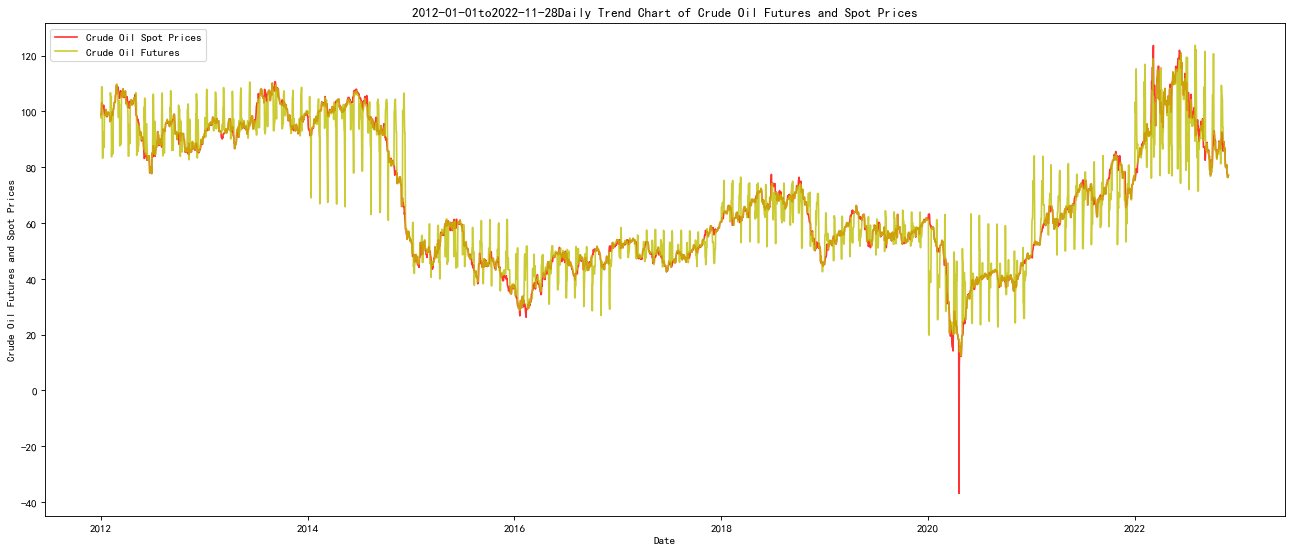

In [6]:
plt.figure(figsize=(20,8),dpi=80)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# Due to the asymmetry of the two datasets, set a common starting time.
start_date = '2012-01-01'
end_date = '2022-11-28'
plt.plot(crude_oil_spot.loc[start_date:end_date],alpha=0.8,label='Crude Oil Spot Prices',color='r')
plt.plot(crude_oil_future.loc[start_date:end_date],alpha=0.8,label='Crude Oil Futures',color='y')
plt.title(start_date + 'to' + end_date + 'Daily Trend Chart of Crude Oil Futures and Spot Prices')
plt.xlabel('Date')
plt.ylabel('Crude Oil Futures and Spot Prices')
plt.legend()

### （3）Historical Data of World Crude Oil Production (Crude oil including lease condensate in Mb/d)
<p> Data Source: U.S. Energy Information Administration (EIA)
<p> Link：https://www.eia.gov/international/data/world/petroleum-and-other-liquids/monthly-petroleum-and-other-liquids-production?pd=5&p=0000000000000000000000000000000000vg&u=0&f=M&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=94694400000&e=1659312000000

In [7]:
# Read the World Crude Oil Production CSV file.
crude_oil_prod = pd.read_csv('Data/INT-Export-12-06-2022_10-12-43.csv', skiprows = [0,2])

# Perform data preprocessing.
crude_oil_prod = crude_oil_prod.T  # Transpose the data.
crude_oil_prod.columns = crude_oil_prod.iloc[1].values
crude_oil_prod = crude_oil_prod.iloc[2:]
crude_oil_prod.index = pd.to_datetime(crude_oil_prod.index) # Convert the date index to Datetime format.
crude_oil_prod

World         Afghanistan         Albania         Algeria  \
1973-01-01         54389                 NaN             NaN            1142   
1973-02-01         54930                 NaN             NaN            1142   
1973-03-01         54995                 NaN             NaN            1142   
1973-04-01         55049                 NaN             NaN            1142   
1973-05-01         56323                 NaN             NaN            1153   
...                  ...                 ...             ...             ...   
2022-04-01  79569.290018                 0.0          15.223          1200.0   
2022-05-01  79011.517726                 0.0          15.135          1210.0   
2022-06-01  79281.404865                 0.0          15.046          1220.0   
2022-07-01  80316.524226                 0.0          14.959          1220.0   
2022-08-01  81445.500222                 0.0          14.871          1230.0   

                   American Samoa         Angola         Antarctica  \
1973-01-01                    NaN            162                NaN   
1973-02-01                    NaN            162                NaN   
1973-03-01                    NaN            162                NaN   
1973-04-01                    NaN            162                NaN   
1973-05-01                    NaN            162                NaN   
...                           ...            ...                ...   
2022-04-01                    0.0    1218.842759                0.0   
2022-05-01                    0.0    1178.842759                0.0   
2022-06-01                    0.0    1218.842759                0.0   
2022-07-01                    0.0    1158.842759                0.0   
2022-08-01                    0.0    1198.842759                0.0   

                   Antigua and Barbuda         Argentina         Armenia  ...  \
1973-01-01                         NaN               NaN             NaN  ...   
1973-02-01                         NaN               NaN             NaN  ...   
1973-03-01                         NaN               NaN             NaN  ...   
1973-04-01                         NaN               NaN             NaN  ...   
1973-05-01                         NaN               NaN             NaN  ...   
...                                ...               ...             ...  ...   
2022-04-01                         0.0        569.191312             0.0  ...   
2022-05-01                         0.0         576.07805             0.0  ...   
2022-06-01                         0.0        573.017763             0.0  ...   
2022-07-01                         0.0        579.357534             0.0  ...   
2022-08-01                         0.0        583.728237             0.0  ...   

                   Uruguay         Uzbekistan         Vanuatu  \
1973-01-01             NaN                NaN             NaN   
1973-02-01             NaN                NaN             NaN   
1973-03-01             NaN                NaN             NaN   
1973-04-01             NaN                NaN             NaN   
1973-05-01             NaN                NaN             NaN   
...                    ...                ...             ...   
2022-04-01             0.0             34.739             0.0   
2022-05-01             0.0             34.595             0.0   
2022-06-01             0.0             34.451             0.0   
2022-07-01             0.0             34.307             0.0   
2022-08-01             0.0             34.164             0.0   

                   Venezuela         Vietnam         Wake Island  \
1973-01-01              3272             NaN                 NaN   
1973-02-01              3309             NaN                 NaN   
1973-03-01              3330             NaN                 NaN   
1973-04-01              3360             NaN                 NaN   
1973-05-01              3426             NaN                 NaN   
...                      ...             ..

#### Plot the latest world crude oil production.

<p> Preprocessing: (1) Utilize latitude and longitude data from the countries.csv file to address geographical issues with the world crude oil production data; (2) Exclude countries with no crude oil production; (3) Resolve discrepancies in country naming between the two DataFrames; (4) After merging the data, scale the crude oil production of each country between [0,1] to ensure controlled plotting.

In [8]:
# Latitude and Longitude Data of Various Countries
countries = pd.read_csv('Data/countries.csv')
countries['name'] = [countries['name'][i].strip() for i in range(len(countries))] # Apply the "strip" to clean the country name data.

# Select crude oil production data for countries other than "World," and then transpose the data.
crude_oil_prod_plot = pd.DataFrame(crude_oil_prod.iloc[-1,1:].T).reset_index()

# Rename the columns and apply the "strip" to clean the country name data.
crude_oil_prod_plot = crude_oil_prod_plot.rename(columns={'index':'name',crude_oil_prod_plot.columns[-1]:'prod'})
crude_oil_prod_plot['name'] = [crude_oil_prod_plot['name'][i].strip() for i in range(len(crude_oil_prod_plot))]

# Select countries with non-zero crude oil production and discard countries with NaN values in the data.
crude_oil_prod_plot = crude_oil_prod_plot.loc[crude_oil_prod_plot['prod']!=0]
crude_oil_prod_plot = crude_oil_prod_plot.dropna(axis=0)

# Rename inconsistent country names in the two dataframes to ensure consistency.
crude_oil_prod_plot['name'] = crude_oil_prod_plot['name'].replace(['Burma','Congo-Brazzaville','Congo-Kinshasa',"Côte d’Ivoire",'South Sudan'],['Myanmar [Burma]','Congo [Republic]','Congo [DRC]',"Côte d'Ivoire",'Sudan'])

# Merge the two sets of data above.
crude_oil_prod_merged = pd.merge(crude_oil_prod_plot,countries,on=['name'],how='inner')

# Scale the crude oil production of each country between [0,1].
scaler=MinMaxScaler(feature_range=(0,1))
crude_oil_prod_merged['prod'] = scaler.fit_transform(np.array(crude_oil_prod_merged['prod']).reshape(-1,1))
crude_oil_prod_merged

name      prod country   latitude   longitude
0         Albania  0.001240      AL  41.153332   20.168331
1         Algeria  0.102710      DZ  28.033886    1.659626
2          Angola  0.100108      AO -11.202692   17.873887
3       Argentina  0.048743      AR -38.416097  -63.616672
4       Australia  0.023046      AU -25.274398  133.775136
..            ...       ...     ...        ...         ...
89  United States  1.000000      US  37.090240  -95.712891
90     Uzbekistan  0.002851      UZ  41.377491   64.585262
91      Venezuela  0.059287      VE   6.423750  -66.589730
92        Vietnam  0.014724      VN  14.058324  108.277199
93          Yemen  0.004257      YE  15.552727   48.516388

[94 rows x 5 columns]

#### （A）Utilize Basemap for plotting.

In [9]:
# Parameter Configuration
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

%matplotlib inline

#Increasing Figure Size
rcParams['figure.figsize'] = (14,10)

#### Add text to the plot.

C:\Users\Myth.God\Anaconda3-Y2023\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from current font.
  func(*args, **kwargs)
C:\Users\Myth.God\Anaconda3-Y2023\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


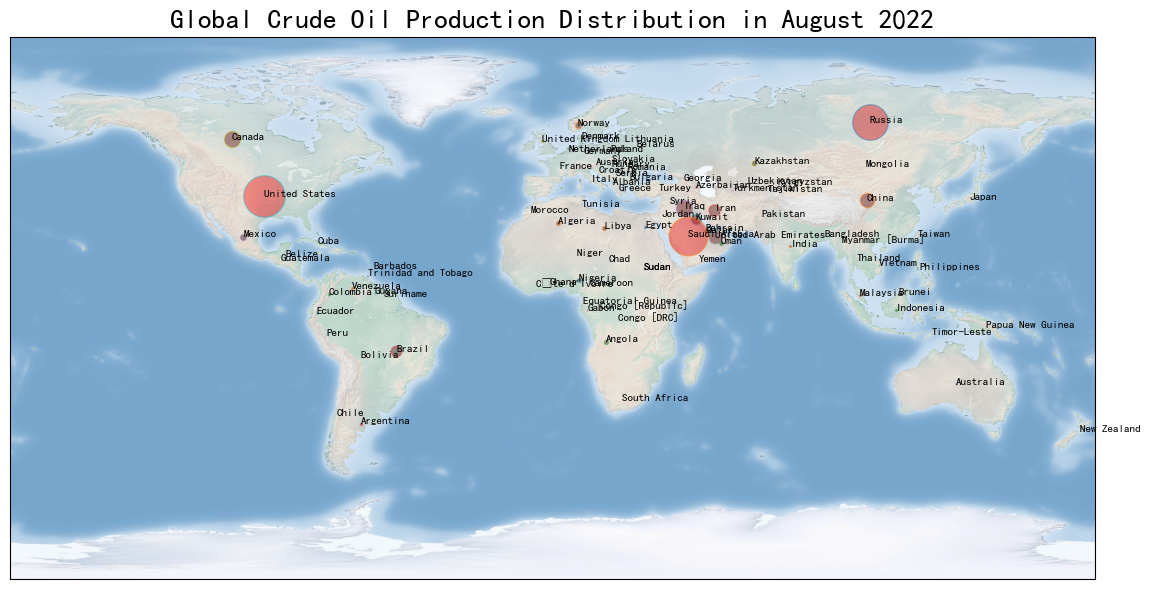

In [10]:
lon_list = crude_oil_prod_merged.longitude.values
lat_list = crude_oil_prod_merged.latitude.values
name_list = crude_oil_prod_merged.name.values
val_list = crude_oil_prod_merged['prod'].values

my_map = Basemap()
my_map.fillcontinents(color = 'white', alpha = 0.5)

for (lat, lon, name, val) in zip(lat_list, lon_list, name_list, val_list):
    
    my_map.plot(lon, 
                lat,
                markerfacecolor = (val/max(val_list),0,0), 
                marker='o', 
                markersize= (30*val), 
                alpha = 0.4)
    
    plt.text(lon, lat, name,
             size = 8, 
             color = "black")
    
    
#add title
plt.title("Global Crude Oil Production Distribution in August 2022", fontsize = 20)

my_map.shadedrelief()

#### （B）Create plots using the Folium mapping library.

In [11]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

latitude, longitude = (max(lat_list)+min(lat_list))/2, (max(lon_list)+min(lon_list))/2

# Add incidents to map
world_map = folium.Map(location=[latitude, longitude], zoom_start=2)

# Loop through the 200 crimes and add each to the incidents feature group
for (lat, lon, name, val) in zip(lat_list, lon_list, name_list, val_list):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius=20*(val/max(val_list)), # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
    
#     folium.Marker([lat, lon], popup=name).add_to(world_map)
    
world_map.add_child(incidents)

#### Select and preprocess the global crude oil production data for the "World" to prepare for subsequent modeling.

In [12]:
# Selecting World
production = pd.DataFrame(crude_oil_prod.iloc[:,0])

# Rename the columns.
production = production.rename(columns={'    World':'production'})

# Convert the historical crude oil production data from Object format to Float format.
production.iloc[:,0] = production.iloc[:,0].astype(float)

# Since global crude oil production is provided on a monthly basis, which differs from the daily data we are trying to work with, we can use the interpolate function to linearly transform the monthly data to daily data.
production = production.resample('D').interpolate()
production

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_19316\572931543.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  production.iloc[:,0] = production.iloc[:,0].astype(float)


production
1973-01-01  54389.000000
1973-01-02  54406.451613
1973-01-03  54423.903226
1973-01-04  54441.354839
1973-01-05  54458.806452
...                  ...
2022-07-28  81299.825900
2022-07-29  81336.244481
2022-07-30  81372.663061
2022-07-31  81409.081642
2022-08-01  81445.500222

[18110 rows x 1 columns]

### （4）U.S. Dollar Index (USDX) Historical Data & Historical Data of the VIX Index
<p> Data Source: Investing.com
    <p> USDX：https://cn.investing.com/indices/usdollar-historical-data
    <p> VIX：https://cn.investing.com/indices/volatility-s-p-500-historical-data

In [13]:
# Read the CSV file.
usdx, vix = pd.read_csv('Data/Historical Data of U.S. Dollar Index.csv', index_col = 0), pd.read_csv('Data/Historical Data of the VIX Panic Index.csv', index_col = 0)

# Rename the index and columns.
usdx.index.name, vix.index.name = 'date', 'date'
usdx, vix = usdx.rename(columns={'收盘':'usdx_close'}), vix.rename(columns={'收盘':'vix_close'})

# Select the required closing price data.
usdx, vix = usdx[['usdx_close']], vix[['vix_close']]

# Same as above, set the index as Datetime, sort in chronological order, and then fill missing values forward along the columns.
usdx.index, vix.index = pd.to_datetime(usdx.index), pd.to_datetime(vix.index)
usdx.sort_index(inplace = True), vix.sort_index(inplace = True)
usdx_idx, vix_idx = pd.date_range(usdx.index[0], usdx.index[-1]), pd.date_range(vix.index[0], vix.index[-1])
usdx, vix = usdx.reindex(usdx_idx).ffill(), vix.reindex(vix_idx).ffill() # Missing Value Handling: Fill missing values forward along the columns.

#### Plotting the above UDSX and VIX historical data

Text(0, 0.5, 'US Dollar and VIX Index')

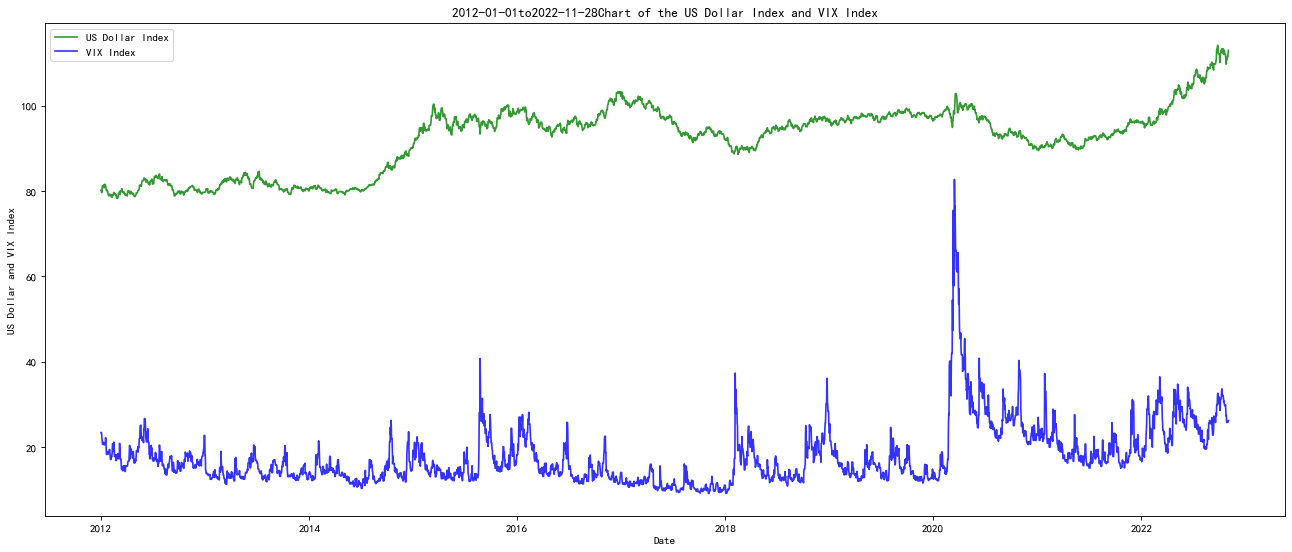

In [14]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(usdx.loc[start_date:end_date],alpha=0.8,label='US Dollar Index',color='g')
plt.plot(vix.loc[start_date:end_date],alpha=0.8,label='VIX Index',color='b')
plt.title(start_date + 'to' + end_date + 'Chart of the US Dollar Index and VIX Index')
plt.legend()
plt.xlabel('Date')
plt.ylabel('US Dollar and VIX Index')

#### Merge all the above historical data

In [15]:
data_merged = pd.merge(crude_oil_spot,crude_oil_future,left_index=True,right_index=True,how='inner')
for i in production, usdx, vix:
    data_merged = pd.merge(data_merged,i,left_index=True,right_index=True,how='inner')
for i in data_merged.columns:
    data_merged[i] = data_merged[i].values.astype(float)
data_merged.index.name = 'date'
data_merged = data_merged.loc[start_date:end_date]
data_merged

spot_close  future_close    production  usdx_close  vix_close
date                                                                     
2012-01-01       98.83         98.83  76731.481510       80.18      23.40
2012-01-02       98.83         97.61  76739.341188       80.18      23.40
2012-01-03      102.96        108.84  76747.200865       79.61      22.97
2012-01-04      103.22        108.84  76755.060543       80.13      22.22
2012-01-05      101.81        106.16  76762.920220       80.94      21.48
...                ...           ...           ...         ...        ...
2022-07-28       99.11         96.42  81299.825900      106.35      22.33
2022-07-29      101.31         98.62  81336.244481      105.90      21.33
2022-07-30      101.31         98.62  81372.663061      105.90      21.33
2022-07-31      101.31         98.62  81409.081642      105.90      21.33
2022-08-01       96.59         98.62  81445.500222      105.45      22.84

[3866 rows x 5 columns]

## 2-- Data Analysis

### （1）Statistical analysis of data

#### Descriptive statistics were performed on the above merged data

In [16]:
data_merged.describe()

spot_close  future_close    production   usdx_close    vix_close
count  3866.000000   3866.000000   3866.000000  3866.000000  3866.000000
mean     67.737416     67.581242  79407.551854    91.889415    17.499436
std      23.464476     23.028545   2888.948610     7.216060     6.927367
min     -36.980000     12.340000  70283.740934    78.270000     9.140000
25%      49.042500     49.182500  76983.048011    83.822500    13.072500
50%      61.355000     61.410000  80276.072064    94.190000    15.625000
75%      92.010000     91.550000  81670.463884    97.200000    19.907500
max     123.640000    120.930000  84585.020575   108.540000    82.690000

In [17]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3866 entries, 2012-01-01 to 2022-08-01
Freq: D
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spot_close    3866 non-null   float64
 1   future_close  3866 non-null   float64
 2   production    3866 non-null   float64
 3   usdx_close    3866 non-null   float64
 4   vix_close     3866 non-null   float64
dtypes: float64(5)
memory usage: 181.2 KB


#### Multiple regression modeling of the merged data for each parameter of the subsequent prediction study

In [18]:
ols = smf.ols('spot_close ~ future_close + production + usdx_close + vix_close', data=data_merged).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             spot_close   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:22:31   Log-Likelihood:                -12912.
No. Observations:                3866   AIC:                         2.583e+04
Df Residuals:                    3861   BIC:                         2.587e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.6817      3.566      2.435   

#### Since world crude oil production (Production) is not significant, this variable is excluded here

In [19]:
ols = smf.ols('spot_close ~ future_close + usdx_close + vix_close', data=data_merged).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             spot_close   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:22:32   Log-Likelihood:                -12912.
No. Observations:                3866   AIC:                         2.583e+04
Df Residuals:                    3862   BIC:                         2.586e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.8306      2.209      5.356   

#### Perform a stationarity test on the data

In [20]:
# Define the stationarity test function
def stationarity_test(ts):
    #The ADF (Augmented Dickey Fuller) Test is performed to test the stationarity of the series
    #Null Hypothesis: The series has a unit root (value of a =1)
    #Alternate Hypothesis: The series has no unit root.
    def adf_test(ts):
        #Perform Dickey-Fuller test:
        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(ts, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
           dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
        print(f'Result: The series is {"not " if dfoutput.loc["p-value"] > 0.05 else ""}stationary', '\n')
    
    print(adf_test(ts))

In [21]:
# Stationarity tests are performed on the respective data
for i in data_merged.columns:
    print('Stationarity test for: ' + i)
    stationarity_test(data_merged[i])

Stationarity test for: spot_close
Results of Dickey-Fuller Test:
Test Statistic                   -1.889680
p-value                           0.336931
#Lags Used                       23.000000
Number of Observations Used    3842.000000
Critical Value (1%)              -3.432053
Critical Value (5%)              -2.862293
Critical Value (10%)             -2.567171
dtype: float64
Result: The series is not stationary 

None
Stationarity test for: future_close
Results of Dickey-Fuller Test:
Test Statistic                   -0.838470
p-value                           0.807560
#Lags Used                       30.000000
Number of Observations Used    3835.000000
Critical Value (1%)              -3.432056
Critical Value (5%)              -2.862294
Critical Value (10%)             -2.567171
dtype: float64
Result: The series is not stationary 

None
Stationarity test for: production
Results of Dickey-Fuller Test:
Test Statistic                   -3.359093
p-value                           0.0124

#### From the results, all but Vix_close and Production are non-stationary time series, so they are differentiated

In [22]:
data_diff = pd.DataFrame()
# In addition to Vix_close, Production performs first-order differencing.
for i in ['spot_close','future_close','usdx_close']:
    data_diff[i+'_diff'] = data_merged[i].diff()
data_diff = data_diff.dropna(axis = 0)
data_diff = pd.merge(data_diff,pd.DataFrame(data_merged[['production','vix_close']]),left_index=True,right_index=True,how='inner')
data_diff

spot_close_diff  future_close_diff  usdx_close_diff    production  \
date                                                                            
2012-01-02             0.00              -1.22             0.00  76739.341188   
2012-01-03             4.13              11.23            -0.57  76747.200865   
2012-01-04             0.26               0.00             0.52  76755.060543   
2012-01-05            -1.41              -2.68             0.81  76762.920220   
2012-01-06            -0.25             -22.93             0.31  76770.779898   
...                     ...                ...              ...           ...   
2022-07-28            -0.92              -0.84            -0.10  81299.825900   
2022-07-29             2.20               2.20            -0.45  81336.244481   
2022-07-30             0.00               0.00             0.00  81372.663061   
2022-07-31             0.00               0.00             0.00  81409.081642   
2022-08-01            -4.72               0.00            -0.45  81445.500222   

            vix_close  
date                   
2012-01-02      23.40  
2012-01-03      22.97  
2012-01-04      22.22  
2012-01-05      21.48  
2012-01-06      20.63  
...               ...  
2022-07-28      22.33  
2022-07-29      21.33  
2022-07-30      21.33  
2022-07-31      21.33  
2022-08-01      22.84  

[3865 rows x 5 columns]

#### The ADF test was performed again on the data after first-order differencing

In [23]:
for i in data_diff.columns:
    print('Stationarity test for: ' + i)
    stationarity_test(data_diff[i])

Stationarity test for: spot_close_diff
Results of Dickey-Fuller Test:
Test Statistic                -1.123765e+01
p-value                        1.840227e-20
#Lags Used                     2.200000e+01
Number of Observations Used    3.842000e+03
Critical Value (1%)           -3.432053e+00
Critical Value (5%)           -2.862293e+00
Critical Value (10%)          -2.567171e+00
dtype: float64
Result: The series is stationary 

None
Stationarity test for: future_close_diff
Results of Dickey-Fuller Test:
Test Statistic                -1.834408e+01
p-value                        2.243121e-30
#Lags Used                     3.000000e+01
Number of Observations Used    3.834000e+03
Critical Value (1%)           -3.432057e+00
Critical Value (5%)           -2.862294e+00
Critical Value (10%)          -2.567171e+00
dtype: float64
Result: The series is stationary 

None
Stationarity test for: usdx_close_diff
Results of Dickey-Fuller Test:
Test Statistic                  -62.288073
p-value            

#### We can see that all the data is now stationary, try to run the OLS regression of the crude oil spot price on the other variables again

In [24]:
ols_diff = smf.ols('spot_close_diff ~ future_close_diff + production + usdx_close_diff + vix_close', data=data_diff).fit()
print(ols_diff.summary())

                            OLS Regression Results                            
Dep. Variable:        spot_close_diff   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     15.76
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           8.46e-13
Time:                        11:22:40   Log-Likelihood:                -7533.2
No. Observations:                3865   AIC:                         1.508e+04
Df Residuals:                    3860   BIC:                         1.511e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8319      0.80

#### From the above results, the OLS regression using stationary data after differencing results in all its variables being significant. However, it can be found that the adjusted goodness-of-fit of the post-differential regression is greatly reduced from 0.915 to 0.015, indicating that the pre-differential regression is more effective. Combined with the fact that the LSTM model itself is a recurrent neural network, which is not sufficiently necessary for the data to be stationary or not, this project will use the pre-differential data for the LSTM predictive modelling.

### （2）Define various required functions

#### （1）Define training and validation set segmentation functions

In [25]:
## Calculate the training weights, training intervals, and validation intervals by the set date for training the data, and finally output the training + validation set data with the number of training
def trainvalsplit(split_date): #训练与验证集分割日期
    train_val_data = data_merged.reset_index()
    train_weight = train_val_data.index.astype(int)[train_val_data['date'] == split_date][0]/len(train_val_data)
    training_size = int(len(train_val_data)*train_weight)
    return train_val_data, training_size

#### （2）Define the execution of the LSTM recurrent neural network model

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))

# Out-of-sample forecasting length
pred = 150

def run_lstm(x):
    loss = pd.DataFrame()
    train_fc = pd.DataFrame()
    val_fc = pd.DataFrame()
    future_fc = pd.DataFrame()
    
    data_reshaped = scaler.fit_transform(np.array(data_merged[x]).reshape(-1,1))

    ## Split the data in two by the calculated training weights: training set and validation set
    train_data, val_data = data_reshaped[:training_size], data_reshaped[training_size:]

    # Converting an array of values to a dataset matrix
    def create_dataset(df, previous=1):
        dataX, dataY = [], []
        for i in range(len(df)-previous-1):
            a = df[i:(i+previous), 0]
            dataX.append(a)
            dataY.append(df[i + previous, 0])
        return np.array(dataX), np.array(dataY)

    # Remodelled as X=t,t+1,t+2,t+3 and Y=t+4.
    X_train, y_train = create_dataset(train_data, previous)
    X_val, y_val = create_dataset(val_data, previous)

    # Reshape the inputs into [samples, input steps, features] to satisfy the matrix needed to construct the LSTM model
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
    
    history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,batch_size=batch_size,verbose=1)
    loss[x+'_loss'], loss[x+'_val_loss'] = history.history['loss'], history.history['val_loss']
    
    train_predict, val_predict = model.predict(X_train), model.predict(X_val)
    
    train_fc, val_fc = pd.DataFrame(scaler.inverse_transform(train_predict)), pd.DataFrame(scaler.inverse_transform(val_predict))
    train_fc, val_fc = train_fc.rename(columns={0:x}), val_fc.rename(columns={0:x})
    
    
    ## Forecasting the future out of sample
    x_input=val_data[len(val_data)-input_step:].reshape(1,-1)

    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output=[]
    n_steps = input_step
    i = 0
    
    while(i<pred):

        if(len(temp_input)>n_steps):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, 1, n_steps))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, 1, n_steps))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i=i+1
    
    data2 = data_merged[x].tolist()
    data2.extend([i[0] for i in scaler.inverse_transform(lst_output)])
    date = pd.to_datetime(pd.concat([pd.DatetimeIndex(data_merged.index).to_series(), pd.date_range(datetime.datetime.strptime(str(data_merged.index[-1])[:10], "%Y-%m-%d") + datetime.timedelta(days=1), periods=pred).astype('datetime64[ns]').to_series()])).astype(str).tolist()

    future_fc[x], future_fc.index = data2, date
    future_fc.index.name = 'date'
    future_fc.index = pd.to_datetime(future_fc.index)
    future_fc = future_fc.iloc[-pred:]
    
    return loss, train_fc, val_fc, future_fc

#### （3）Define functions that plot training and validation error (Loss) iterations, training and validation predictions, and out-of-sample future predictions

In [27]:
def lstm_plot(loss,train,val,future):
    # Plotting Training and Validation Error (Loss) Iterations
    plt.figure(figsize=(20,8),dpi=80)
    plt.plot(scaler.fit_transform(np.array(loss.iloc[:,0]).reshape(-1,1)), label = 'training_loss')
    plt.plot(scaler.fit_transform(np.array(loss.iloc[:,1]).reshape(-1,1)), label = 'validation_loss')
    plt.title(loss.columns[0][:-5]+'iterative plot of training and validation errors')
    plt.legend()
    
    # Panning the forecasts of the training data to plot the graphs
    data_reshaped = np.array(train_val_data.iloc[:,-1]).reshape(-1,1)
    trainPredictPlot = np.empty_like(data_reshaped)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot = [i[0] for i in trainPredictPlot]
    trainPredictPlot[input_step:len(train)+input_step] = [i[0] for i in train.values]
    
    # Panning the predicted values of the validation data to plot the graphs
    valPredictPlot = np.empty_like(data_reshaped)
    valPredictPlot[:, :] = np.nan
    valPredictPlot = [i[0] for i in valPredictPlot]
    valPredictPlot[len(train)+(input_step*2)+1:len(data_reshaped)-1] = [i[0] for i in val.values]
    
    # Plotting baseline and predicted values
    plt.figure(figsize=(30,12),dpi=160)
    plt.plot(data_merged.reset_index()[train.columns[0]], alpha = 0.8, label = 'Original data')
    plt.plot(trainPredictPlot,'m', label = 'Training set prediction')
    plt.plot(valPredictPlot, 'r', label = 'Validation set prediction')
    plt.title(train.columns[0]+'LSTM model training and validation prediction plots')
    plt.xlabel('Date')
    plt.ylabel(train.columns[0])
    plt.legend()
    plt.show()
    
    # Mapping out-of-sample future forecasting
    plt.figure(figsize=(30,12),dpi=160)
    plt.plot(future)
    plt.title(future.columns[0]+'LSTM model out-of-sample'+str(pred)+'day prediction charts')
    plt.xlabel('Date')
    plt.ylabel(future.columns[0])
    plt.show()

#### （4）Define the function that stores the results of all training, validation, forecasting, etc.

In [28]:
def save_result(loss,train_fc,val_fc,future_fc):
    alloutputs = [list(loss.values)]
    alloutputs.append([list(train_fc.values)])
    alloutputs.append([list(val_fc.values)])
    np.save('Data/'+future_fc.columns[0]+'_output.npy',alloutputs)
    future_fc.to_csv('Data/'+future_fc.columns[0]+'_forecast.csv')

#### （5）Define the function that reads the data corresponding to the function in (4).

In [29]:
def read_result(x):
    outputs = np.load('Data/'+x+'_output.npy',allow_pickle=True)
    outputs = outputs.tolist()
    loss = pd.DataFrame(outputs[0])
    loss = loss.rename(columns={0:x+'_diff_loss',1:x+'_val_loss'})
    train_fc = pd.DataFrame([outputs[1][0][i][0] for i in range(len(outputs[1][0]))])
    train_fc = train_fc.rename(columns={0:x})
    val_fc = pd.DataFrame([outputs[2][0][i][0] for i in range(len(outputs[2][0]))])
    val_fc = val_fc.rename(columns={0:x})
    future_fc = pd.read_csv('Data/'+x+'_forecast.csv',index_col=0)
    future_fc.index = pd.to_datetime(future_fc.index)
    return loss, train_fc, val_fc, future_fc

## 3-- Machine Learning Based Data Analytics - LSTM Predictive Modelling

#### Starting LSTM predictive modelling for all variables (except Production which was not significant a

#### （1）Spot Close Forecasting

In [30]:
# Parameter settings
train_val_data, training_size = trainvalsplit('2018-07-01')
input_step = 180
previous = input_step
layer_unit = 50
epochs = 30
batch_size = 128

# LSTM Structure
model = keras.Sequential()
model.add(LSTM(layer_unit, return_sequences=True, input_shape=(1,input_step)))
model.add(LSTM(layer_unit, return_sequences=True))
model.add(LSTM(layer_unit))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             46200     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 86651 (338.48 KB)
Trainable params: 86651 (338.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Start running LSTM (for demonstration purposes, not for running, previous results are already saved)

In [31]:
spot_loss, spot_train_fc, spot_val_fc, spot_future_fc = run_lstm('spot_close')

Epoch 1/30
18/18 [==============================] - 11s 187ms/step - loss: 0.2438 - val_loss: 0.0117
Epoch 2/30
18/18 [==============================] - 0s 16ms/step - loss: 0.0260 - val_loss: 0.0153
Epoch 3/30
18/18 [==============================] - 0s 16ms/step - loss: 0.0157 - val_loss: 0.0161
Epoch 4/30
18/18 [==============================] - 0s 16ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 5/30
18/18 [==============================] - 0s 17ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 6/30
18/18 [==============================] - 0s 16ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 7/30
18/18 [==============================] - 0s 17ms/step - loss: 0.0040 - val_loss: 0.0049
Epoch 8/30
18/18 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 9/30
18/18 [==============================] - 0s 18ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 10/30
18/18 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 1

#### Plot training and validation error (Loss) iterations, training and validation predictions, and out-of-sample future predictions using defined functions (for demonstration purposes, may not be run, saved results will be shown later).

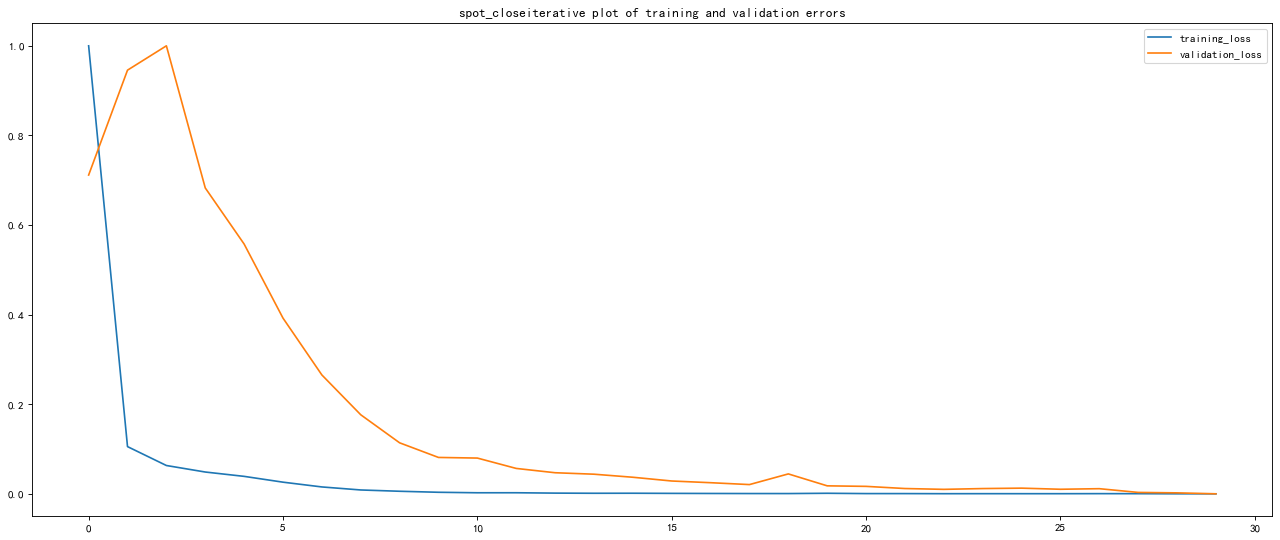

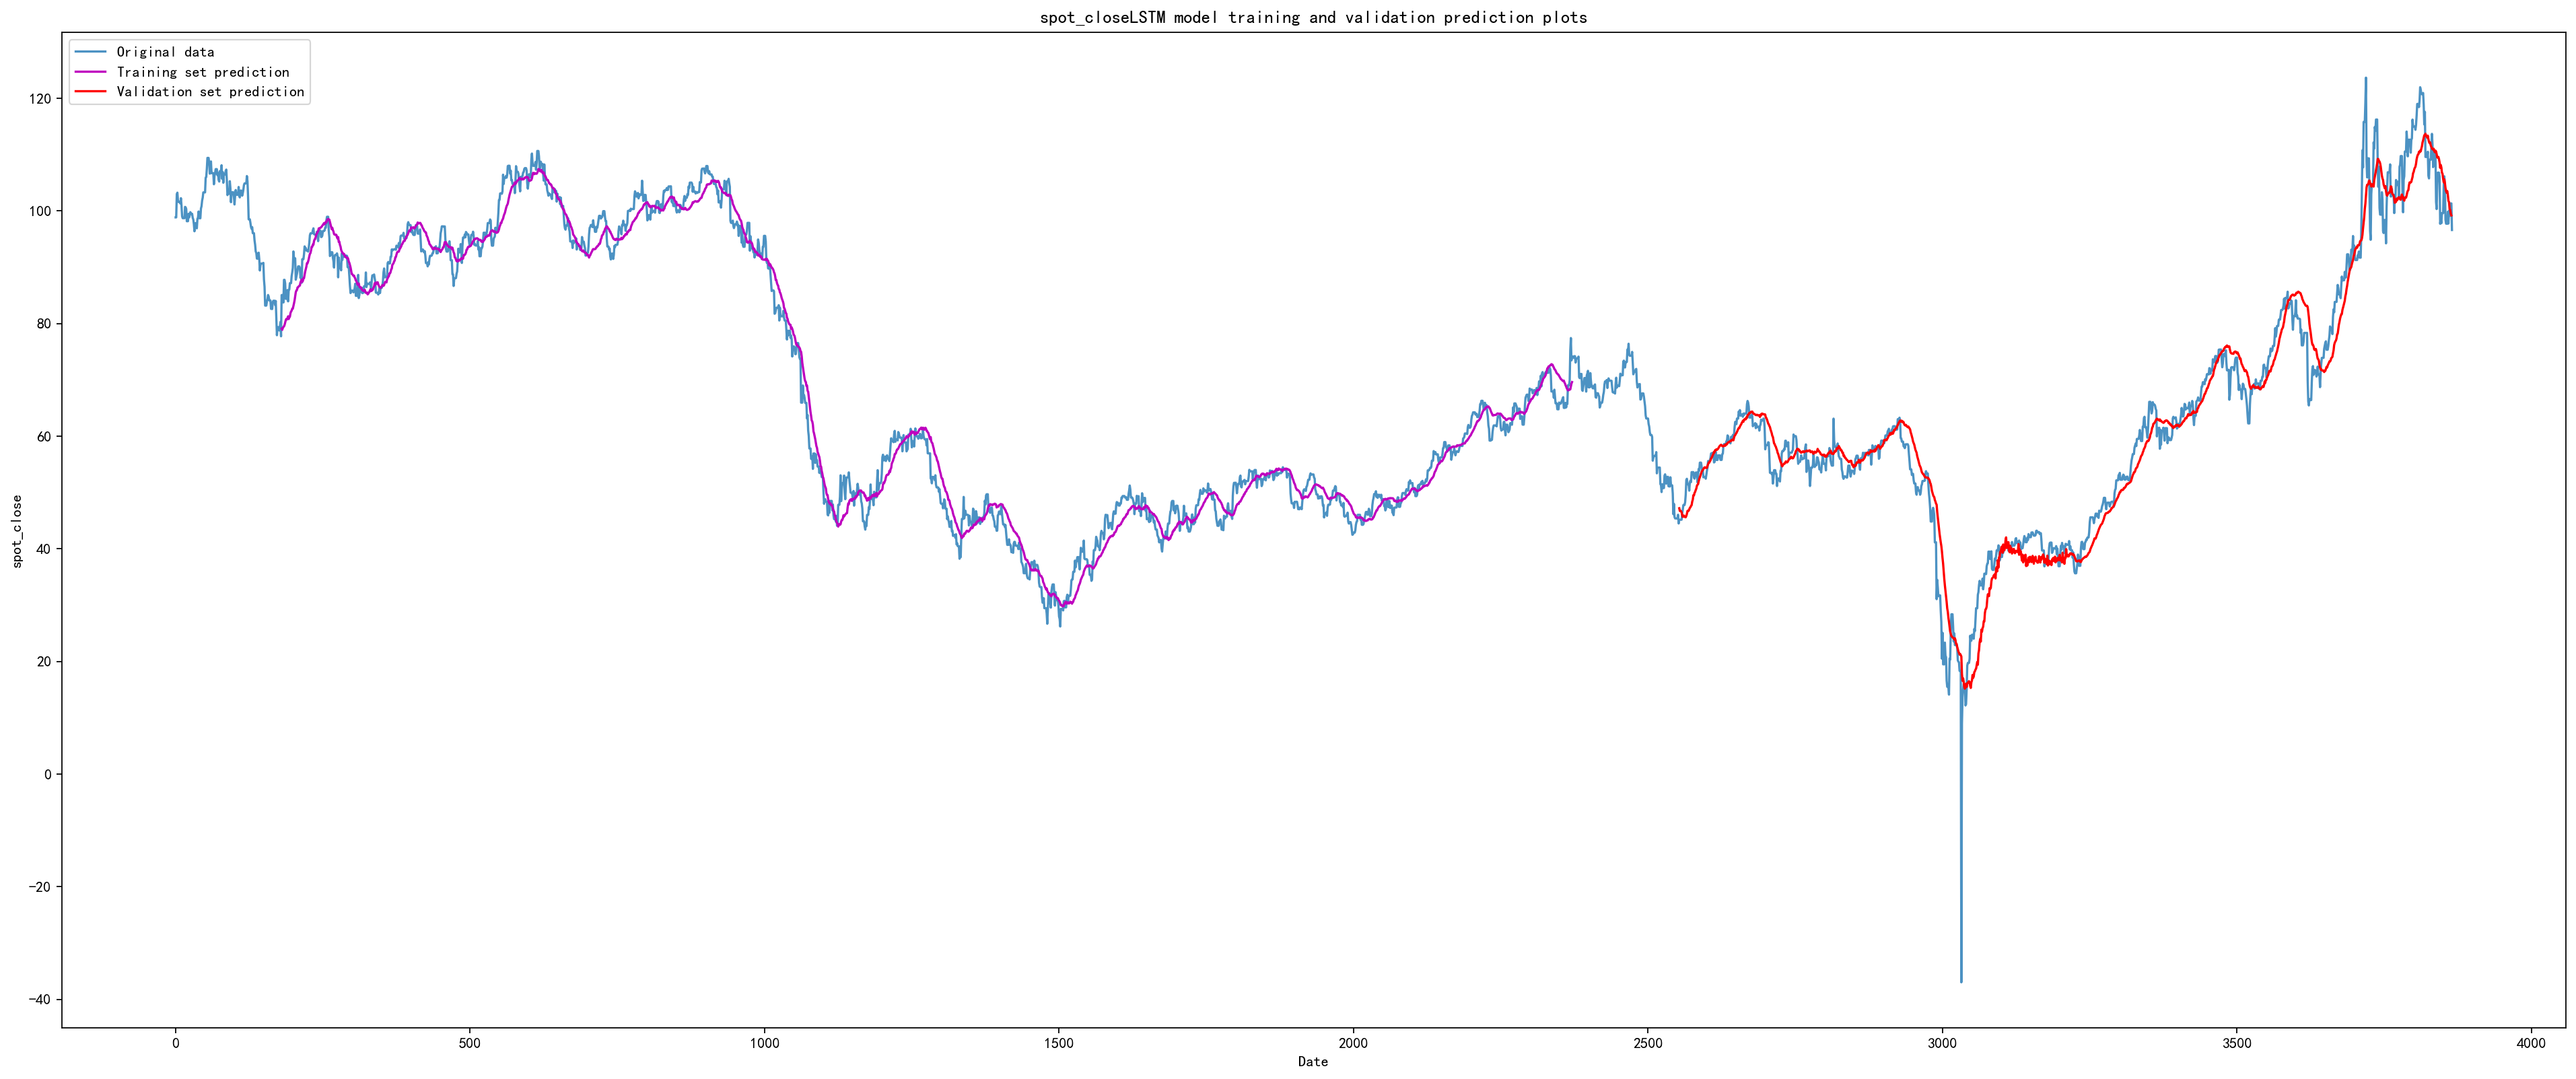

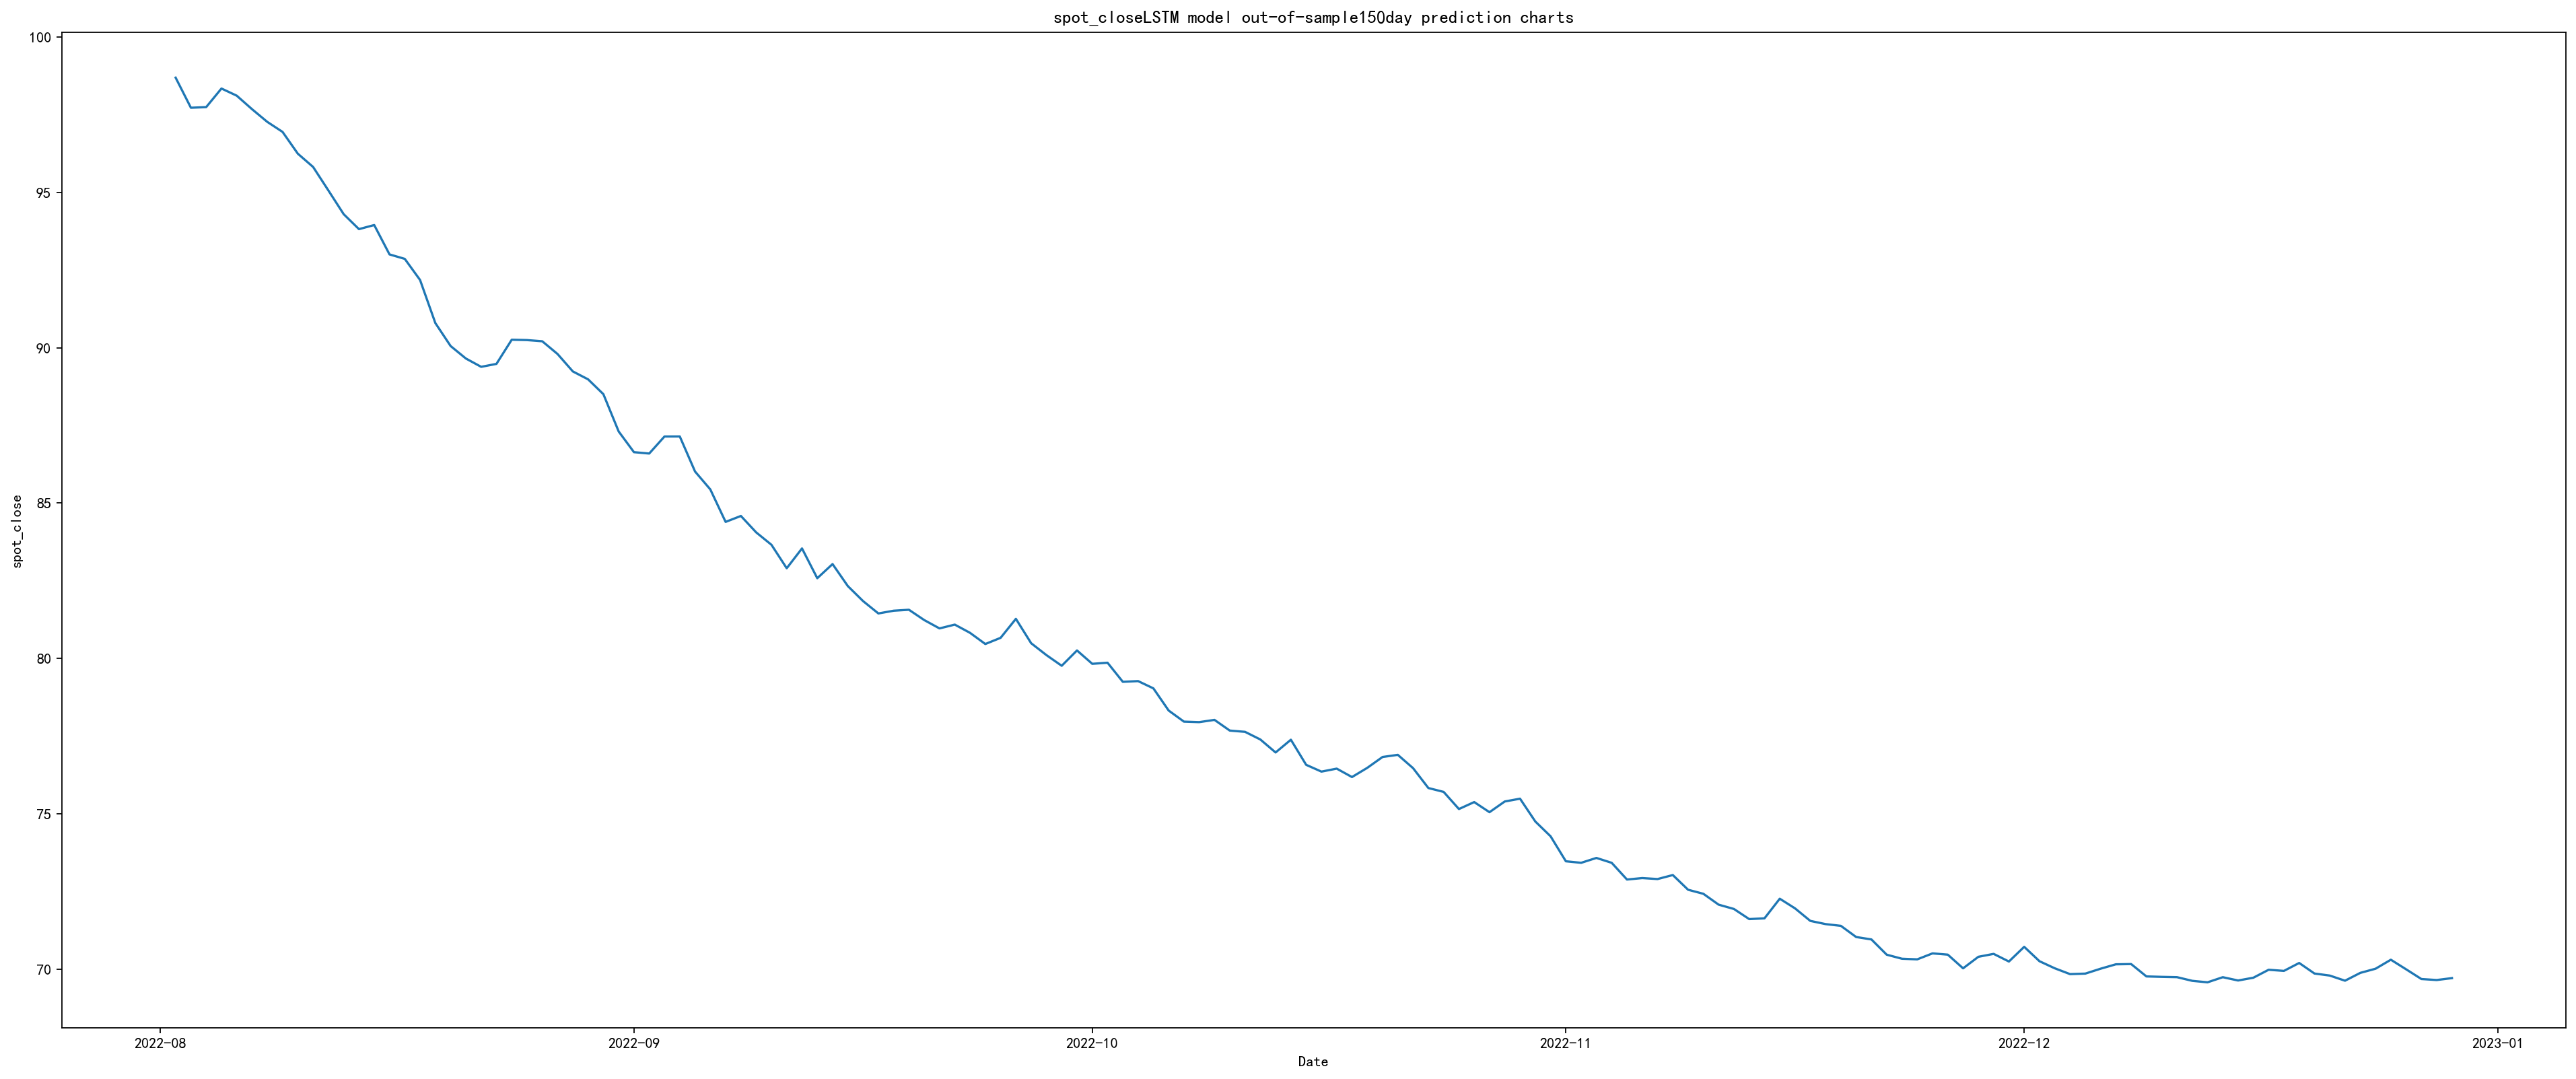

In [32]:
lstm_plot(spot_loss,spot_train_fc,spot_val_fc,spot_future_fc)

#### Store the results (not run here to avoid overwriting previous results)

In [33]:
# save_result(spot_loss, spot_train_fc, spot_val_fc, spot_future_fc)

#### Read and plot all previous results for the above steps

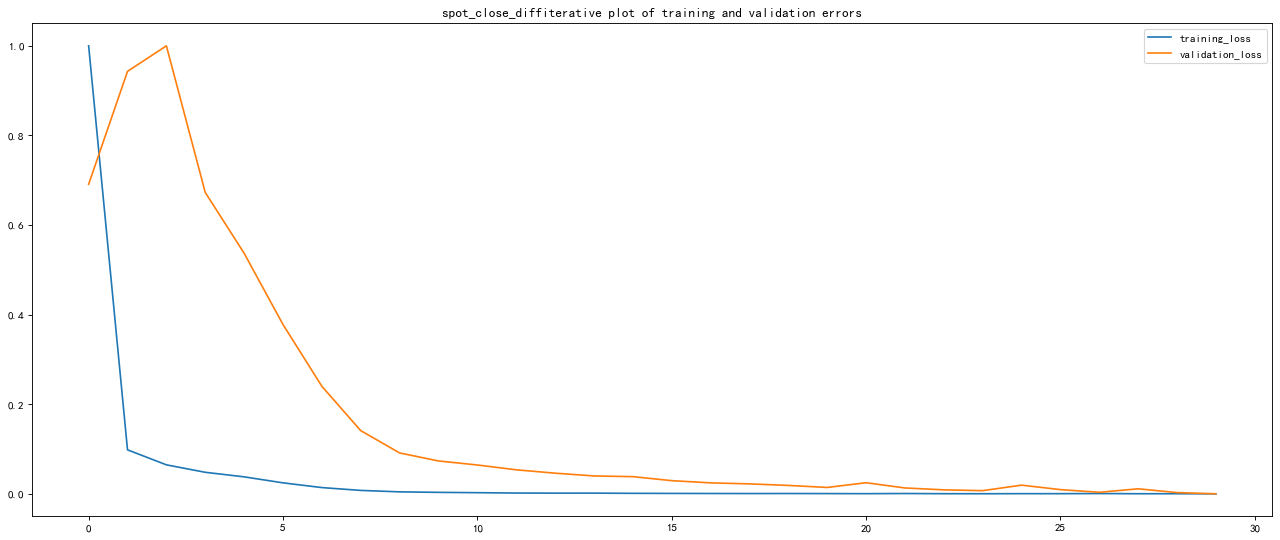

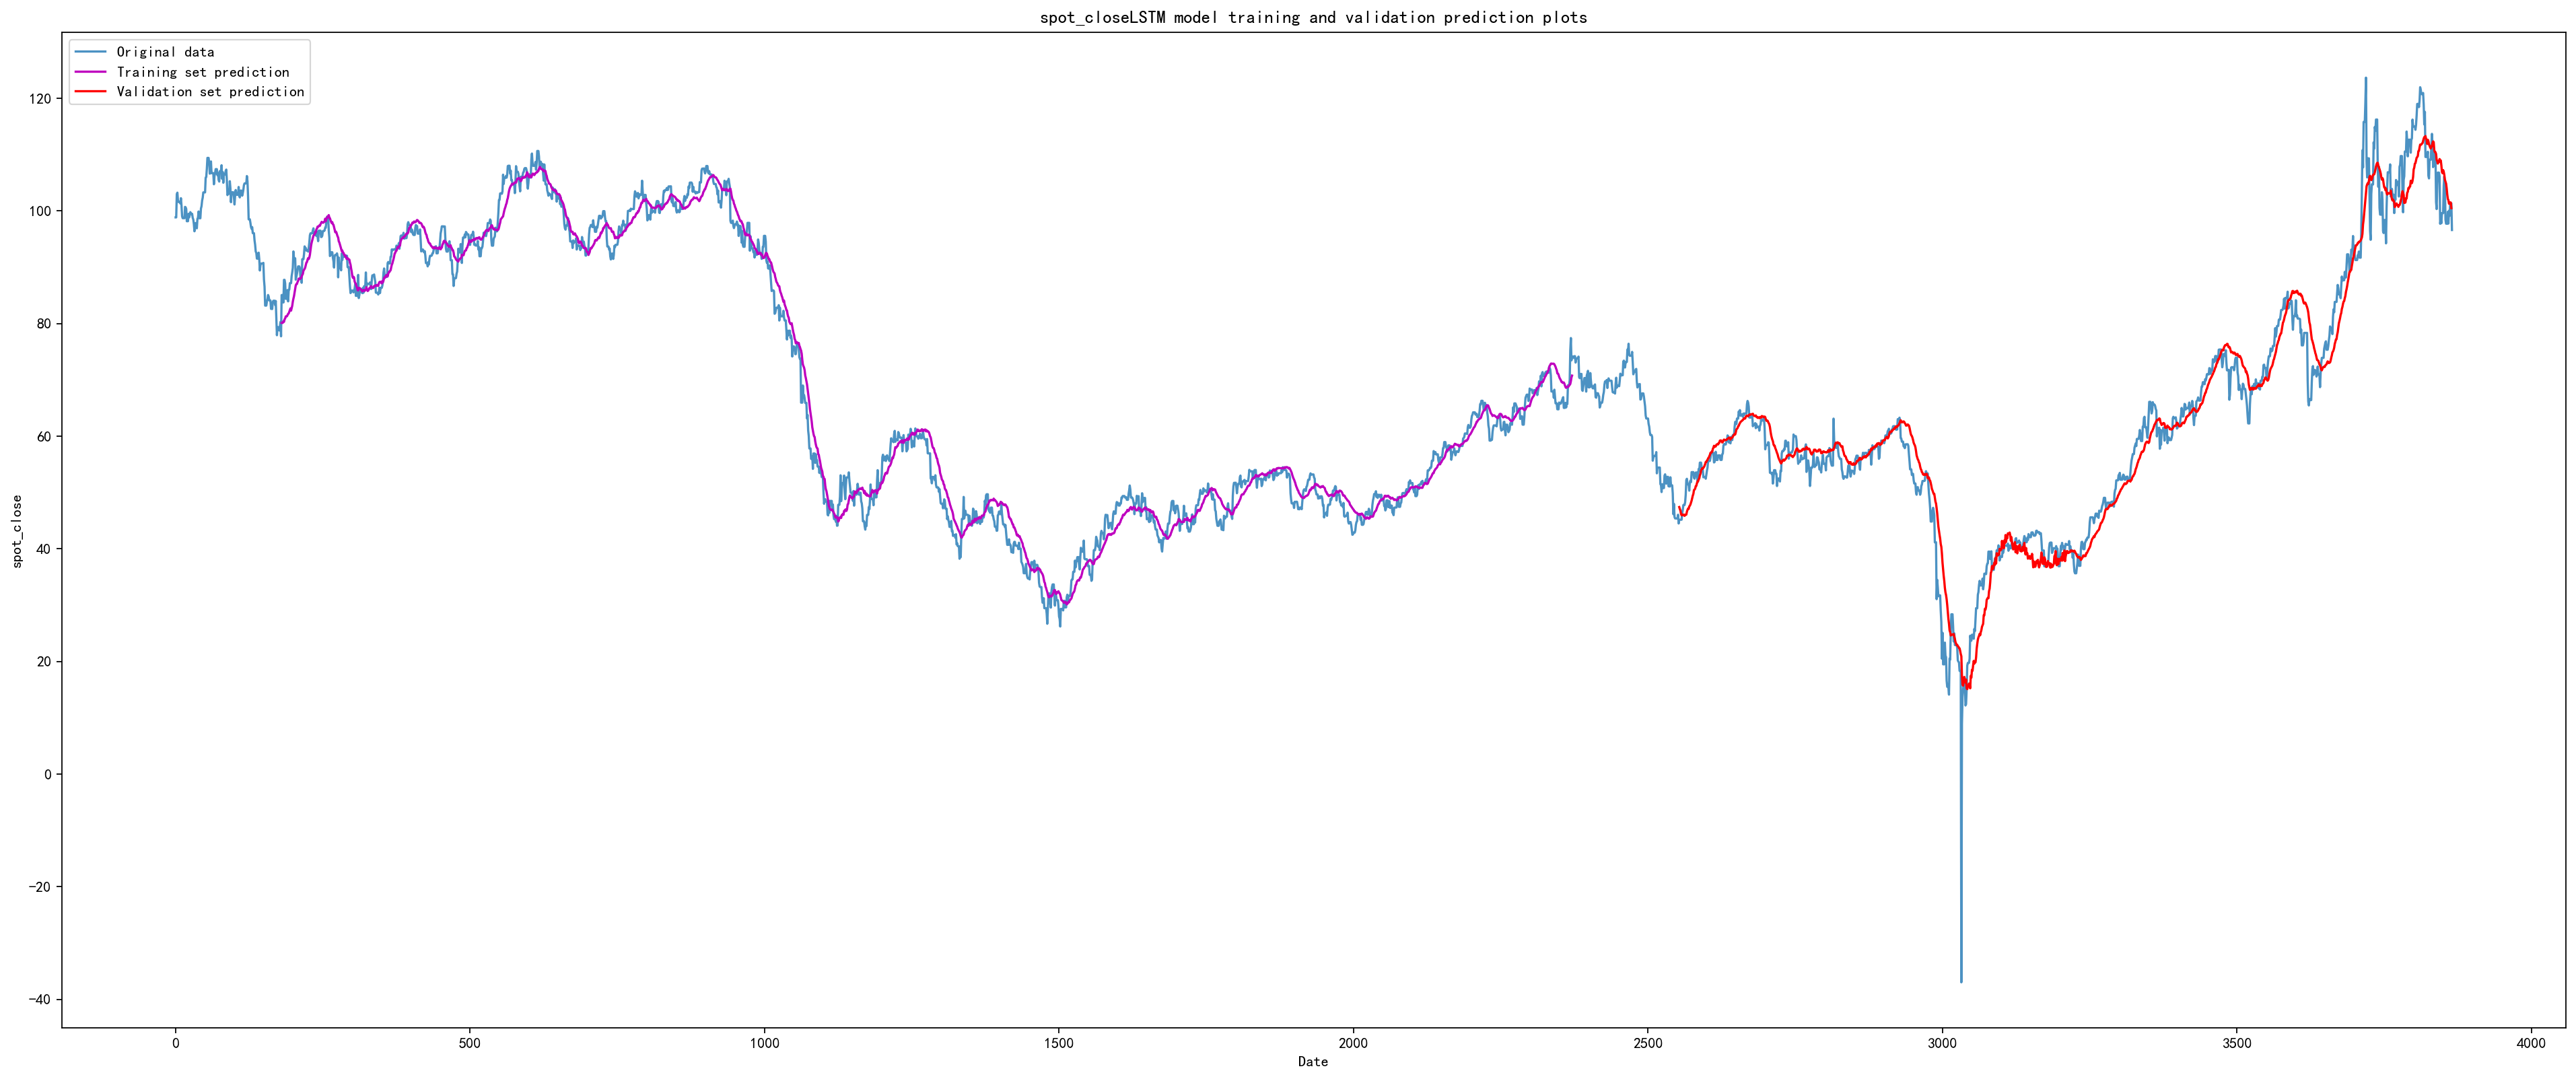

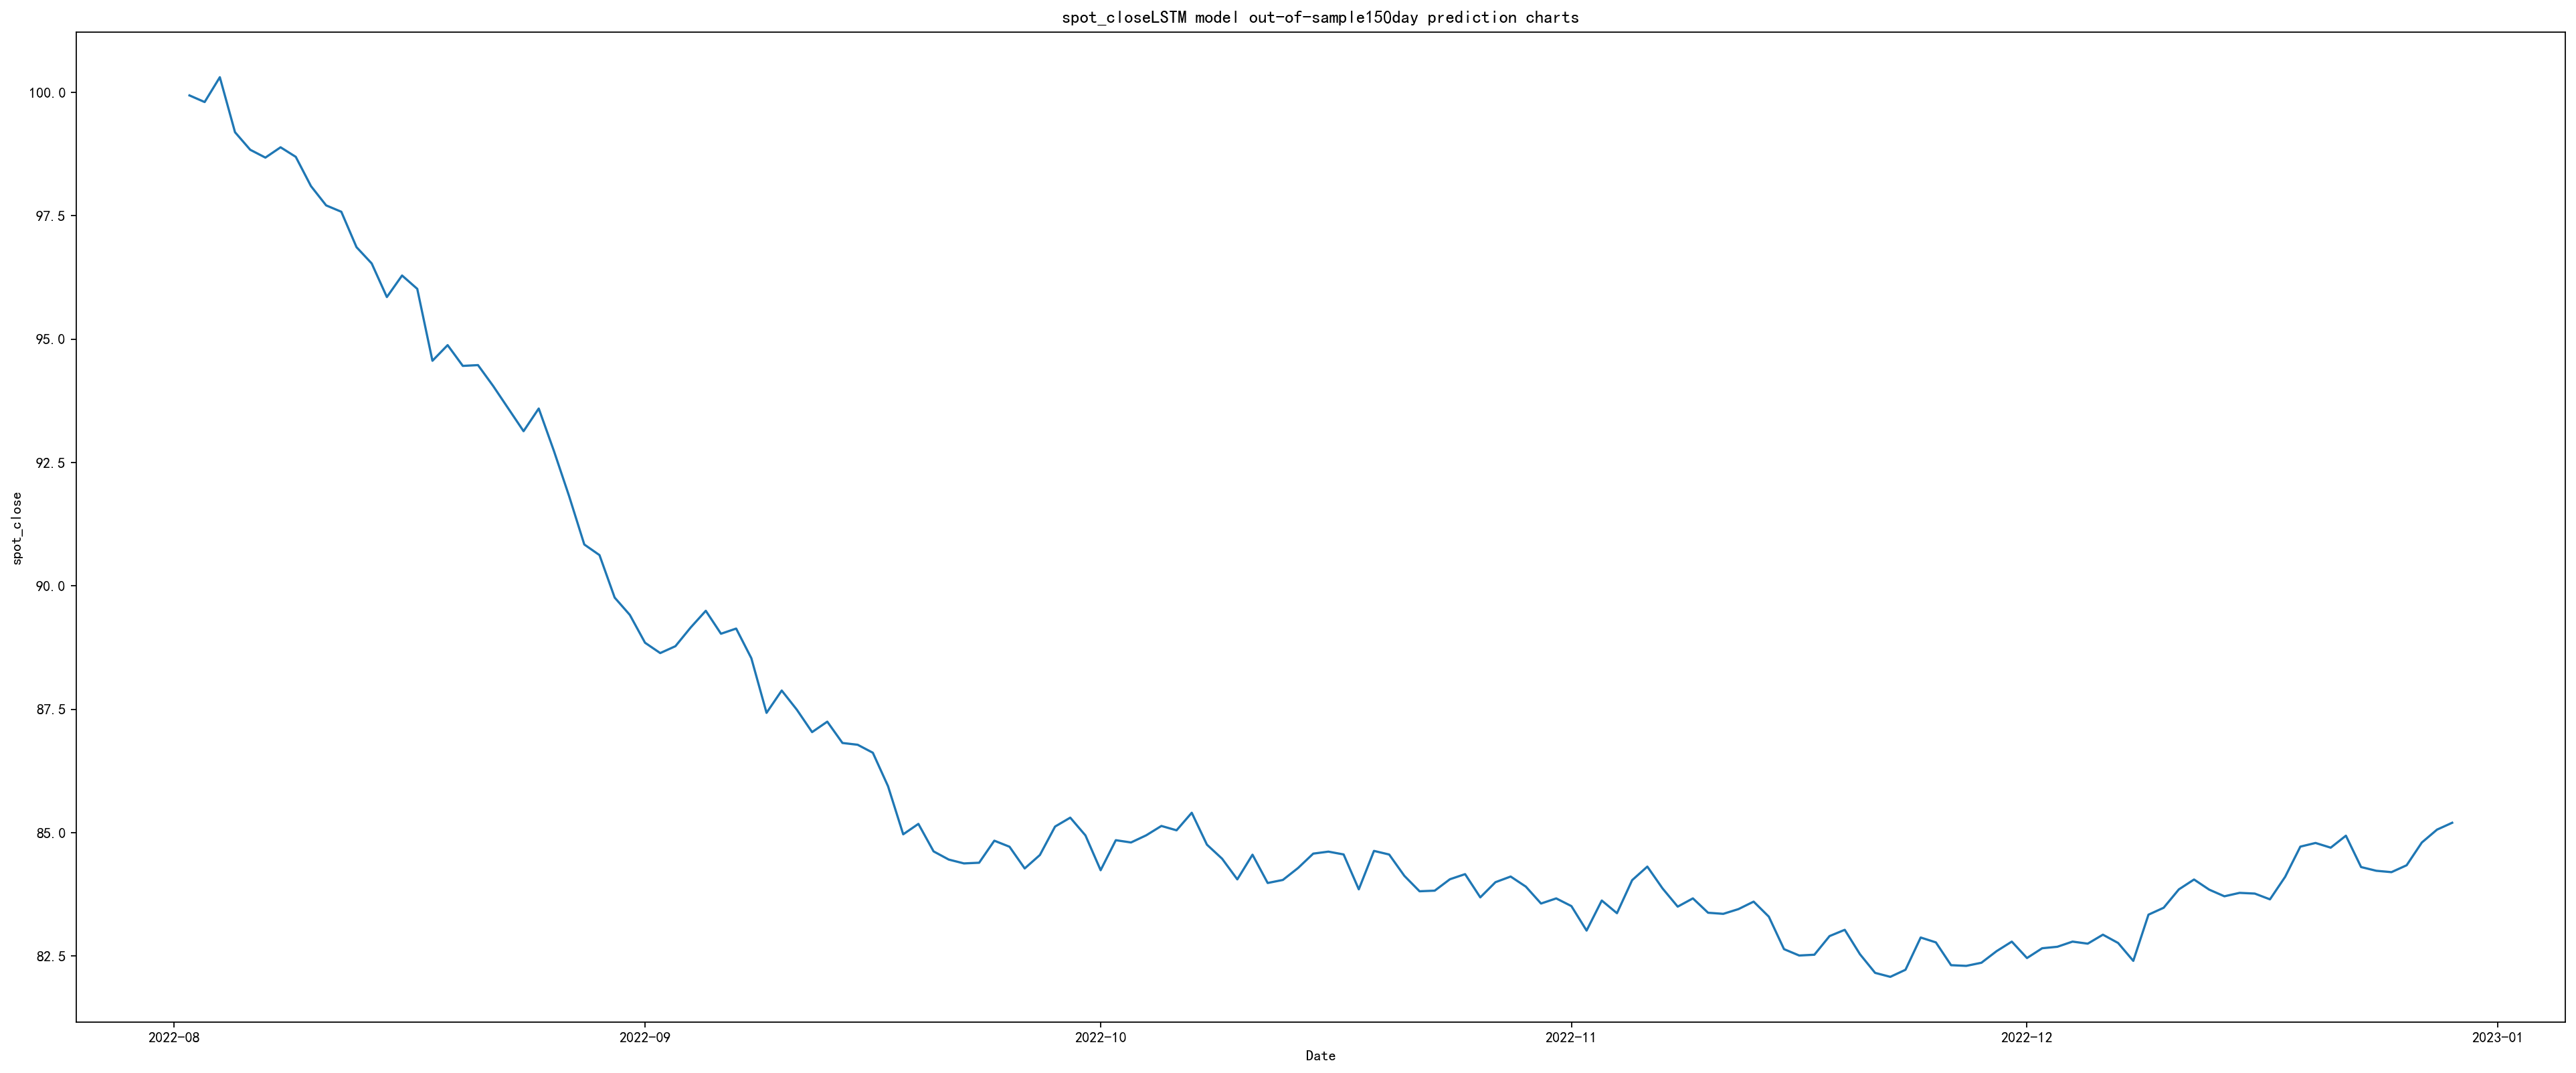

In [34]:
spot_loss, spot_train_fc, spot_val_fc, spot_future_fc = read_result('spot_close')
lstm_plot(spot_loss,spot_train_fc,spot_val_fc,spot_future_fc)

#### （2）Future Close Forecasting (The exact steps are the same as above and will not be described futher)

In [35]:
# Parameters Setting
train_val_data, training_size = trainvalsplit('2020-01-01')
input_step = 180
previous = input_step
layer_unit = 200
epochs = 30
batch_size = 64
learning_rate = 0.005

# LSTM Structure
model = keras.Sequential()
model.add(LSTM(layer_unit, return_sequences=True, input_shape=(1,input_step)))
model.add(Dropout(0.2))
model.add(LSTM(layer_unit, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(layer_unit))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr=learning_rate))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 200)            304800    
                                                                 
 dropout (Dropout)           (None, 1, 200)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 200)            320800    
                                                                 
 dropout_1 (Dropout)         (None, 1, 200)            0         
                                                                 
 lstm_5 (LSTM)               (None, 200)               320800    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 946601 (3.61 MB)
Trainable params: 94660

In [36]:
ft_loss, ft_train_fc, ft_val_fc, ft_future_fc = run_lstm('future_close')

Epoch 1/30
43/43 [==============================] - 11s 75ms/step - loss: 0.0430 - val_loss: 0.0100
Epoch 2/30
43/43 [==============================] - 1s 24ms/step - loss: 0.0070 - val_loss: 0.0117
Epoch 3/30
43/43 [==============================] - 1s 24ms/step - loss: 0.0049 - val_loss: 0.0077
Epoch 4/30
43/43 [==============================] - 1s 25ms/step - loss: 0.0042 - val_loss: 0.0061
Epoch 5/30
43/43 [==============================] - 1s 26ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 6/30
43/43 [==============================] - 1s 23ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 7/30
43/43 [==============================] - 1s 23ms/step - loss: 0.0032 - val_loss: 0.0064
Epoch 8/30
43/43 [==============================] - 1s 22ms/step - loss: 0.0032 - val_loss: 0.0049
Epoch 9/30
43/43 [==============================] - 1s 26ms/step - loss: 0.0030 - val_loss: 0.0054
Epoch 10/30
43/43 [==============================] - 1s 27ms/step - loss: 0.0030 - val_loss: 0.0049
Epoch 11

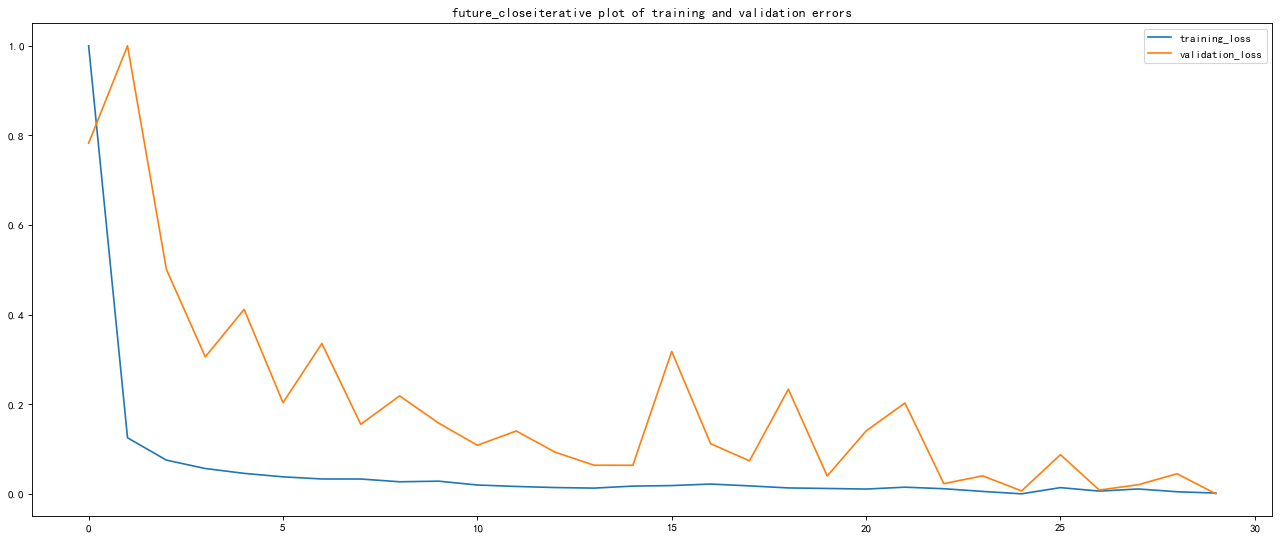

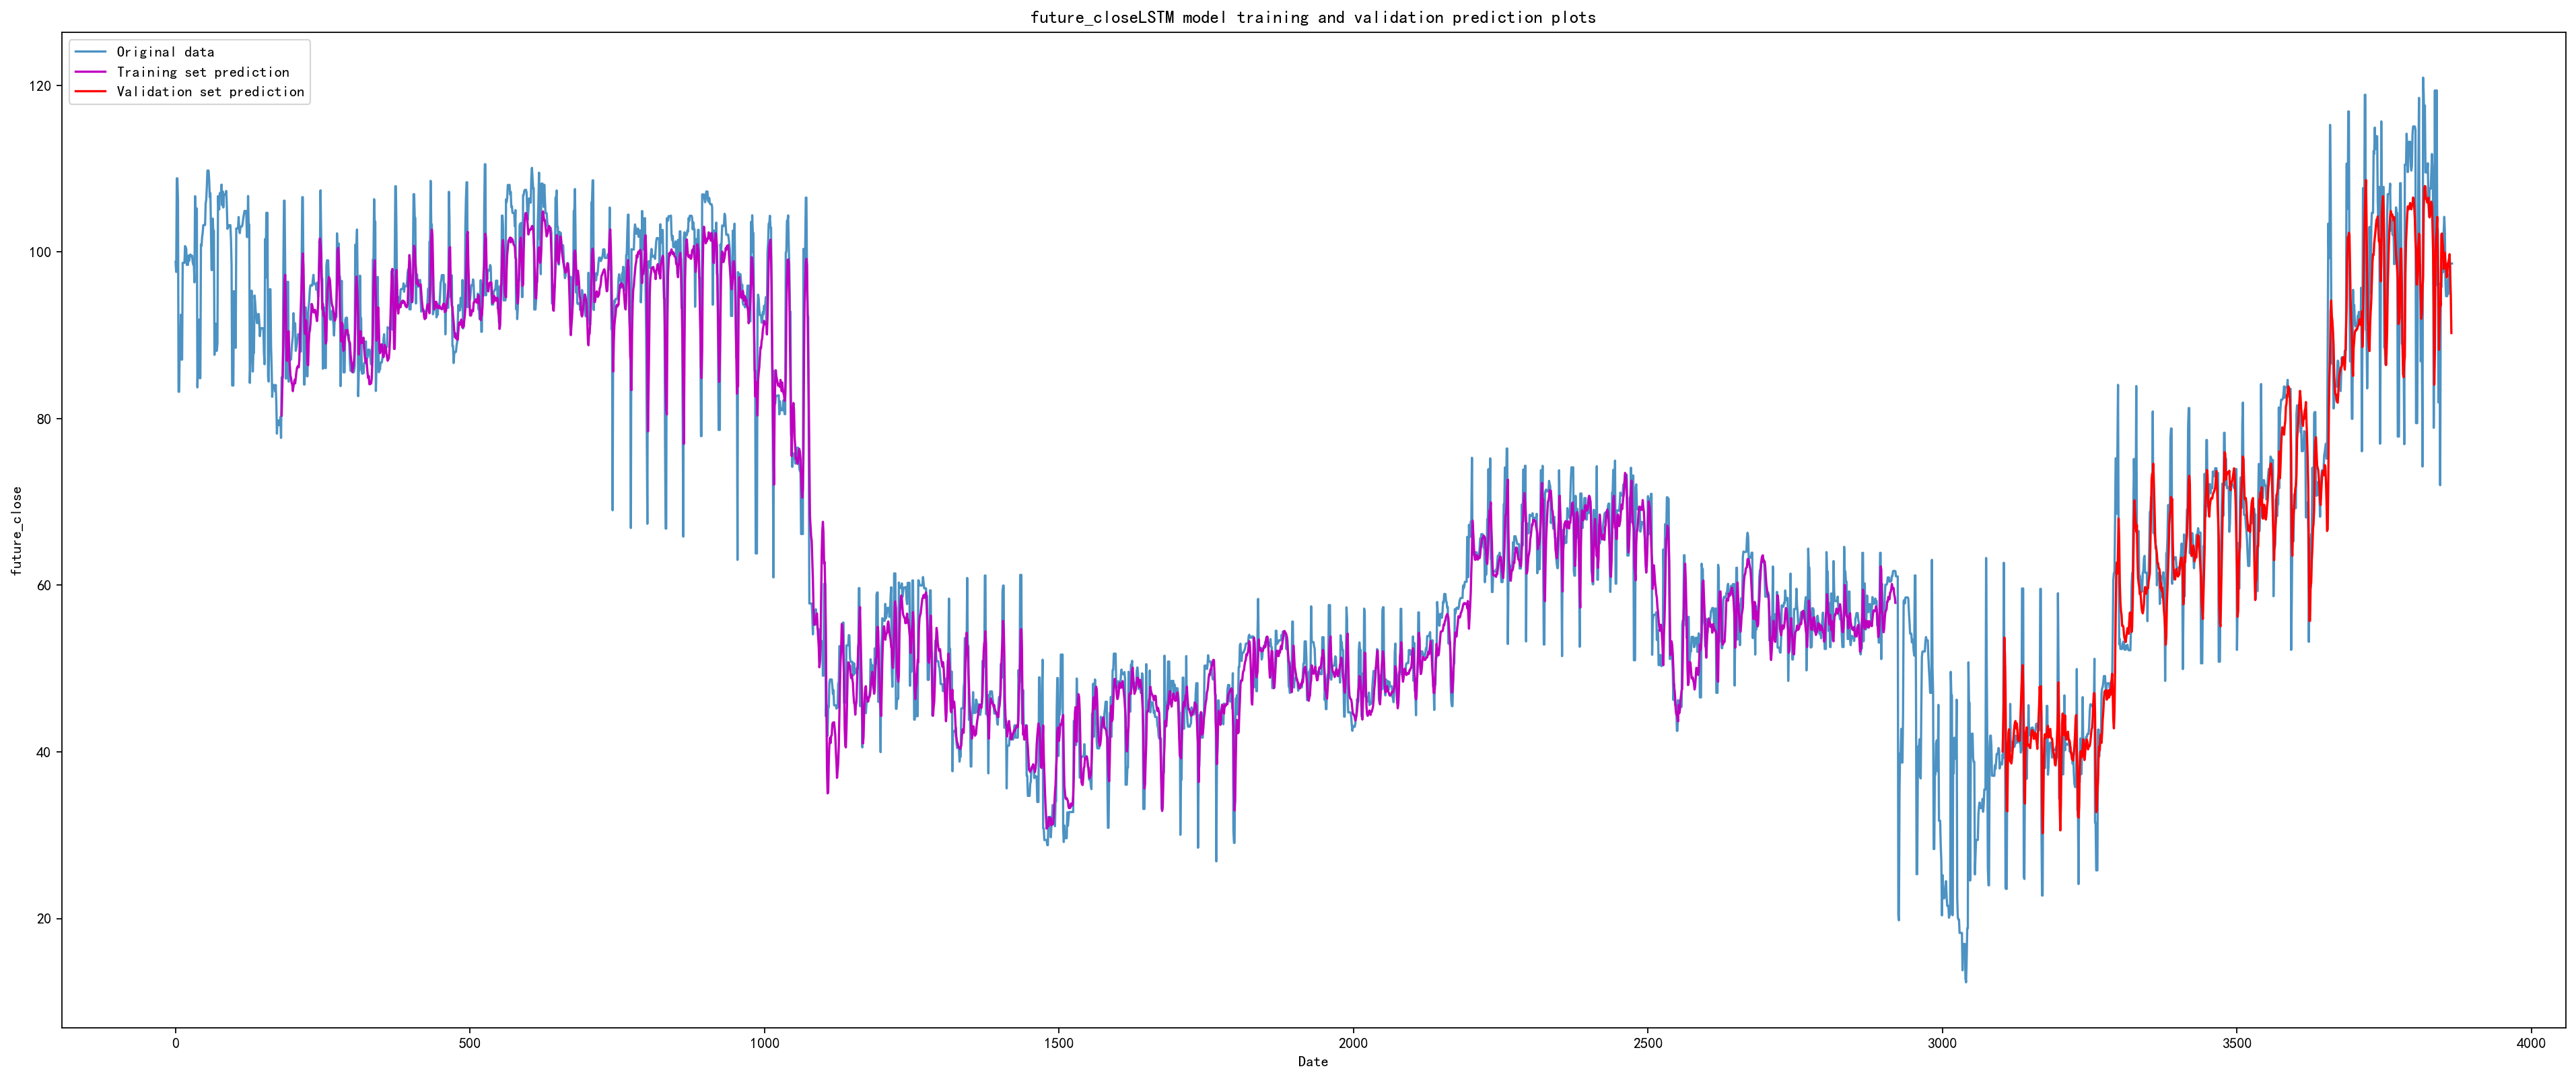

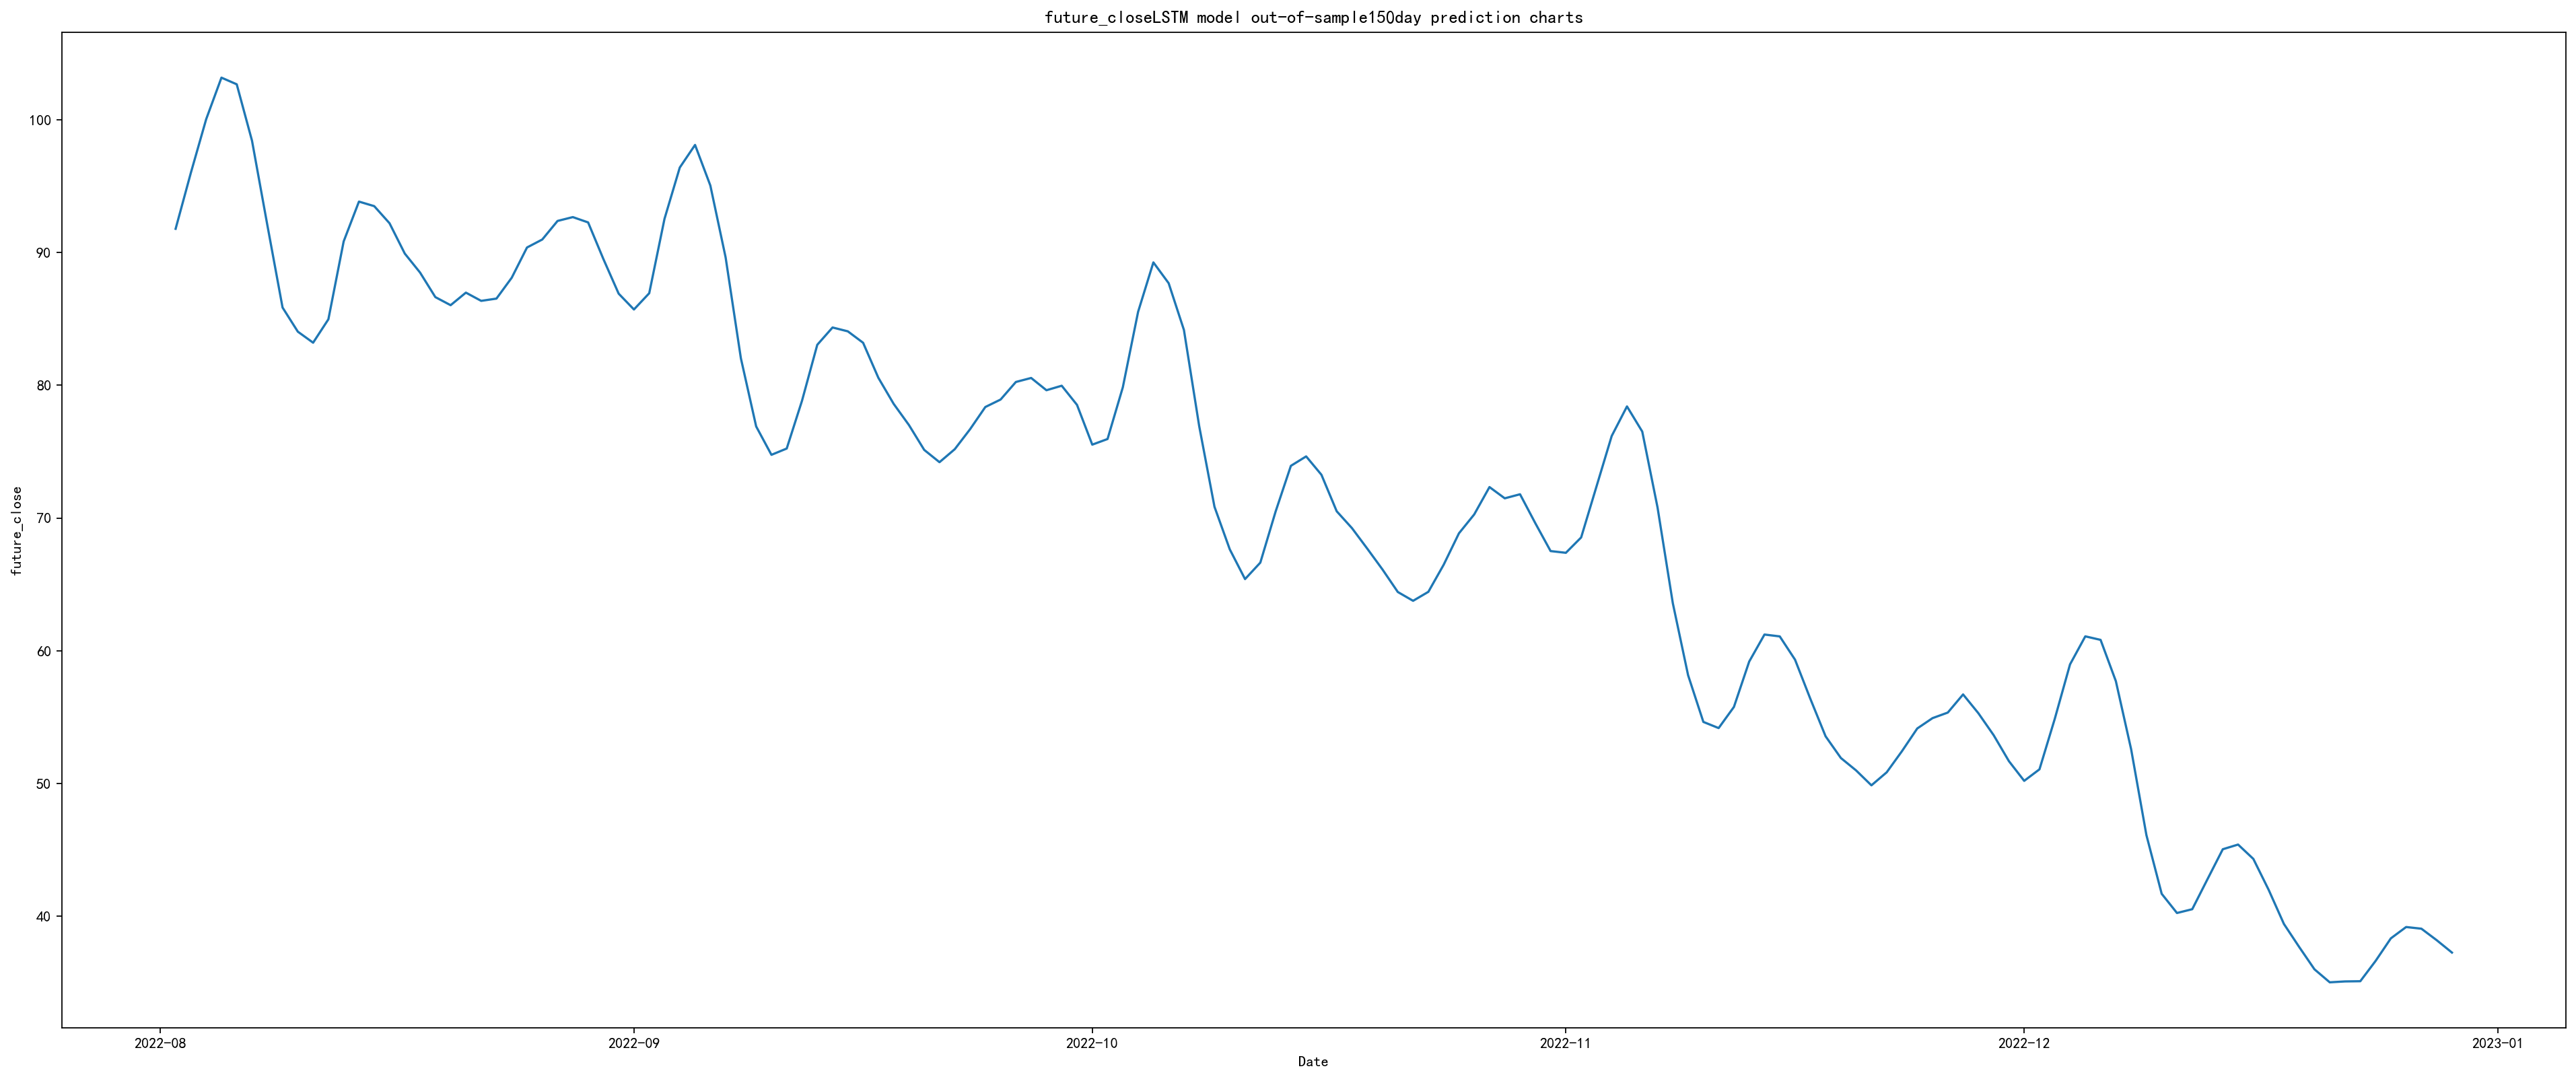

In [37]:
lstm_plot(ft_loss,ft_train_fc,ft_val_fc,ft_future_fc)

In [38]:
# save_result(ft_loss, ft_train_fc, ft_val_fc, ft_future_fc)

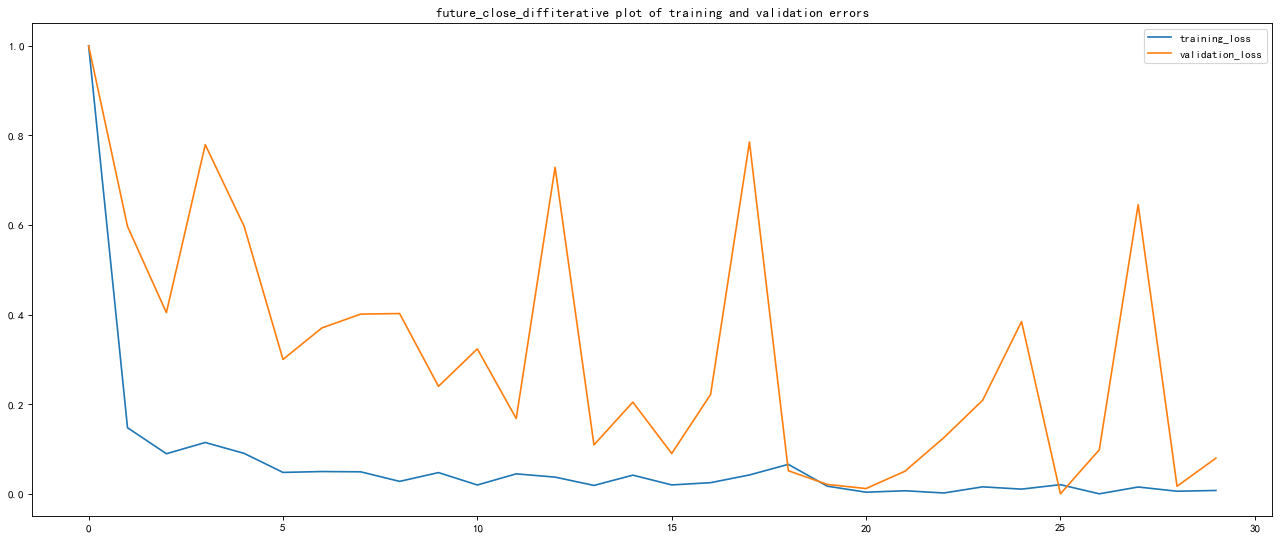

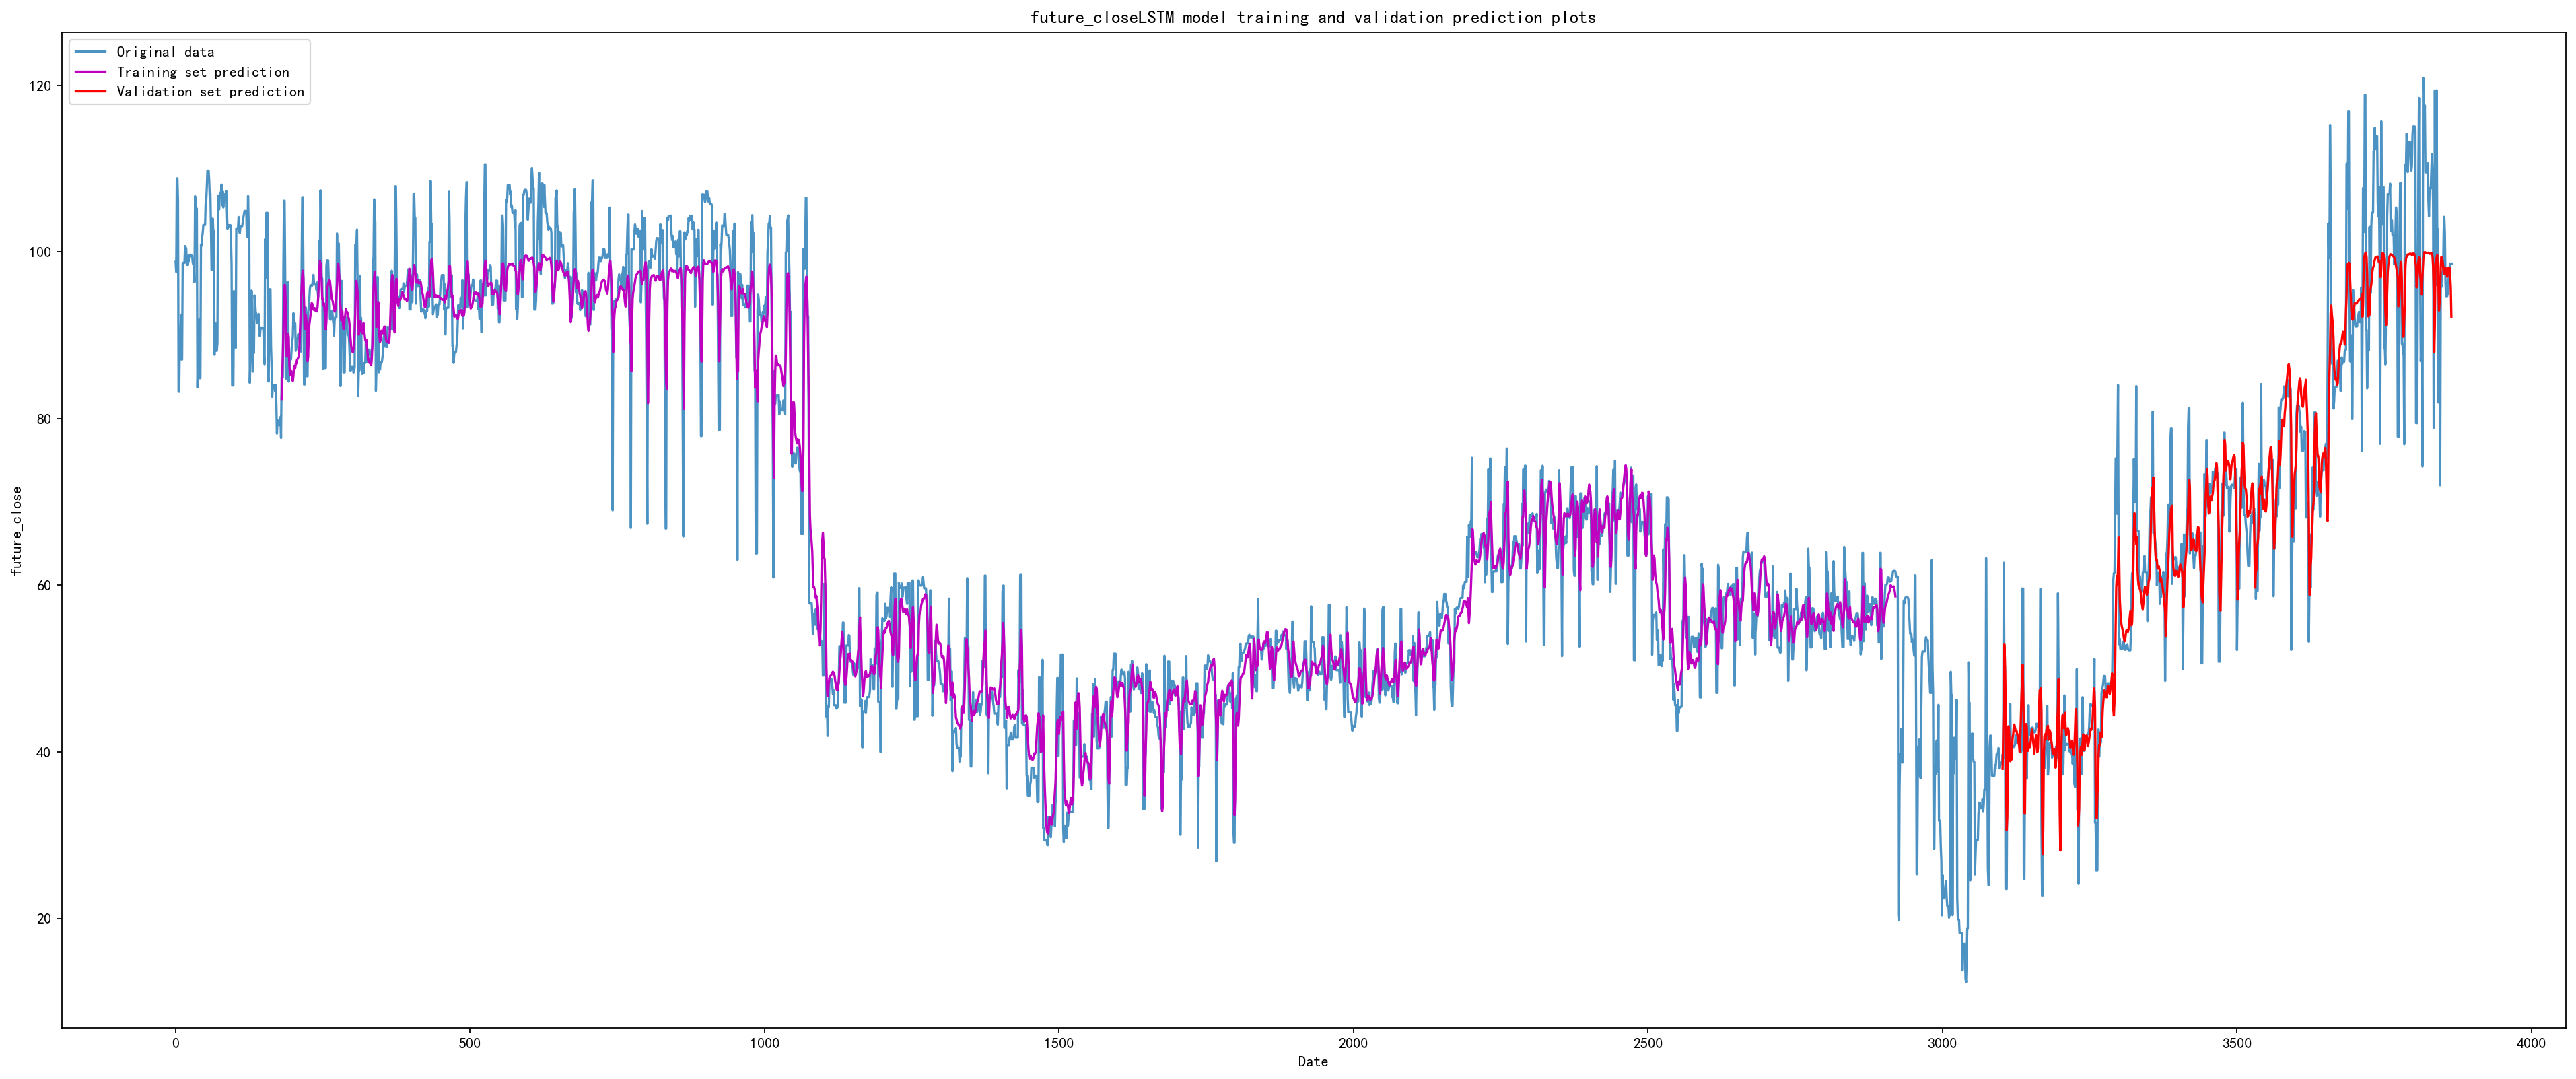

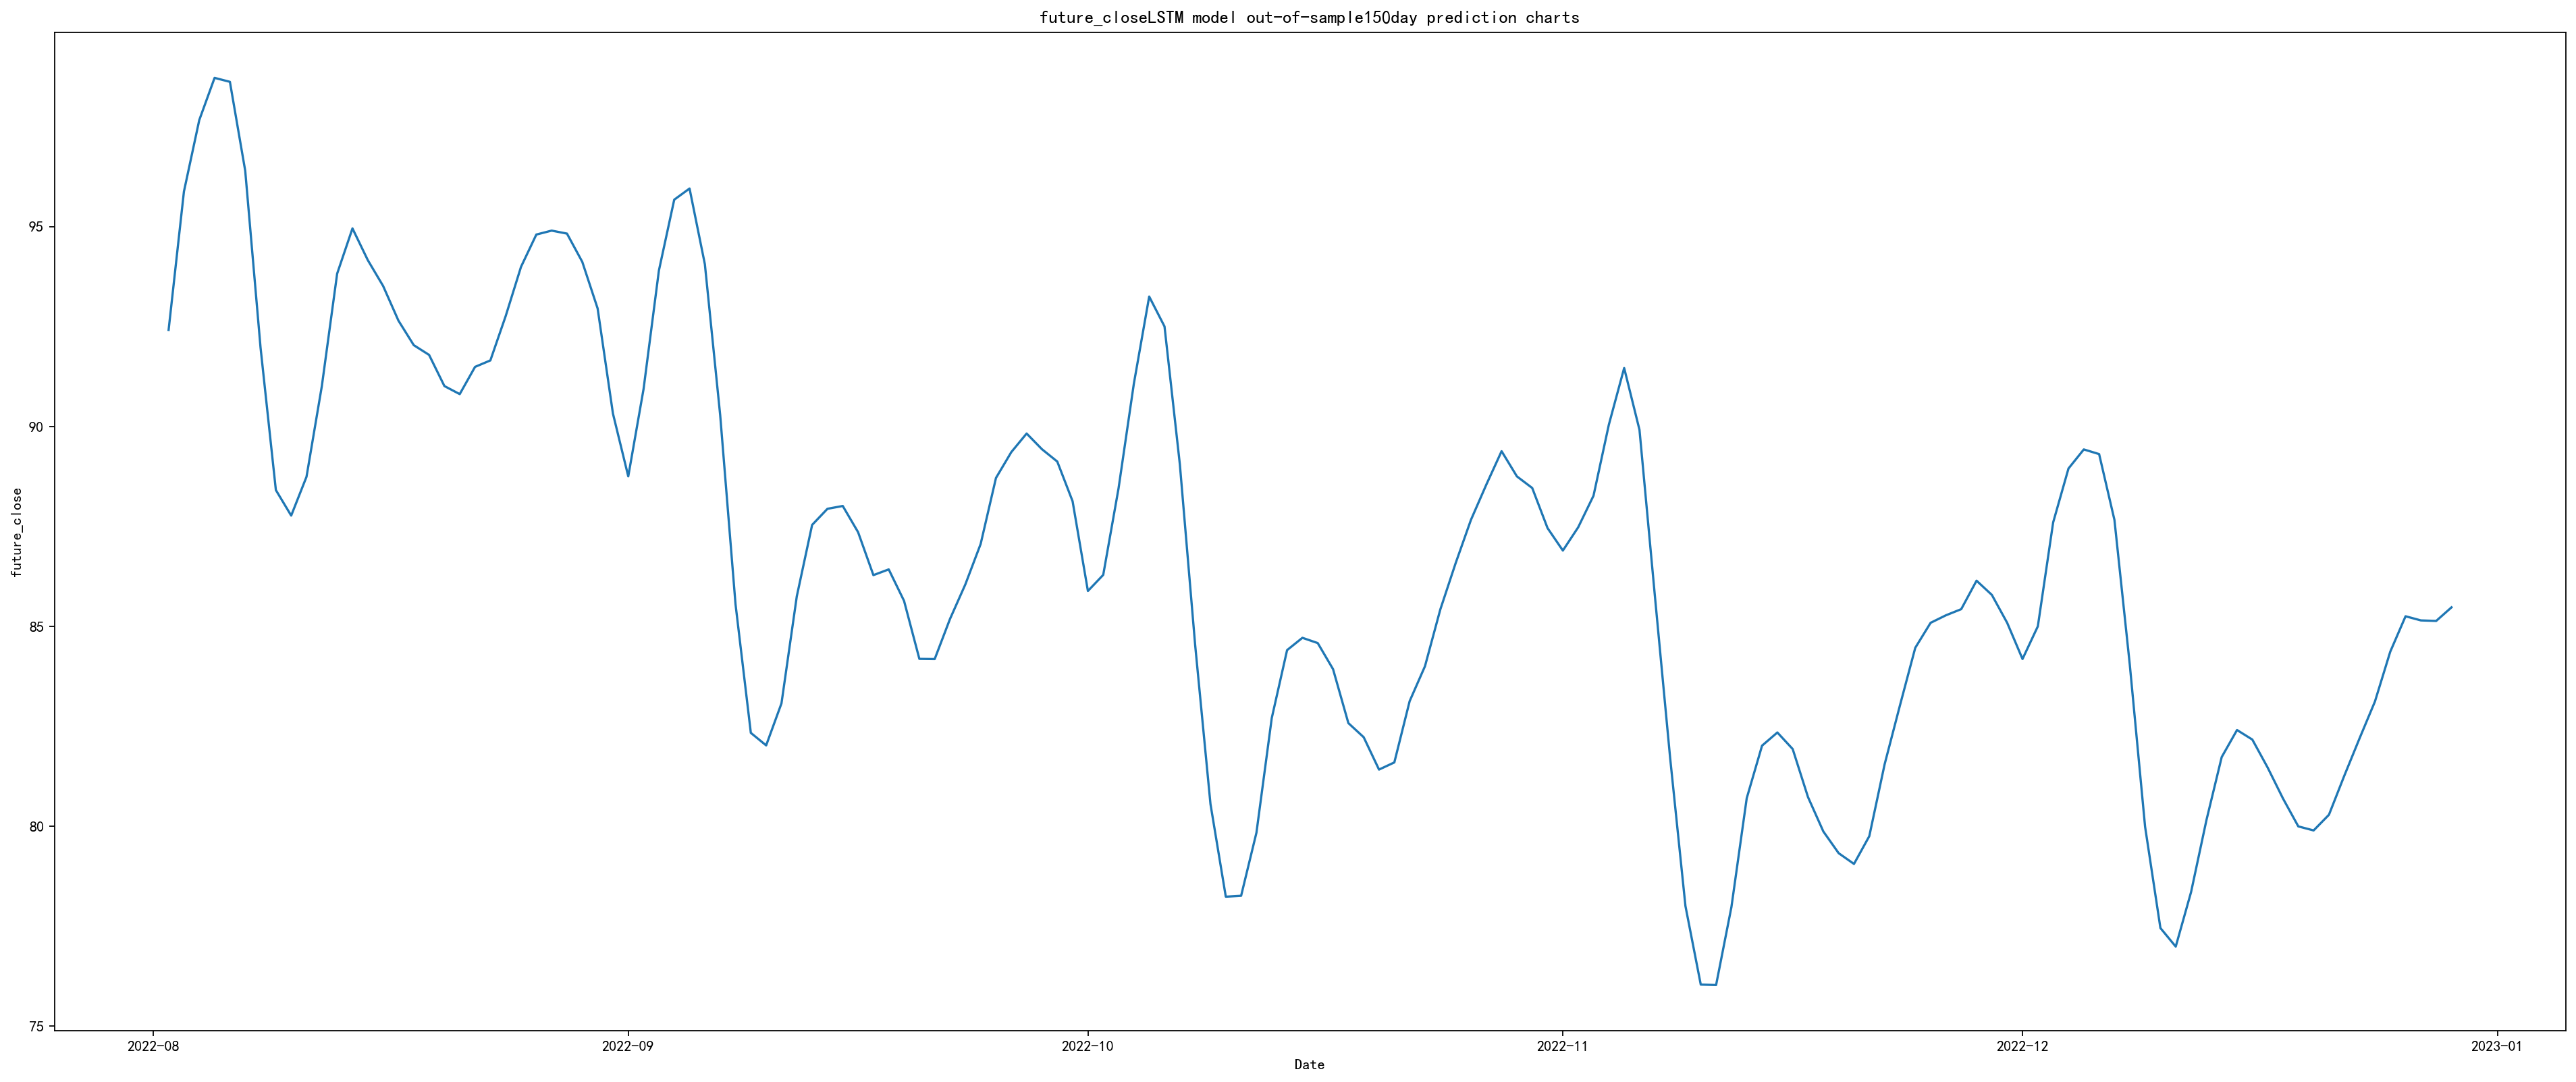

In [39]:
ft_loss, ft_train_fc, ft_val_fc, ft_future_fc = read_result('future_close')
lstm_plot(ft_loss,ft_train_fc,ft_val_fc,ft_future_fc)

#### （3）Usdx Close Forecasting

In [40]:
# Parameters Setting
train_val_data, training_size = trainvalsplit('2018-07-01')
input_step = 210
previous = input_step
layer_unit = 300
epochs = 30
batch_size = 64
learning_rate = 0.005

# LSTM Structure
model = keras.Sequential()
model.add(LSTM(layer_unit, return_sequences=True, input_shape=(1,input_step)))
model.add(Dropout(0.1))
model.add(LSTM(layer_unit, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(layer_unit))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr=learning_rate))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 300)            613200    
                                                                 
 dropout_2 (Dropout)         (None, 1, 300)            0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 300)            721200    
                                                                 
 dropout_3 (Dropout)         (None, 1, 300)            0         
                                                                 
 lstm_8 (LSTM)               (None, 300)               721200    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 2055901 (7.84 MB)
Trainable params: 2055

In [41]:
usdx_loss, usdx_train_fc, usdx_val_fc, usdx_future_fc = run_lstm('usdx_close')

Epoch 1/30
34/34 [==============================] - 13s 114ms/step - loss: 0.0340 - val_loss: 0.0080
Epoch 2/30
34/34 [==============================] - 2s 58ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 3/30
34/34 [==============================] - 2s 56ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 4/30
34/34 [==============================] - 2s 56ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 5/30
34/34 [==============================] - 2s 63ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 6/30
34/34 [==============================] - 2s 55ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/30
34/34 [==============================] - 2s 60ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/30
34/34 [==============================] - 2s 57ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/30
34/34 [==============================] - 2s 60ms/step - loss: 9.9906e-04 - val_loss: 0.0011
Epoch 10/30
34/34 [==============================] - 2s 59ms/step - loss: 8.6200e-04 - val_loss: 7.8633

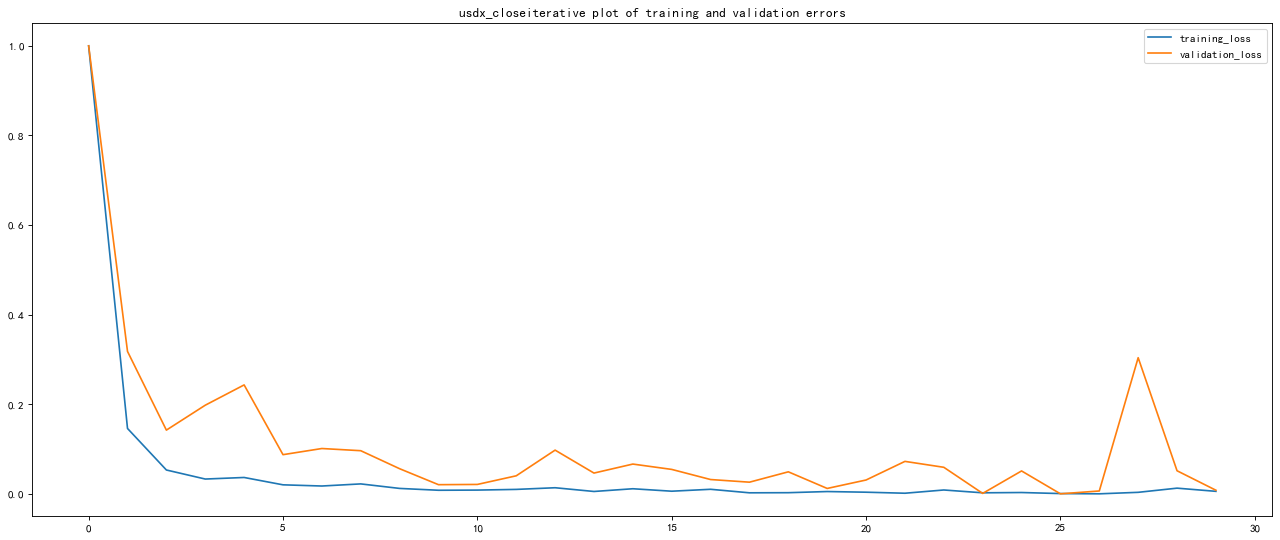

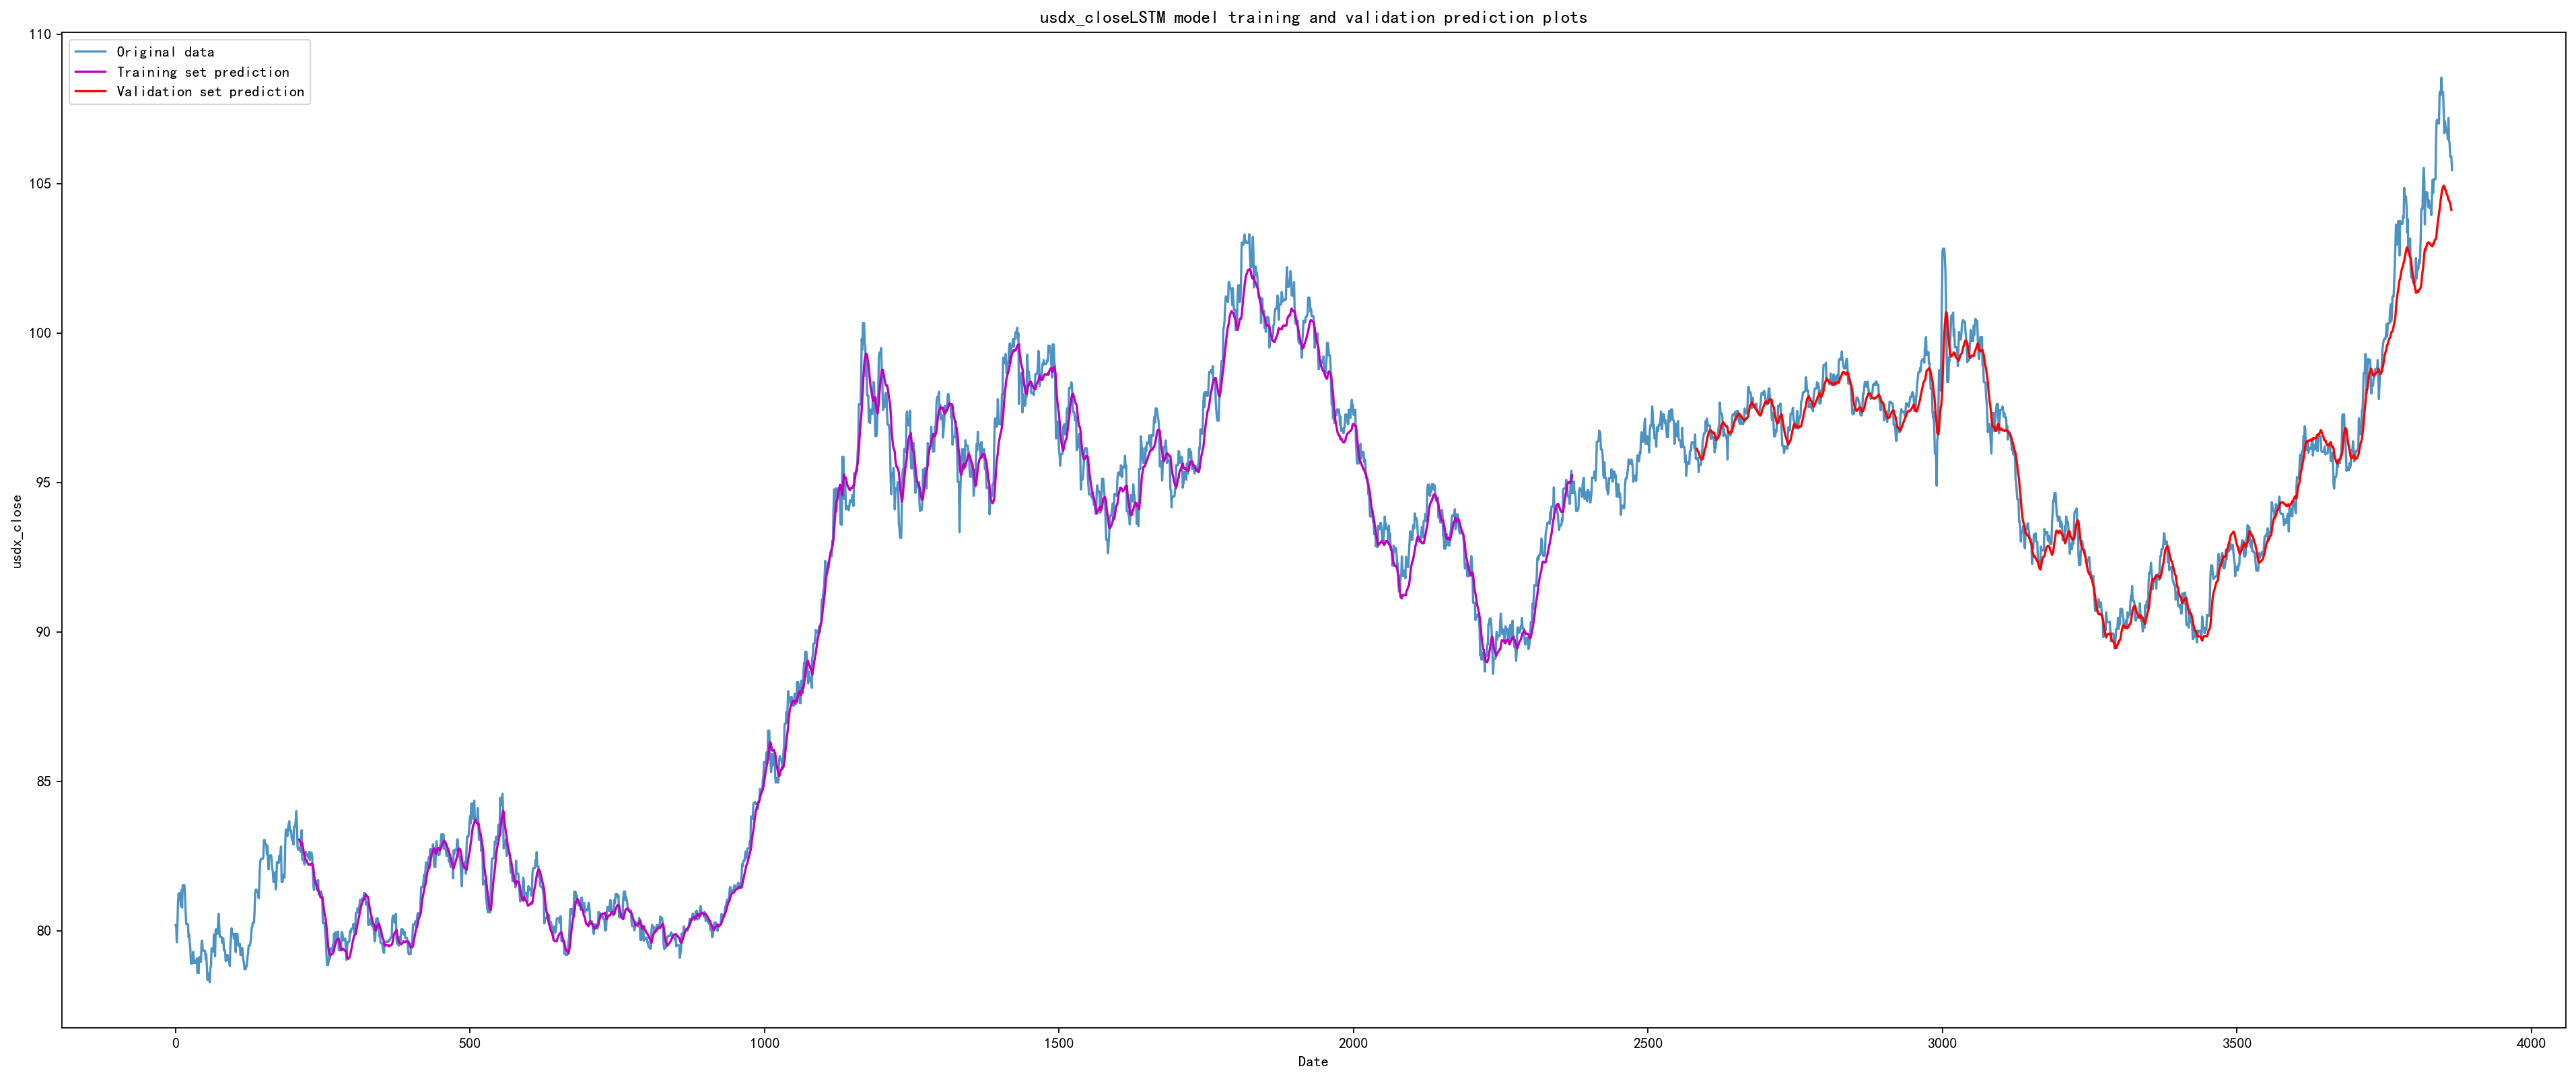

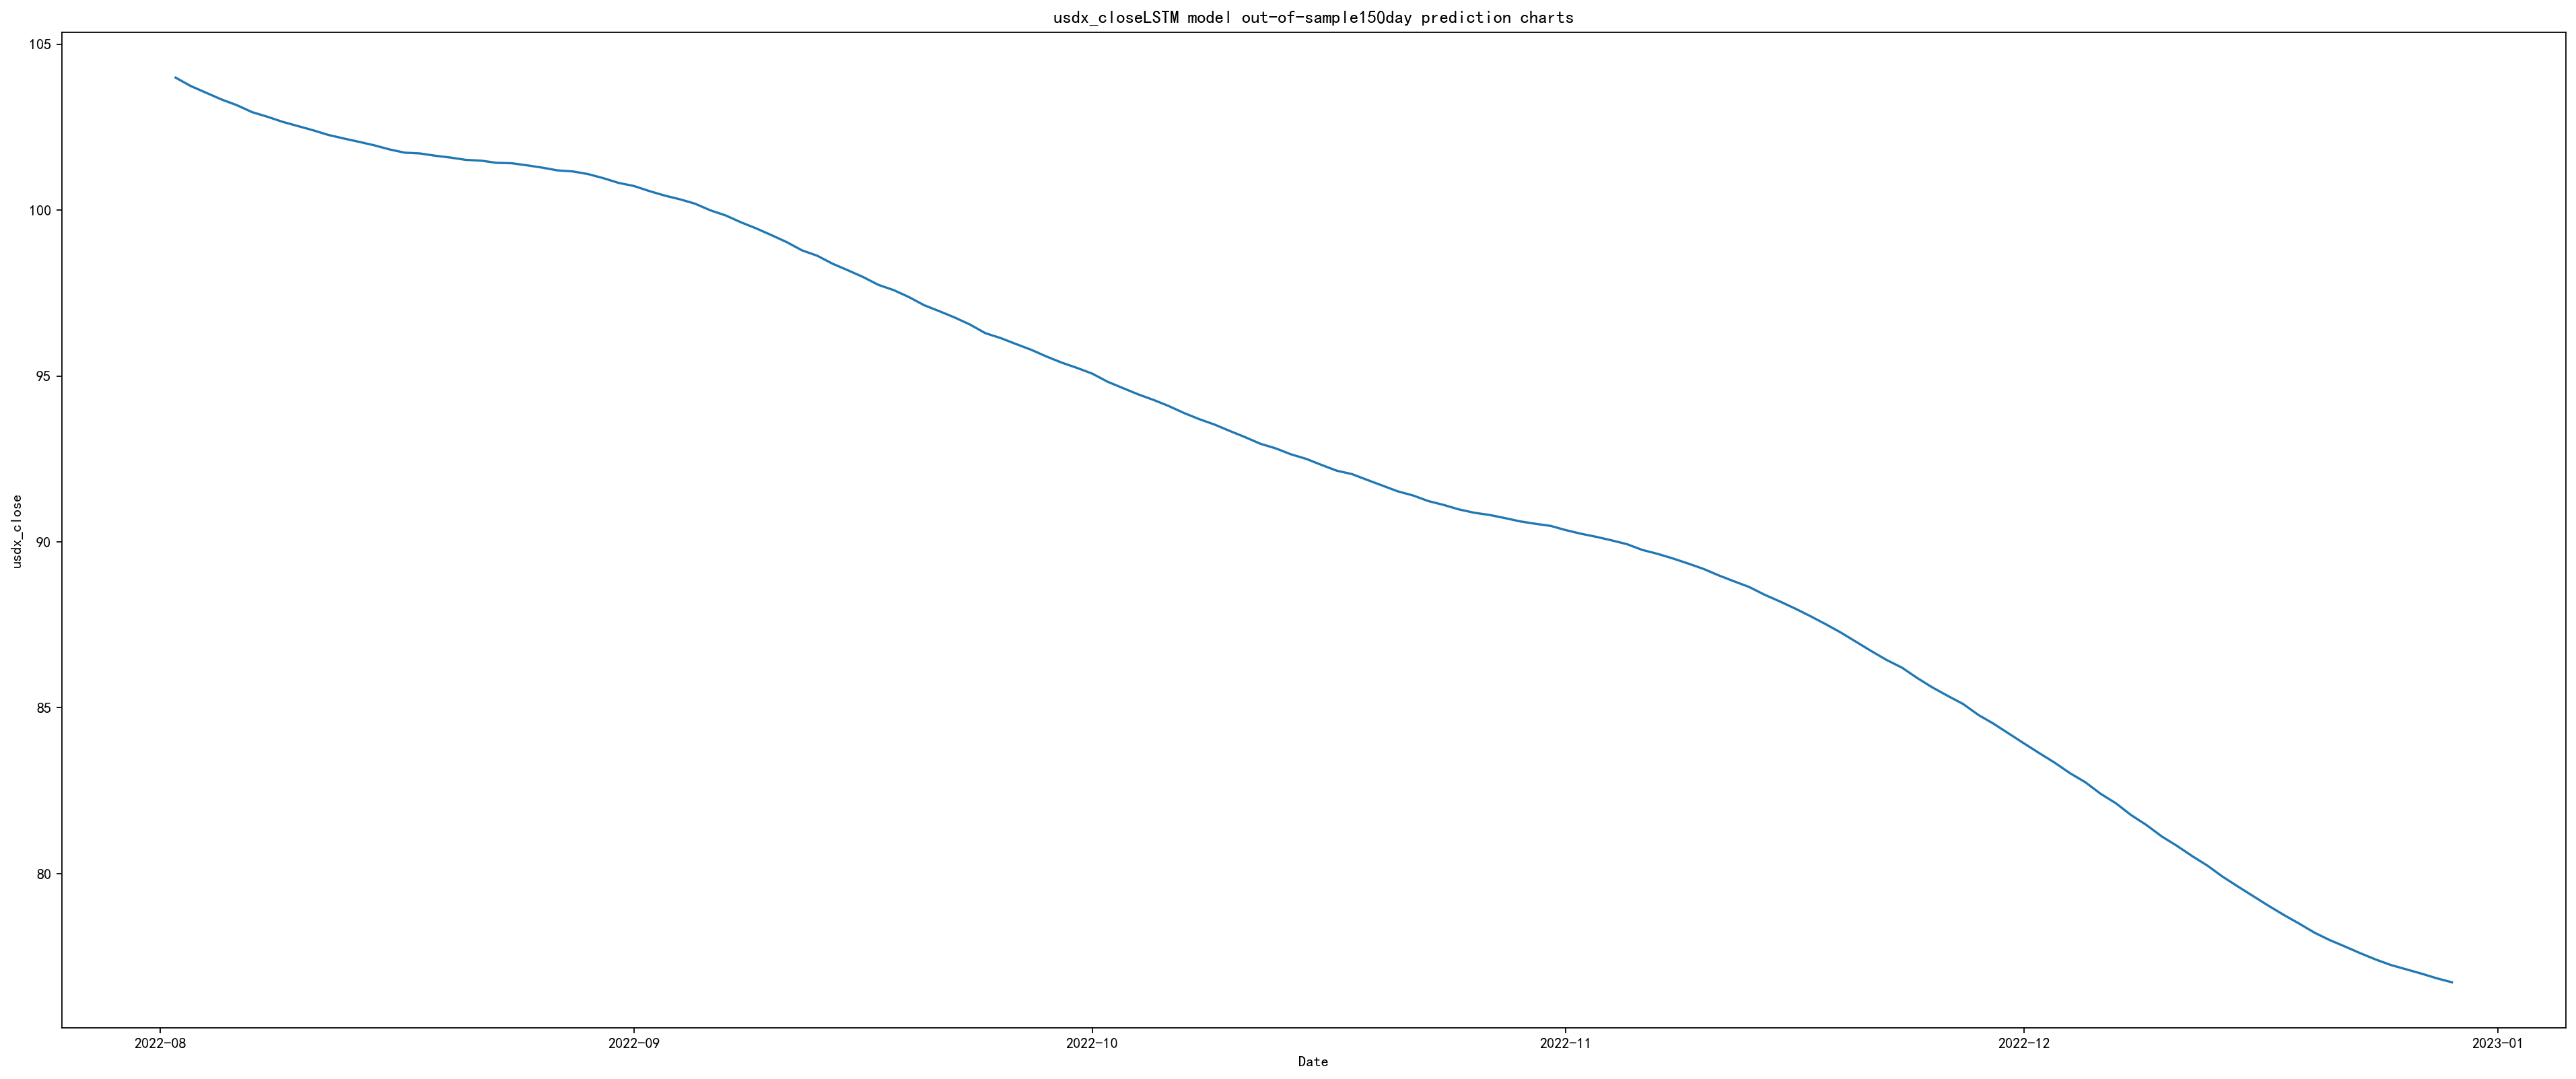

In [42]:
lstm_plot(usdx_loss,usdx_train_fc,usdx_val_fc,usdx_future_fc)

In [43]:
# save_result(usdx_loss, usdx_train_fc, usdx_val_fc, usdx_future_fc)

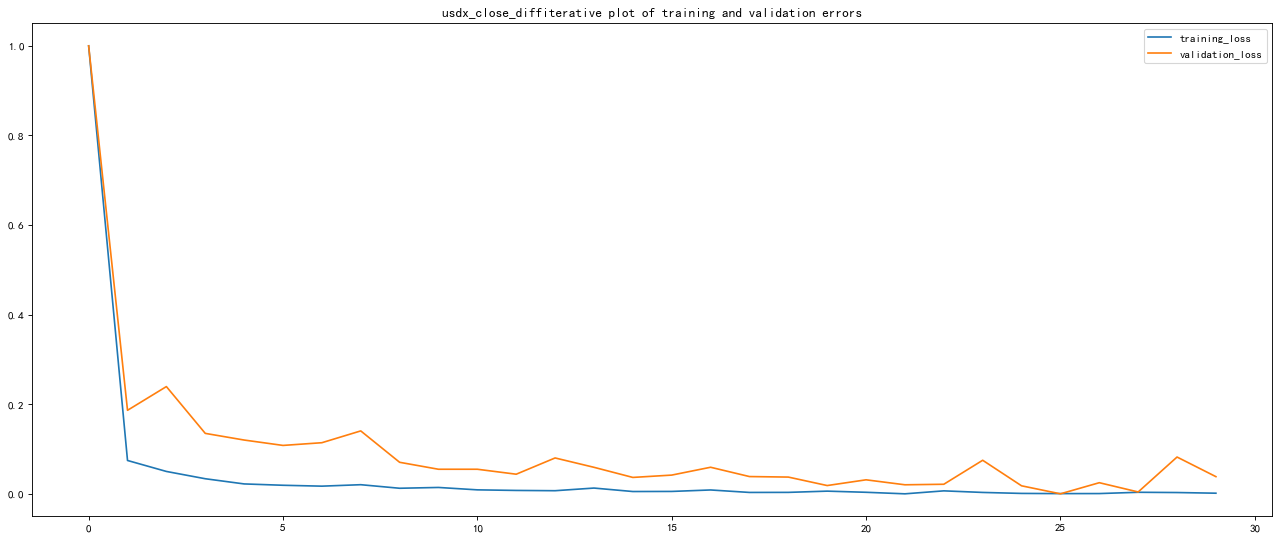

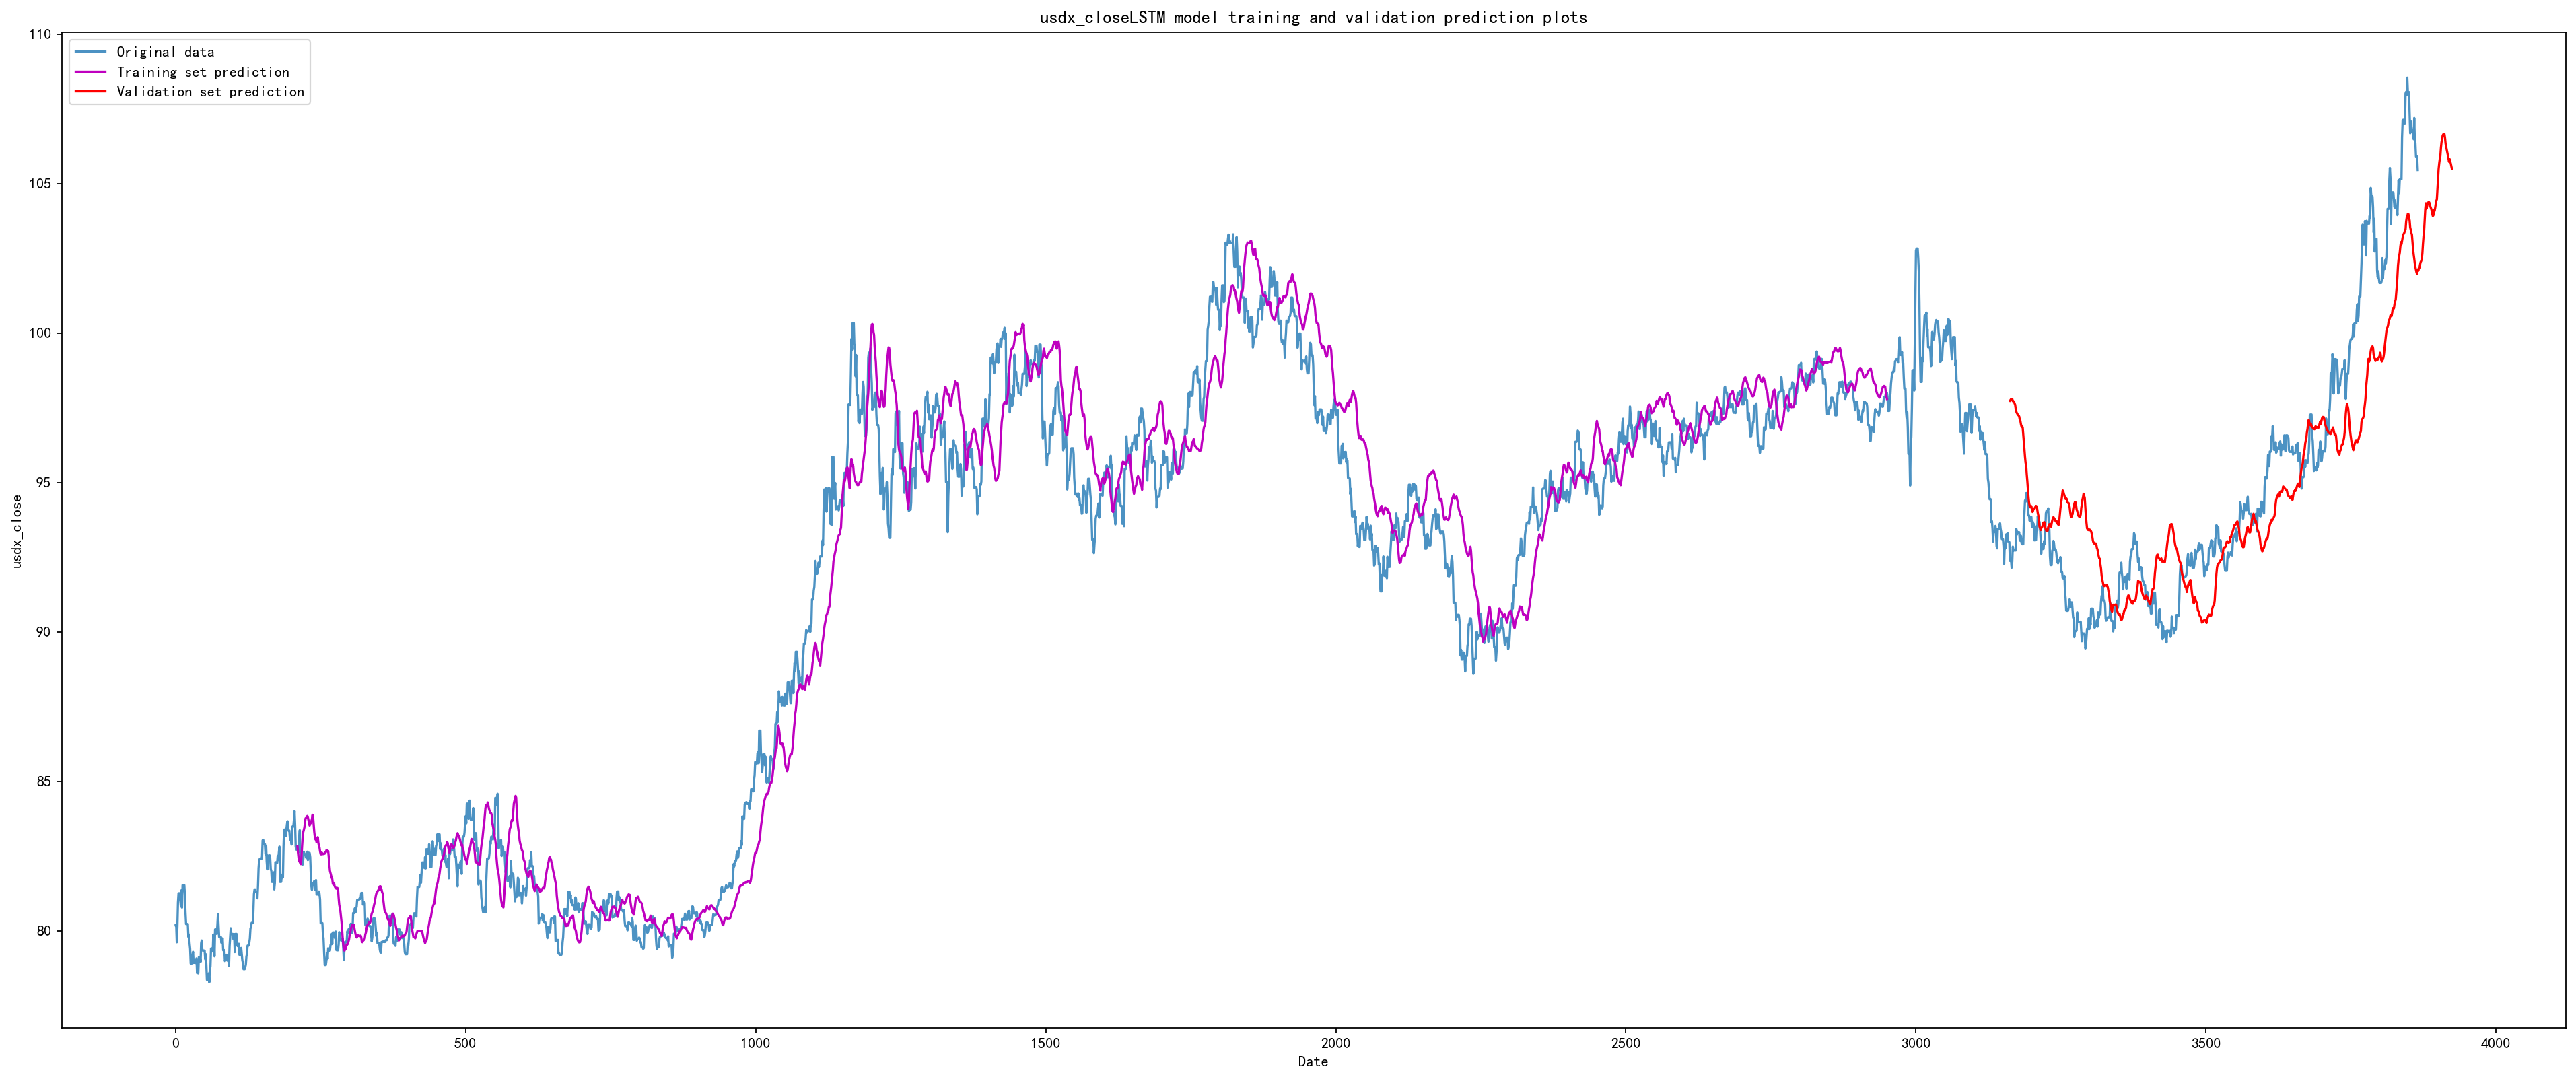

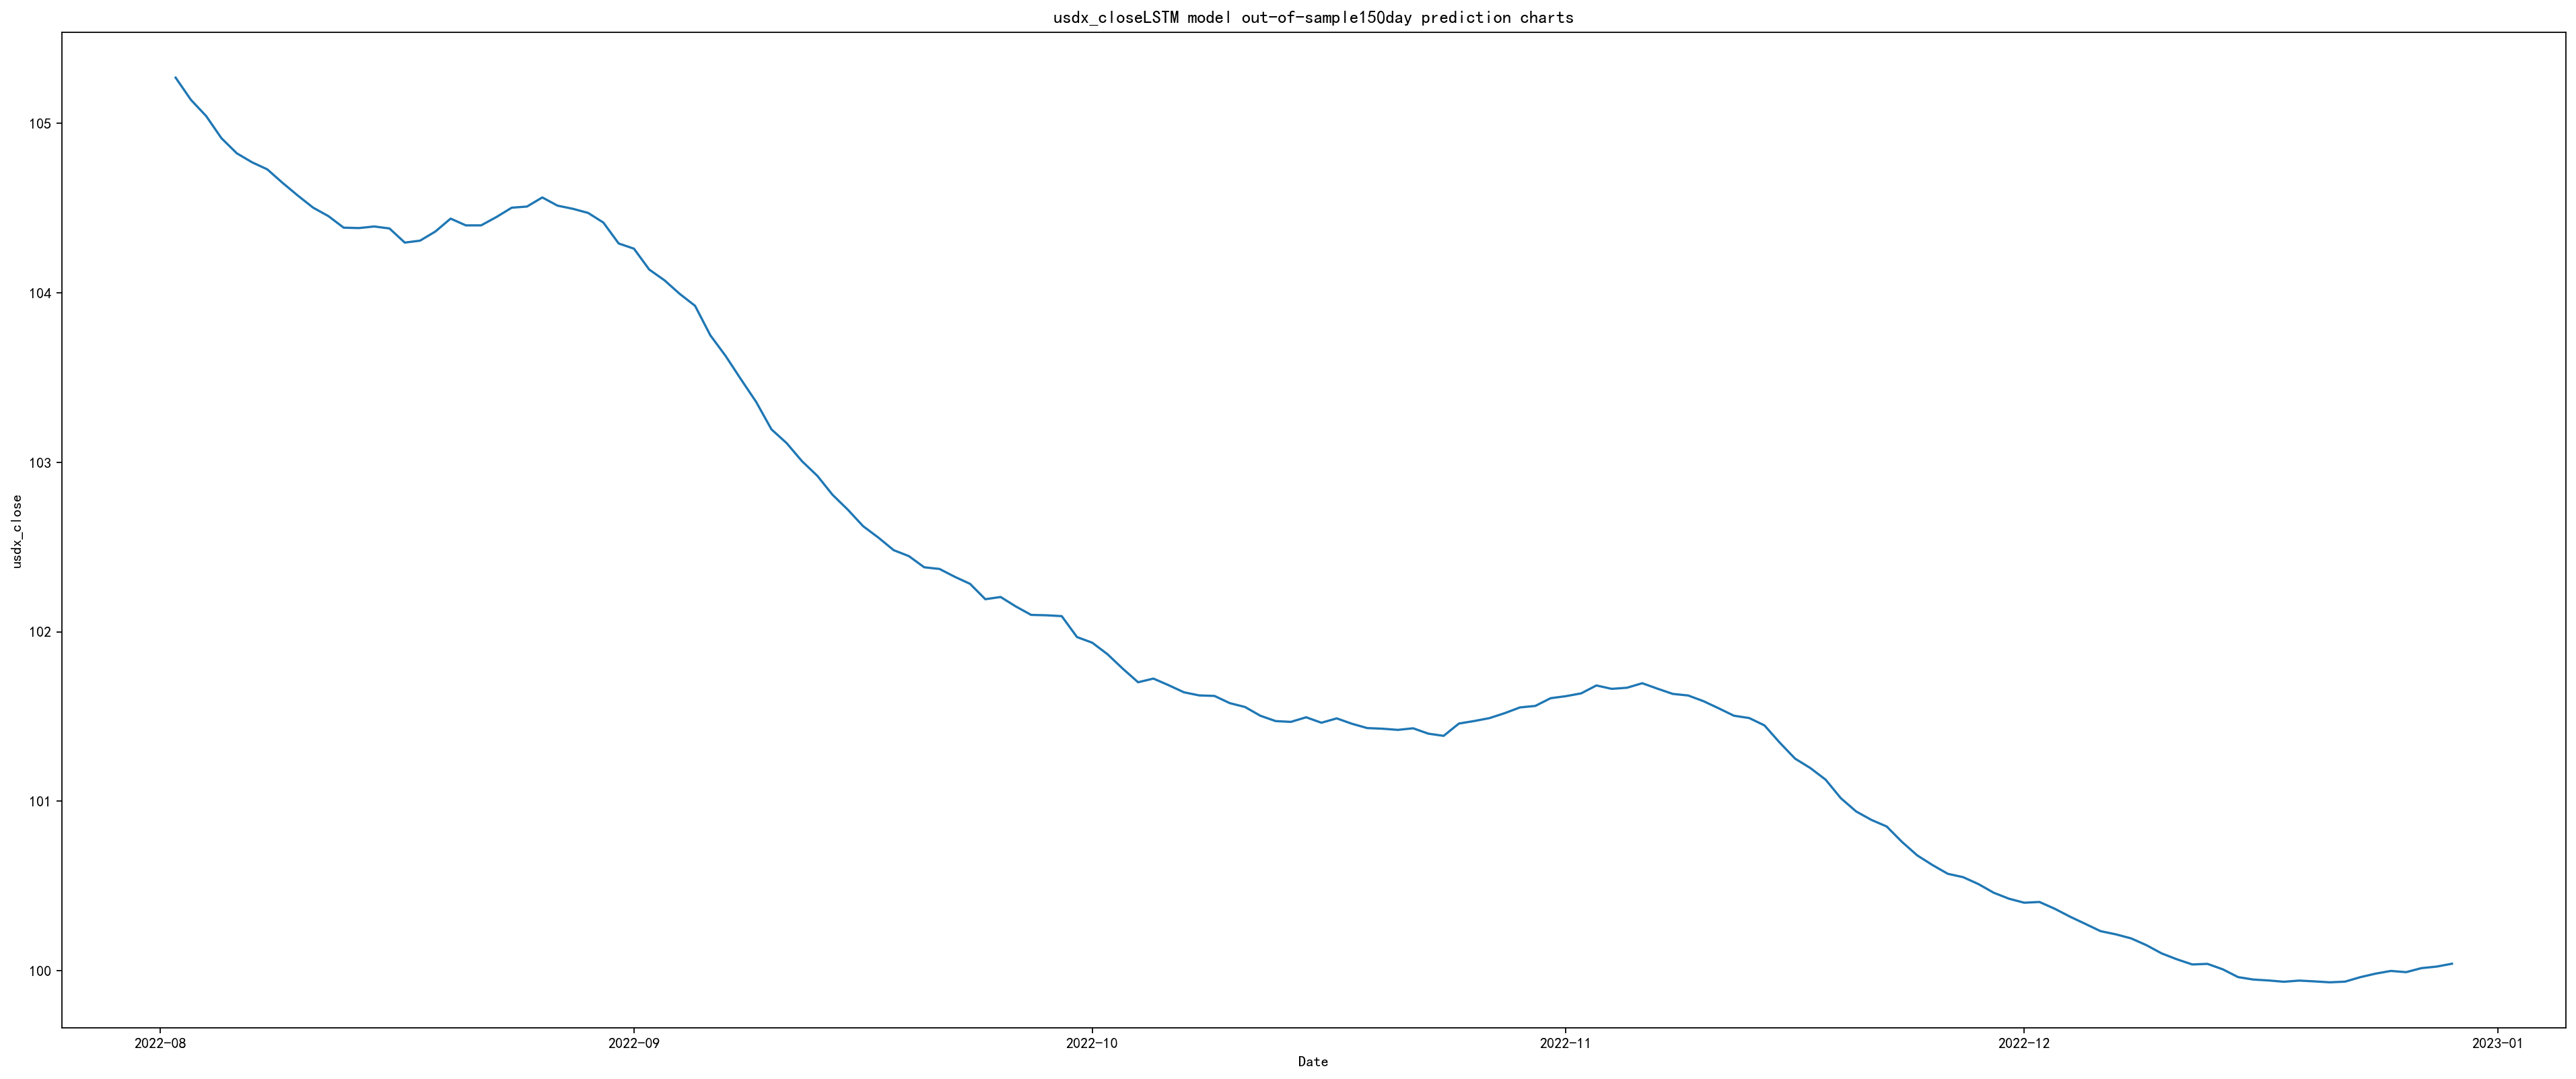

In [44]:
usdx_loss, usdx_train_fc, usdx_val_fc, usdx_future_fc = read_result('usdx_close')
lstm_plot(usdx_loss,usdx_train_fc,usdx_val_fc,usdx_future_fc)

#### （4）Vix Close Forecasting

In [45]:
# Parameters Setting
train_val_data, training_size = trainvalsplit('2019-07-01')
input_step = 180
previous = input_step
layer_unit = 250
epochs = 30
batch_size = 64
learning_rate = 0.01

# LSTM Structure
model = keras.Sequential()
model.add(LSTM(layer_unit, return_sequences=True, input_shape=(1,input_step)))
model.add(Dropout(0.2))
model.add(LSTM(layer_unit, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(layer_unit))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr=learning_rate))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 250)            431000    
                                                                 
 dropout_4 (Dropout)         (None, 1, 250)            0         
                                                                 
 lstm_10 (LSTM)              (None, 1, 250)            501000    
                                                                 
 dropout_5 (Dropout)         (None, 1, 250)            0         
                                                                 
 lstm_11 (LSTM)              (None, 250)               501000    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 1433251 (5.47 MB)
Trainable params: 1433

In [46]:
vix_loss, vix_train_fc, vix_val_fc, vix_future_fc = run_lstm('vix_close')

Epoch 1/30
40/40 [==============================] - 13s 91ms/step - loss: 0.0028 - val_loss: 0.0121
Epoch 2/30
40/40 [==============================] - 2s 43ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 3/30
40/40 [==============================] - 2s 39ms/step - loss: 6.8850e-04 - val_loss: 0.0020
Epoch 4/30
40/40 [==============================] - 2s 43ms/step - loss: 5.2102e-04 - val_loss: 0.0017
Epoch 5/30
40/40 [==============================] - 2s 40ms/step - loss: 4.8000e-04 - val_loss: 0.0016
Epoch 6/30
40/40 [==============================] - 2s 43ms/step - loss: 4.4259e-04 - val_loss: 0.0022
Epoch 7/30
40/40 [==============================] - 2s 43ms/step - loss: 4.5288e-04 - val_loss: 0.0020
Epoch 8/30
40/40 [==============================] - 2s 41ms/step - loss: 3.9443e-04 - val_loss: 0.0017
Epoch 9/30
40/40 [==============================] - 2s 41ms/step - loss: 3.7018e-04 - val_loss: 0.0015
Epoch 10/30
40/40 [==============================] - 2s 40ms/step - loss: 3.6396

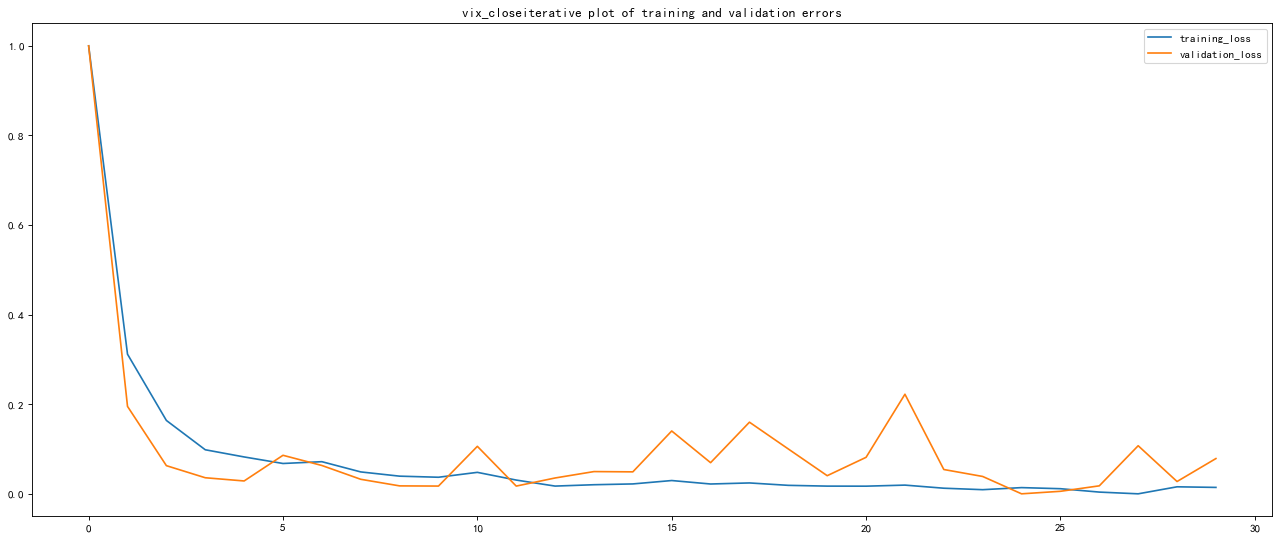

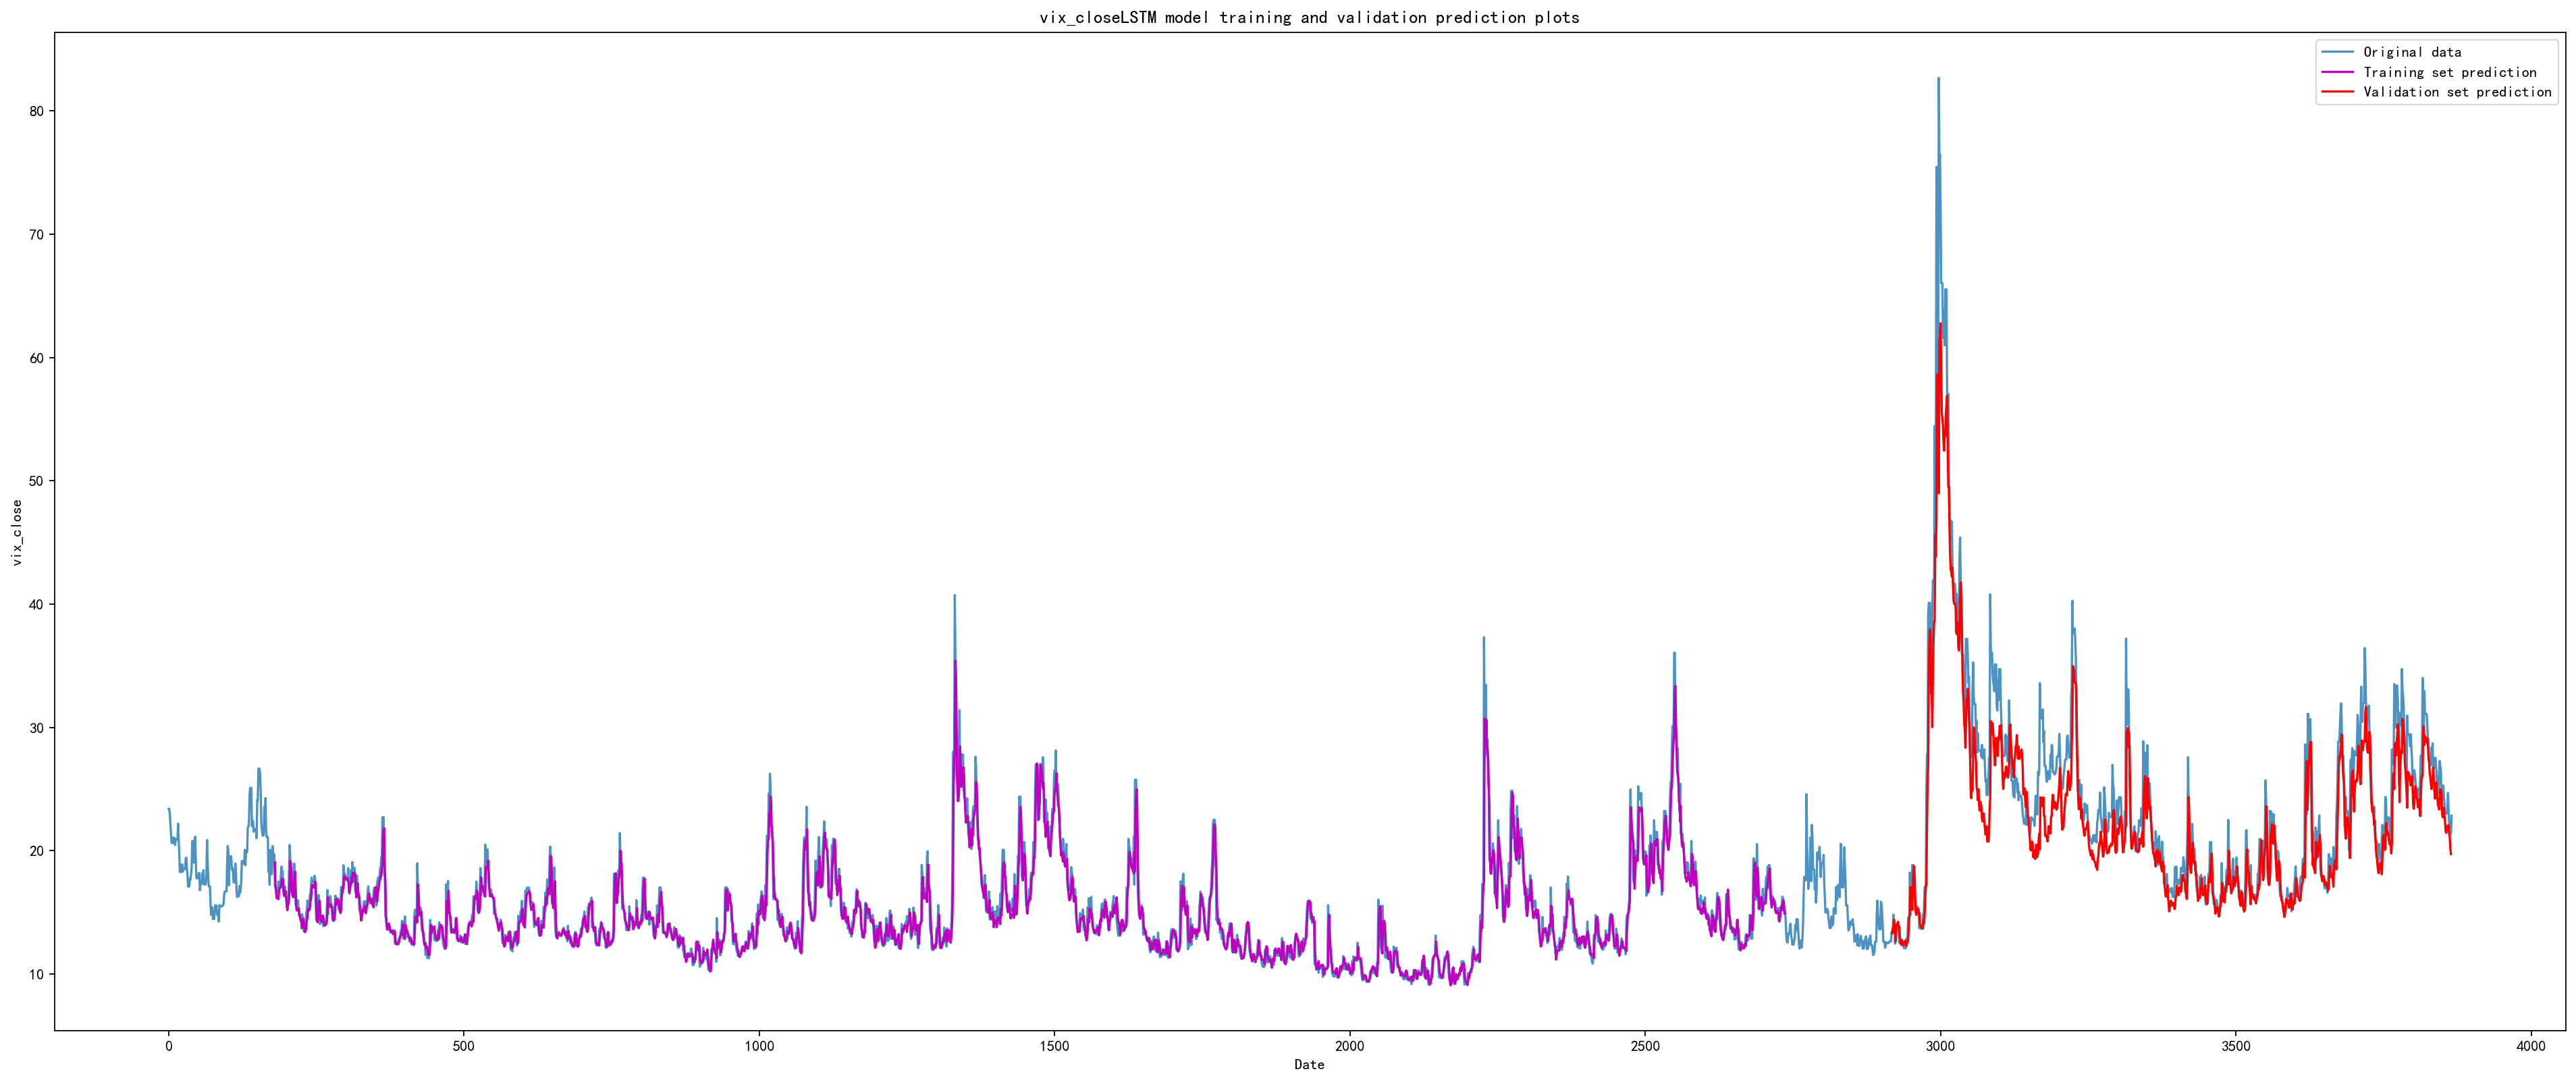

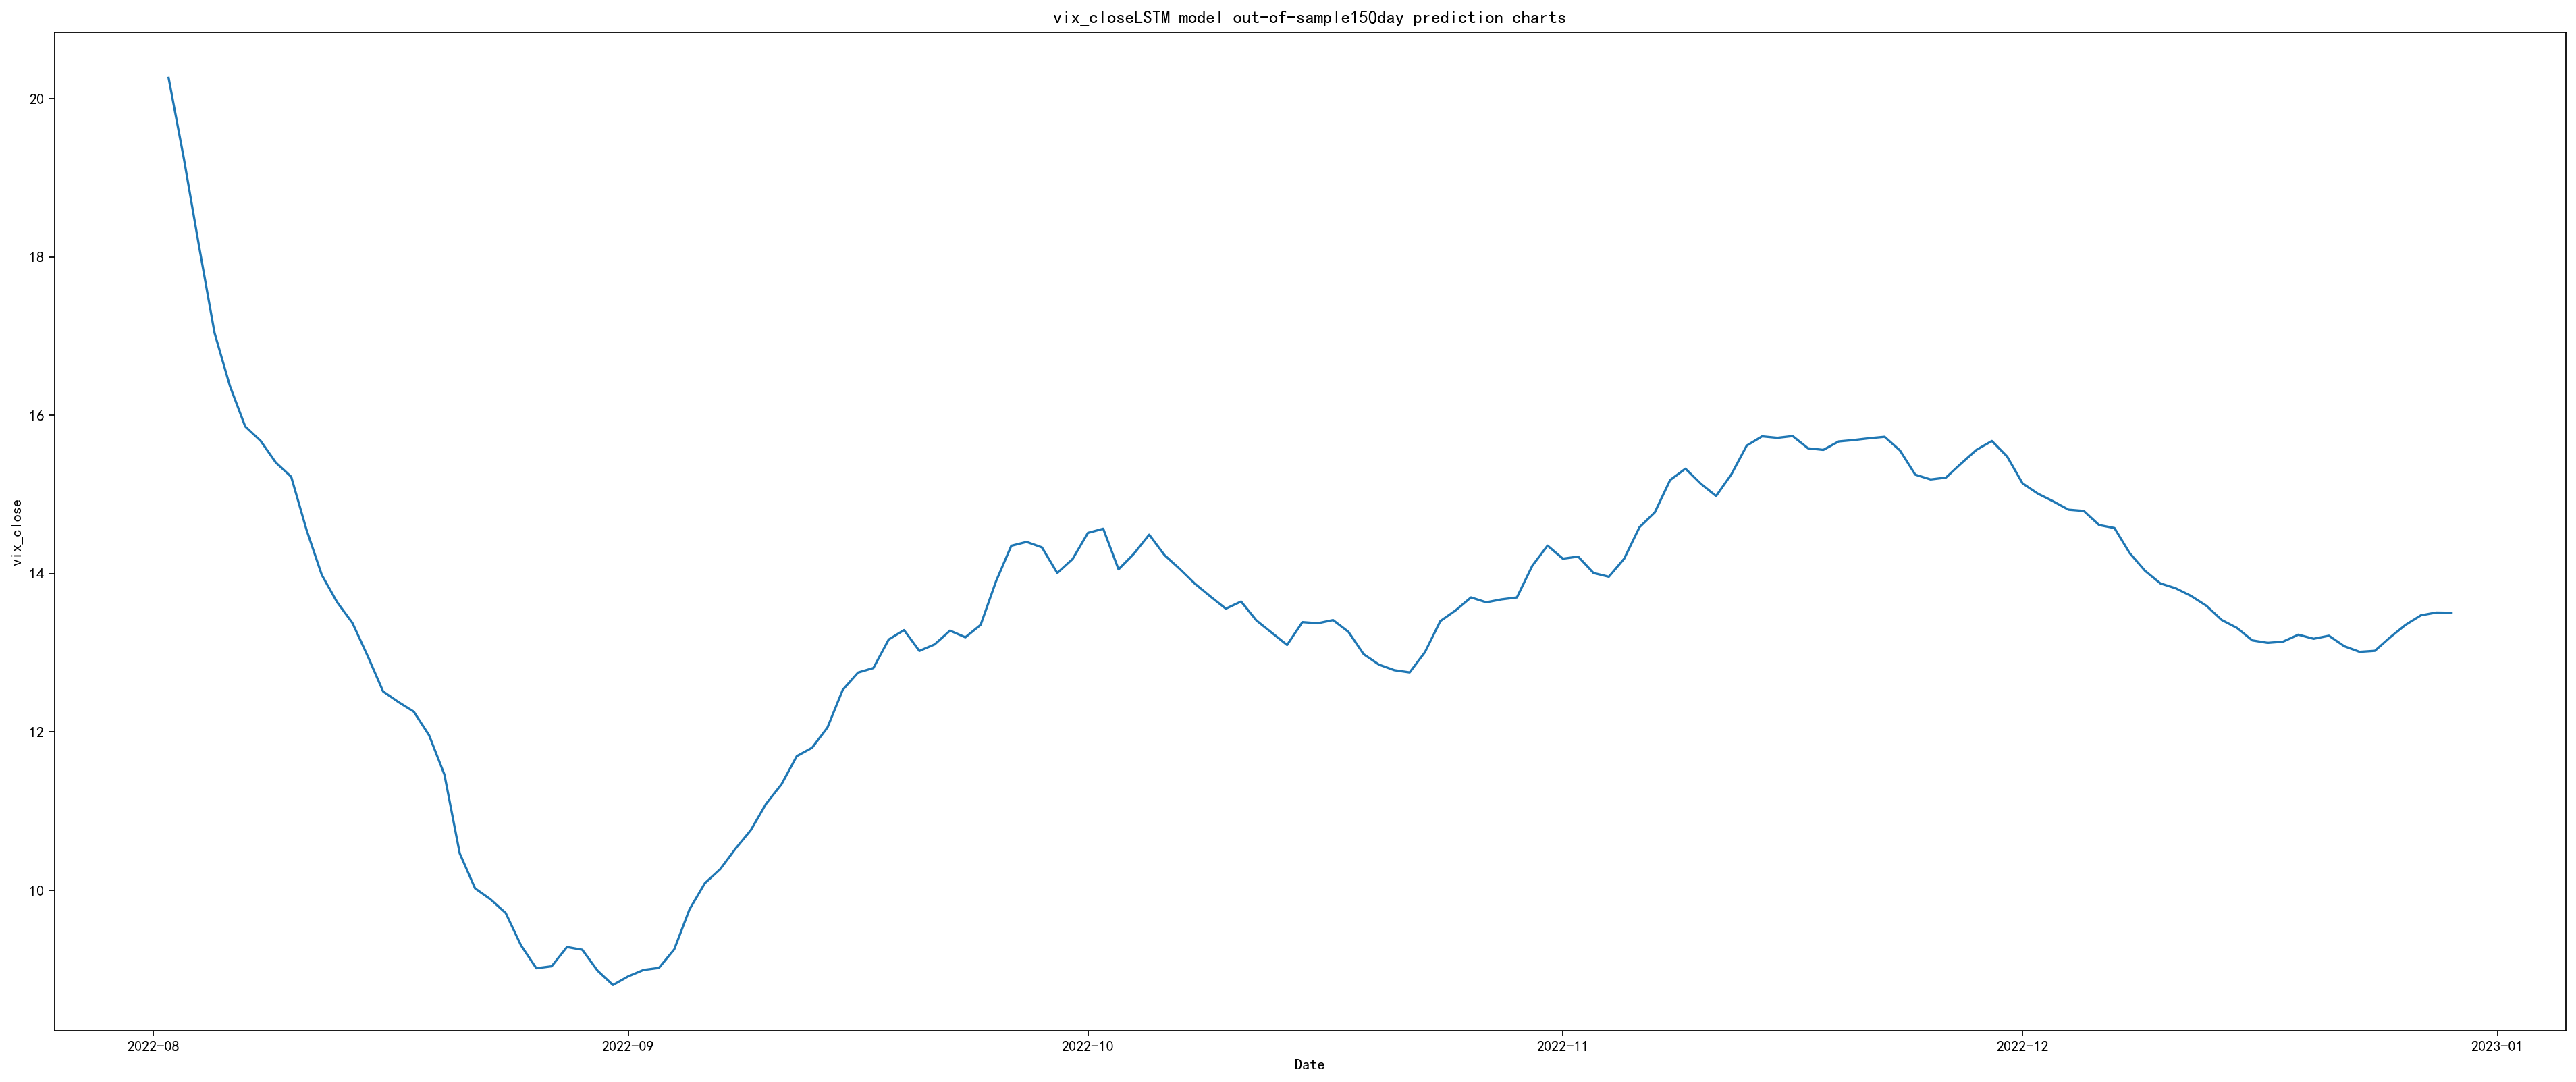

In [47]:
lstm_plot(vix_loss,vix_train_fc,vix_val_fc,vix_future_fc)

In [48]:
# save_result(vix_loss, vix_train_fc, vix_val_fc, vix_future_fc)

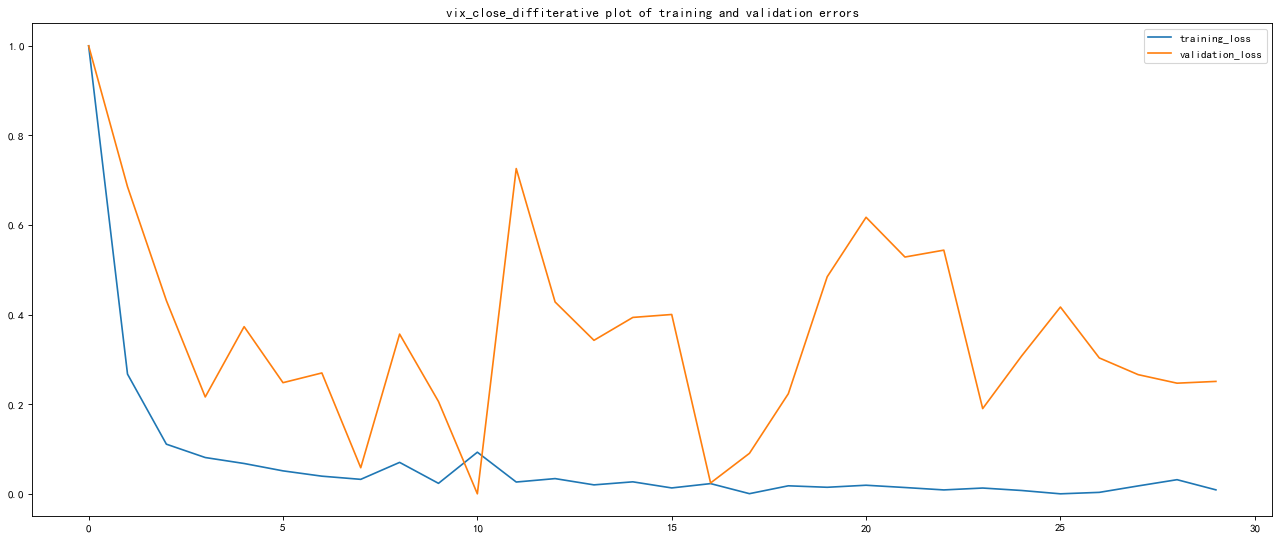

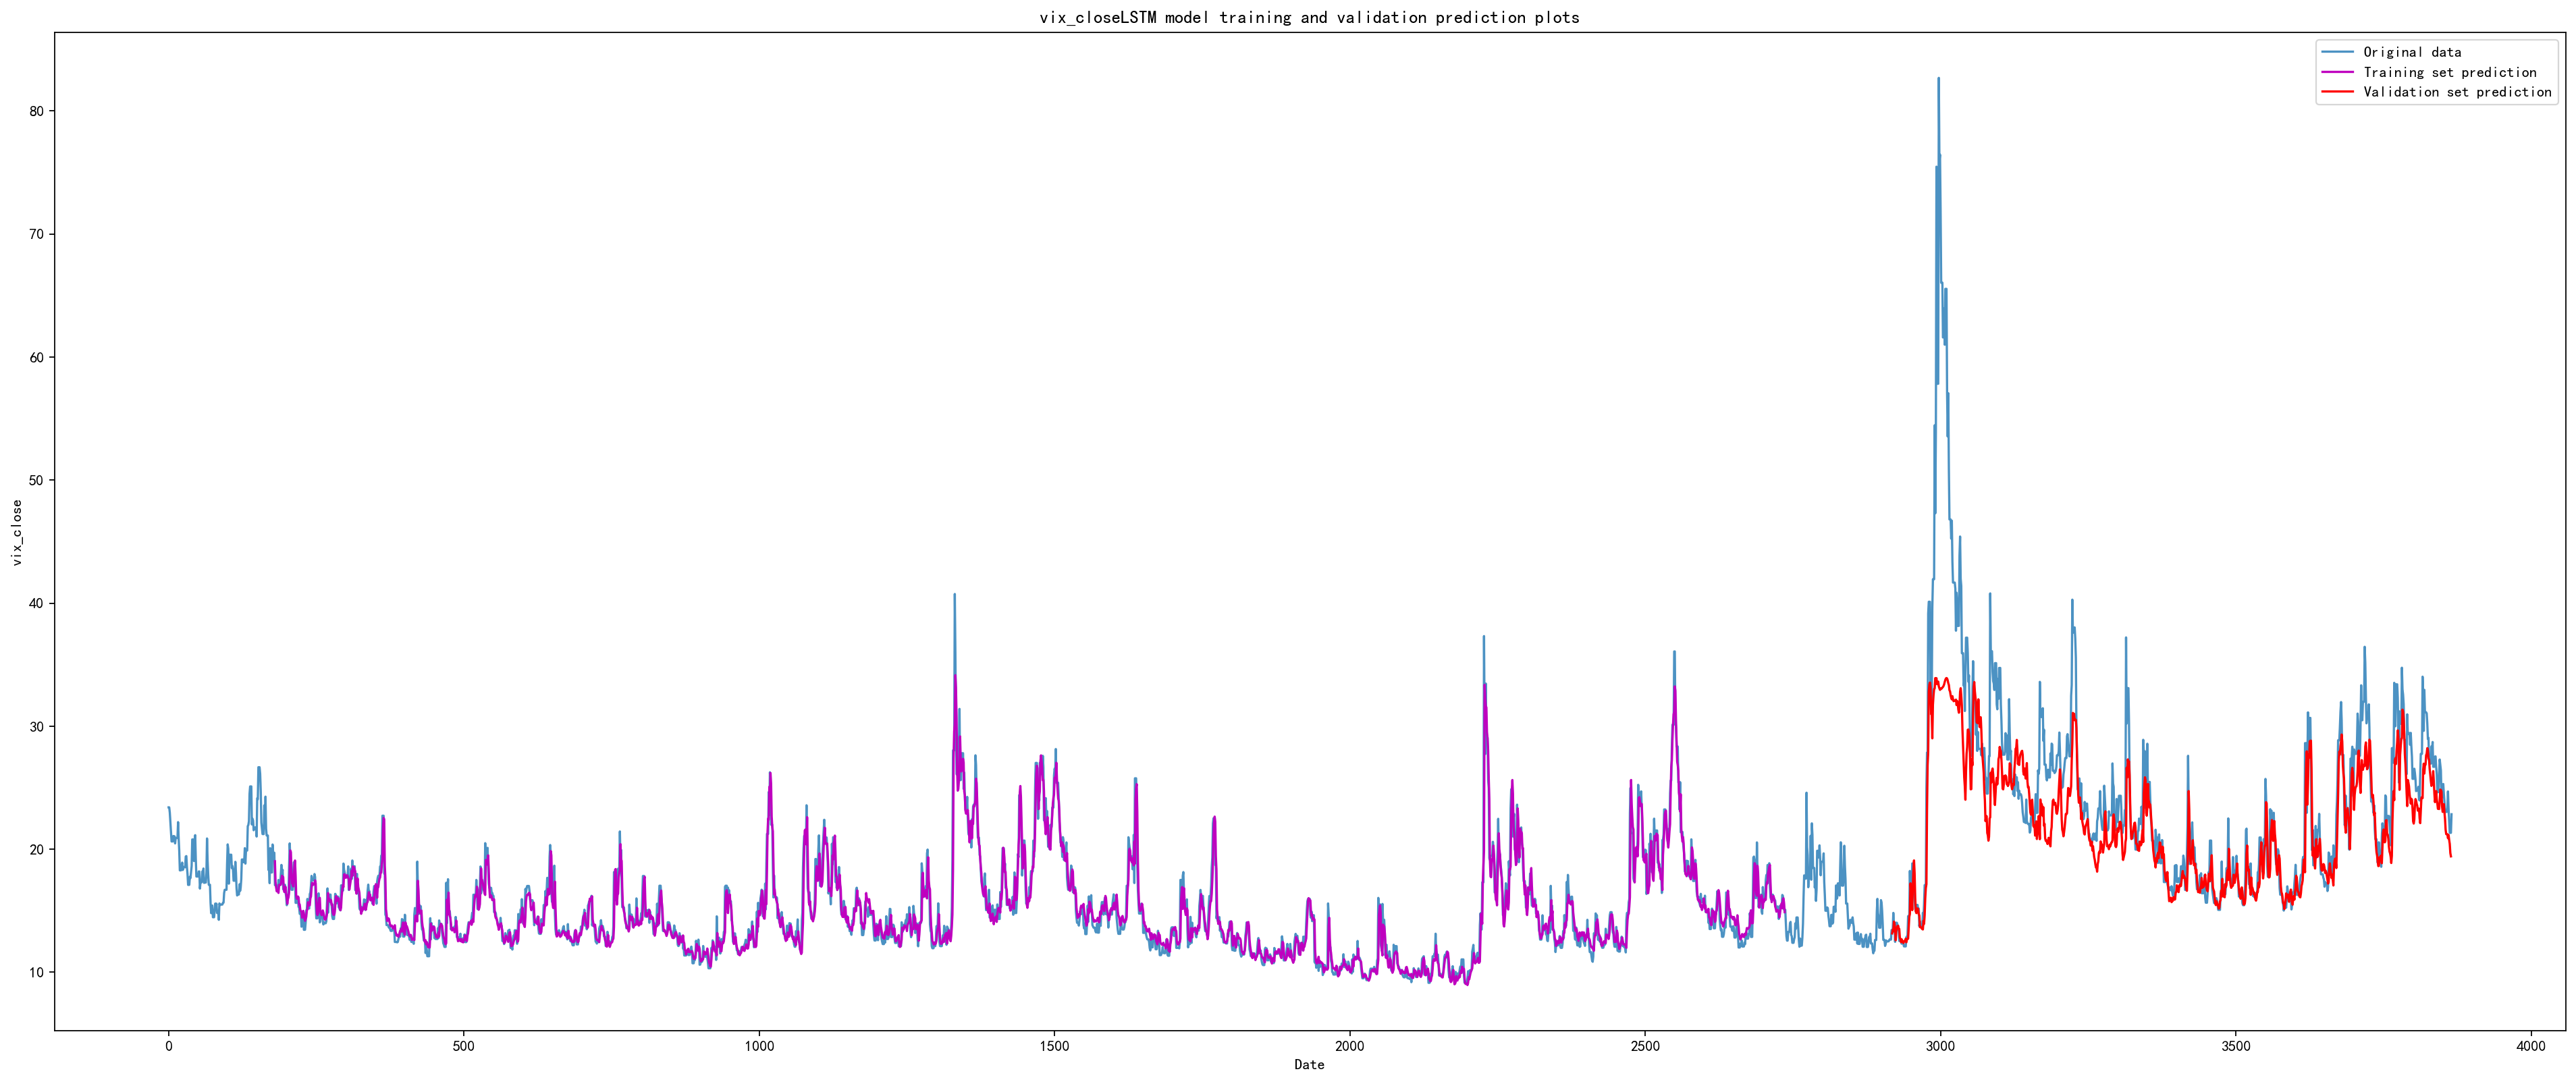

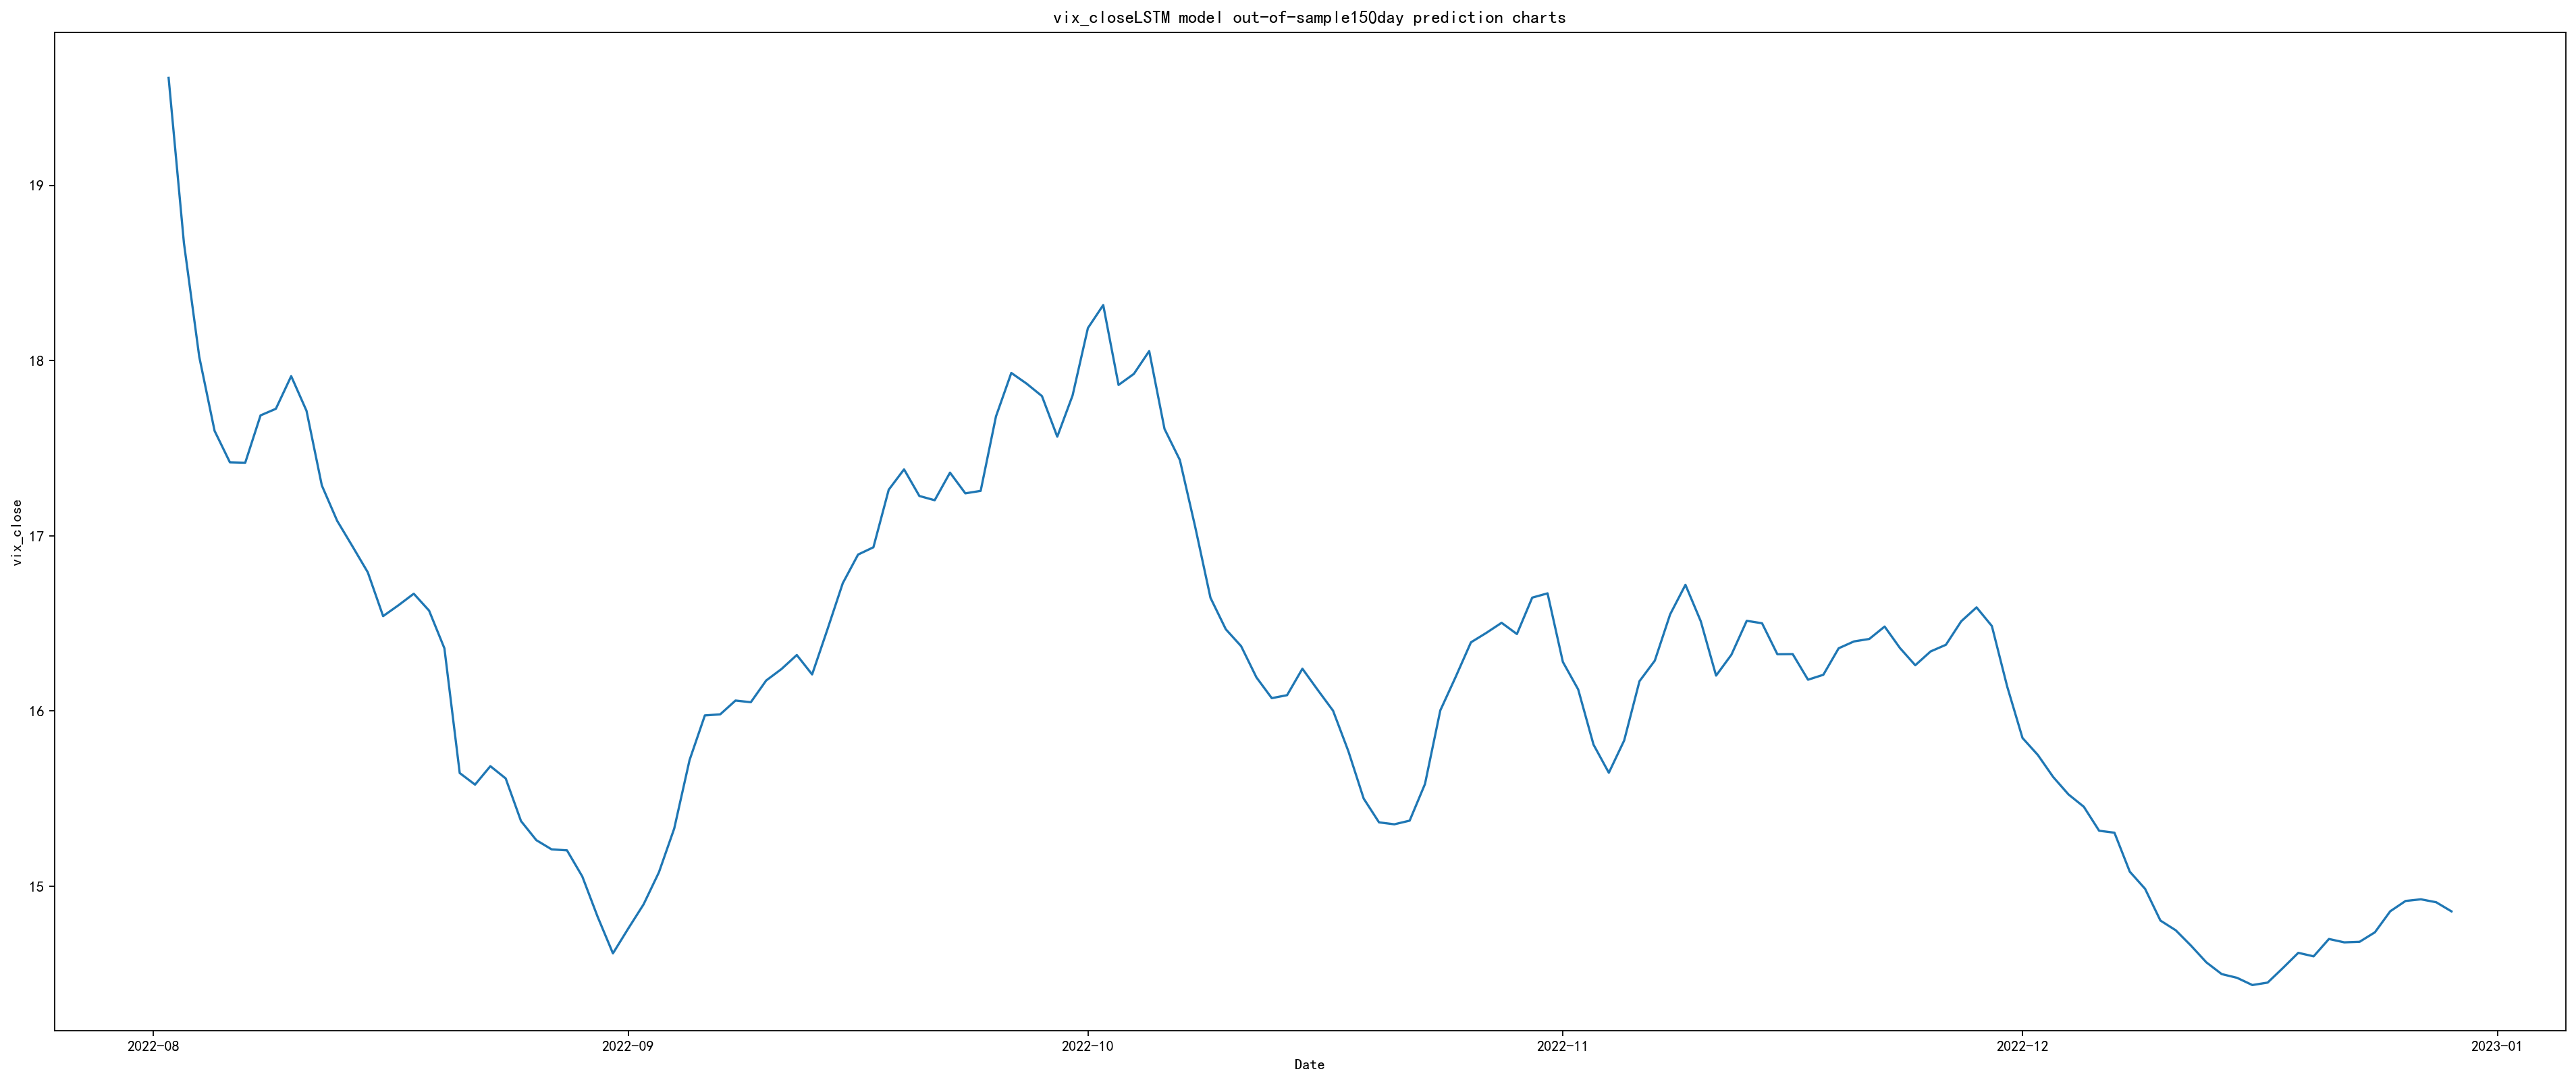

In [49]:
vix_loss, vix_train_fc, vix_val_fc, vix_future_fc = read_result('vix_close')
lstm_plot(vix_loss,vix_train_fc,vix_val_fc,vix_future_fc)

## 4-- Assessment of out-of-sample forecasted results

#### Merge (1) the crude oil spot forecasts from the LSTM model, (2) the LSTM forecasts using the coefficients of the variables derived from the OLS, and (3) the original historical crude oil spot data.

In [50]:
ols_fc = spot_future_fc.rename(columns={'spot_close':'spot_fc_LSTM'})
ols_fc['spot_fc_OLS'] = ols.params[0] + ft_future_fc.values*ols.params[1] + usdx_future_fc.values*ols.params[2] + vix_future_fc.values*ols.params[3]
spot_outputs = pd.merge(ols_fc,crude_oil_spot.loc[ols_fc.index[0]:],left_index=True,right_index=True,how='outer')
spot_outputs

spot_fc_LSTM  spot_fc_OLS  spot_close
2022-08-02     99.934921    90.217157       97.14
2022-08-03     99.800458    93.607633       93.25
2022-08-04    100.303316    95.372617       91.29
2022-08-05     99.189369    96.425500       91.77
2022-08-06     98.834213    96.352669       91.77
...                  ...          ...         ...
2022-12-25     84.202051    83.339441         NaN
2022-12-26     84.341559    84.181840         NaN
2022-12-27     84.802197    84.080344         NaN
2022-12-28     85.063301    84.068846         NaN
2022-12-29     85.202416    84.395944         NaN

[150 rows x 3 columns]

#### Plot a comparison of the above data

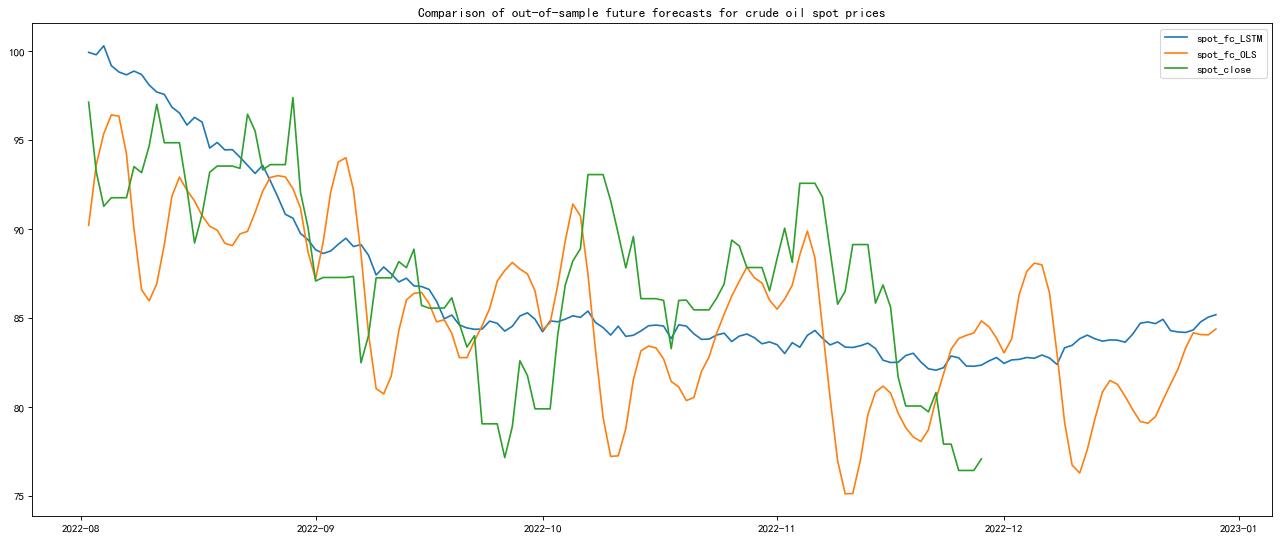

In [51]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(spot_outputs.iloc[:,0],label=spot_outputs.columns[0])
plt.plot(spot_outputs.iloc[:,1],label=spot_outputs.columns[1])
plt.plot(spot_outputs.iloc[:,2],label=spot_outputs.columns[2])
plt.title('Comparison of out-of-sample future forecasts for crude oil spot prices')
plt.legend()

#### The Root-Mean-Squared-Error metric is used to calculate the error between the predicted value and the true value to test the prediction accuracy.

In [52]:
# Removing missing values
spot_outputs2 = spot_outputs.dropna()

# RMSE forecasted straight through the LSTM model
print('RMSE predicted straight through the LSTM model =', math.sqrt(mean_squared_error(spot_outputs2['spot_fc_LSTM'],spot_outputs2['spot_close'])))

# RMSE by LSTM forecasting with OLS Modelling
print('RMSE by LSTM forecasting with OLS modelling  =', math.sqrt(mean_squared_error(spot_outputs2['spot_fc_OLS'],spot_outputs2['spot_close'])))

RMSE predicted straight through the LSTM model = 4.273061125512059
RMSE by LSTM forecasting with OLS modelling  = 5.48275567446776


#### Plotting future forecasts of crude oil spot prices without true values

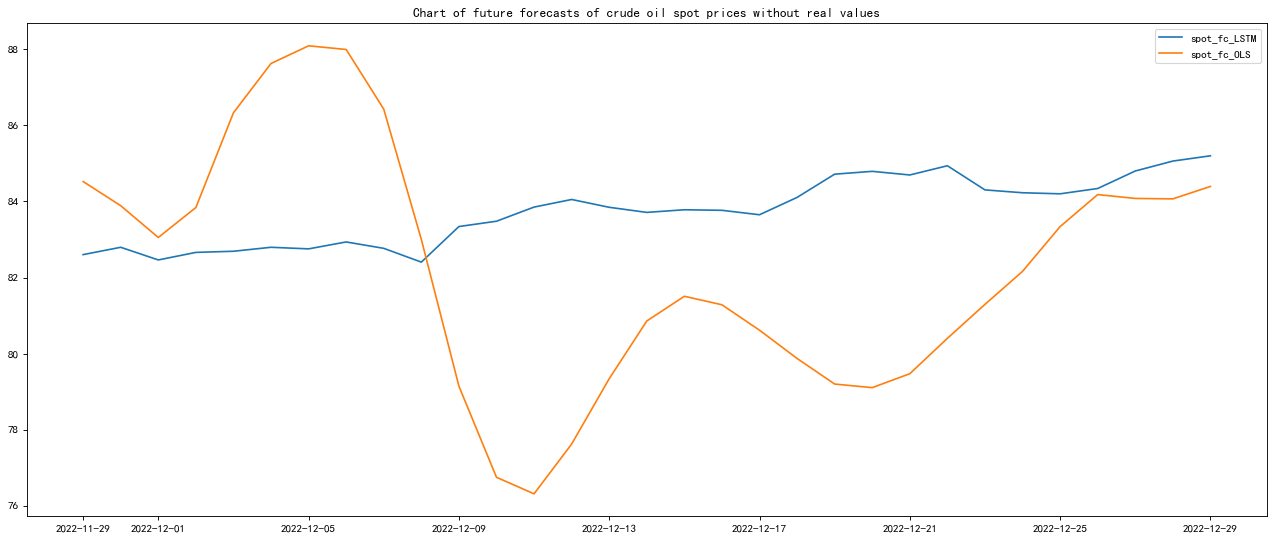

In [53]:
# Select data intervals that do not contain true values
spot_outputs3 = spot_outputs.iloc[len(spot_outputs2):].dropna(axis=1)
plt.figure(figsize=(20,8),dpi=80)
plt.plot(spot_outputs3.iloc[:,0],label=spot_outputs.columns[0])
plt.plot(spot_outputs3.iloc[:,1],label=spot_outputs.columns[1])
plt.title('Chart of future forecasts of crude oil spot prices without real values')
plt.legend()